# データ整形

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 日本語フォントのマウント
!apt-get -y install fonts-ipafont-gothic
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt

# 場合によっては必要
plt.rcParams['font.family'] = 'IPAPGothic'
japanize_matplotlib.japanize()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (6,755 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/■研究/令和４年度白書・人事院調査個票データ.csv', encoding='shift_jis') # encoding引数を'shift_jis'で追加

In [ ]:
import pandas as pd

# データの整形, 列名修正, 反転処理, 従属変数作成

# ファイルの読み込み（Shift-JISエンコードを使用）
file_path = '/content/drive/MyDrive/■研究/令和４年度白書・人事院調査個票データ.csv'
data = pd.read_csv(file_path, encoding='shift_jis')

# 1行目を削除（分析に不要な行）
data_cleaned = data.drop(index=0)

# 不要な列（"質問項目"）を削除
data_cleaned = data_cleaned.drop(columns=[data_cleaned.columns[0]])

# 新しい列名をリストとして定義
new_column_names = [
    'Gender', 'Age', 'Age_Group', 'Occupation', 'Job_Type', 'Company_Size',
    'Residence', 'Residence_Region', 'Work_Location', 'Work_Region', 'Q11', 'Q12',
    'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
    'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34',
    'Q35', 'Q36', 'Q37', 'Q38'
]

# 新しい列名をデータに適用
data_cleaned.columns = new_column_names

# 全てのカラムの値を数値型に変換（変換できなかった値は NaN になる）
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')

# 反転させないカラムのリスト
exclude_columns = ['Q21', 'Q25']

# 反転させるカラムのリスト（Q11～Q38のうち、exclude_columnsに含まれないカラム）
columns_to_reverse = [col for col in new_column_names[10:] if col not in exclude_columns]

# 反転の処理（1から5の値を反転）
data_cleaned[columns_to_reverse] = data_cleaned[columns_to_reverse].apply(lambda x: 6 - x)

# 目的変数として使用するカラムのリスト
columns_for_dependent_variable = ['Q23', 'Q27', 'Q36']

# Q23, Q27, Q36 の値を合計し、平均を計算して新しいカラム "Dependent_Variable" に追加
data_cleaned['Dependent_Variable'] = data_cleaned[columns_for_dependent_variable].mean(axis=1)

# "Dependent_Variable" の値を小数第3位で四捨五入し、小数第2位までにする
data_cleaned['Dependent_Variable'] = data_cleaned['Dependent_Variable'].round(2)

data_cleaned.head()


,Gender,Age,Age_Group,Occupation,Job_Type,Company_Size,Residence,Residence_Region,Work_Location,Work_Region,...,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Dependent_Variable
1,2,24.0,1,1,1,4,1,1,1,1,...,4,4,4,4,4,5,4,5,5,4.33
2,2,24.0,1,1,1,3,3,1,3,1,...,2,2,2,3,2,3,2,3,3,2.00
3,2,23.0,1,1,2,3,1,1,1,1,...,3,4,4,5,4,4,4,5,5,4.00
4,2,22.0,1,1,1,2,3,1,3,1,...,2,5,2,4,4,4,2,4,4,2.67
5,1,24.0,1,1,4,2,7,1,7,1,...,5,4,5,5,3,4,4,5,5,4.00


In [ ]:
!pip install xlsxwriter
import pandas as pd

# ダミー変数作成

# 大企業と公共部門のダミー変数を作成
data_cleaned['Company_Size_Large'] = data_cleaned['Company_Size'].apply(lambda x: 1 if x >= 4 and x != 9 else 0)
data_cleaned['Company_Size_Public_Sector'] = data_cleaned['Company_Size'].apply(lambda x: 1 if x == 9 else 0)

# 元の Company_Size カラムは削除しないように修正

# 性別に関するダミー変数を作成（女性を基準にする）
data_cleaned = pd.get_dummies(data_cleaned, columns=['Gender'], drop_first=True)

# Gender のダミー変数をわかりやすく "Female" に変更
data_cleaned = data_cleaned.rename(columns={'Gender_2': 'Female'})

# 東京都かそれ以外を判別する Work_Region のダミー変数を作成
data_cleaned['Work_Region_Tokyo'] = data_cleaned['Work_Region'].apply(lambda x: 1 if x == 3 else 0)

# 元の Work_Region カラムは削除しないように修正

# 'Company_Size_Large' と 'Female' の交差項を作成
data_cleaned['Company_Size_Large_Female'] = data_cleaned['Company_Size_Large'] * data_cleaned['Female']

# 'Company_Size_Public_Sector' と 'Female' の交差項を作成
data_cleaned['Company_Size_Public_Sector_Female'] = data_cleaned['Company_Size_Public_Sector'] * data_cleaned['Female']

# Q21に基づくダミー変数を作成
data_cleaned['Q21_Skill_Development'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 1 else 0)
data_cleaned['Q21_Responsibility_Role'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 2 else 0)
data_cleaned['Q21_Autonomy_WorkStyle'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 3 else 0)
data_cleaned['Q21_Economic_Stability'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 4 else 0)
data_cleaned['Q21_Creative_Innovation'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 5 else 0)
data_cleaned['Q21_Social_Contribution'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 6 else 0)
data_cleaned['Q21_Challenge_ProblemSolving'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 7 else 0)
data_cleaned['Q21_Work_Life_Balance'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 8 else 0)

# Q25で一または二の値を取る場合に1、それ以外の場合に0を取るダミー変数を作成
data_cleaned['Mission_Vision_Value_Alignment'] = data_cleaned['Q25'].apply(lambda x: 1 if x in [1, 2] else 0)

# Q25で六または七の値を取る場合に1、それ以外の場合に0を取る「ミッションビジョンバリューの不存在」というダミー変数を作成
data_cleaned['Mission_Vision_Value_Absent'] = data_cleaned['Q25'].apply(lambda x: 1 if x in [6, 7] else 0)

# ブール値のカラムを数値（0/1）に変換（'Dependent_Variable' を除外）
columns_to_convert = data_cleaned.columns.difference(['Dependent_Variable', "Q25"])
data_cleaned[columns_to_convert] = data_cleaned[columns_to_convert].astype(int)

# Excel形式でデータフレームを出力するコード
file_path = '/content/drive/MyDrive/■研究/ファイル出力先/cleaned_data.xlsx'  # 保存するファイル名

# データフレームをExcel形式で出力
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    data_cleaned.to_excel(writer, index=False, sheet_name='Cleaned_Data')
    worksheet = writer.sheets['Cleaned_Data']

    # 列幅を調整
    for column in data_cleaned:
        max_len = max(data_cleaned[column].astype(str).map(len).max(), len(column)) + 2
        col_idx = data_cleaned.columns.get_loc(column)
        worksheet.set_column(col_idx, col_idx, max_len)

print(f'DataFrame has been saved to {file_path}')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 3.0 MB/s eta 0:00:00
DataFrame has been saved to /content/drive/MyDrive/■研究/ファイル出力先/cleaned_data.xlsx


# 記述統計

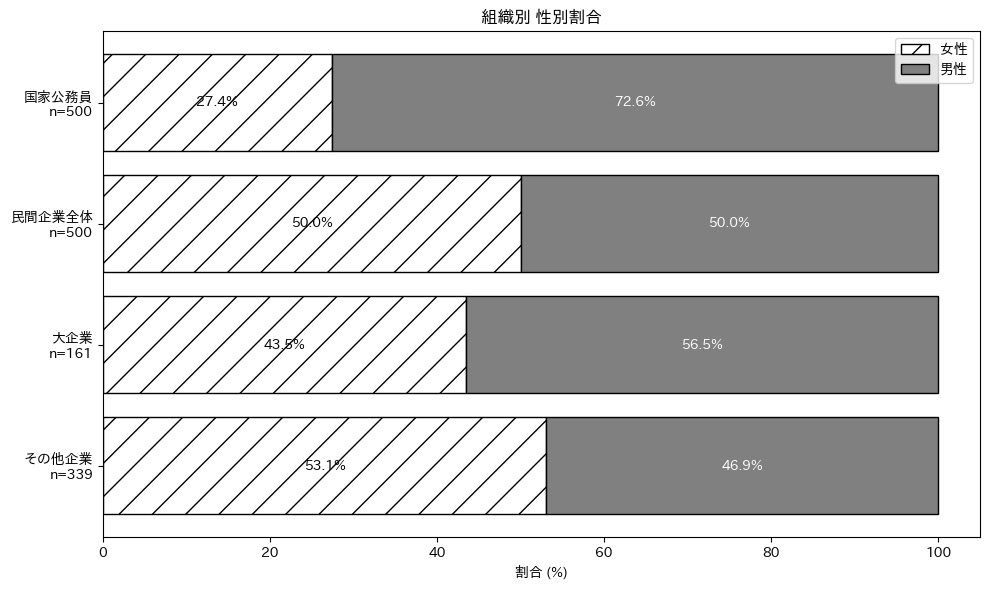

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def plot_gender_proportions_horizontal(data):
    # 各グループの条件と表示ラベル（上からの順番）
    conditions = [
        data['Company_Size_Public_Sector'] == 1,
        data['Company_Size_Public_Sector'] == 0,
        (data['Company_Size_Public_Sector'] == 0) & (data['Company_Size_Large'] == 1),
        (data['Company_Size_Public_Sector'] == 0) & (data['Company_Size_Large'] == 0)
    ]
    labels = ['国家公務員', '民間企業全体', '大企業', 'その他企業']

    # 各グループごとに女性割合、男性割合、サンプルサイズを算出
    ratios = []
    for cond in conditions:
        g = data[cond]
        if len(g) > 0:
            f = g['Female'].mean(skipna=True) * 100
            m = 100 - f
        else:
            f, m = np.nan, np.nan  # サンプルサイズが0なら NaN を入れる
        ratios.append((f, m, len(g)))

    female_ratios, male_ratios, sample_sizes = zip(*ratios)

    # サンプルサイズを含むラベルを作成し、Y軸用の座標を定義
    y = range(len(labels))
    labeled_labels = [f"{l}\nn={n}" for l, n in zip(labels, sample_sizes)]

    # グラフ作成
    plt.figure(figsize=(10, 6))
    bars_female = plt.barh(y, female_ratios, color='white', edgecolor='black', hatch='/', label='女性')
    bars_male = plt.barh(y, male_ratios, left=female_ratios, color='gray', edgecolor='black', label='男性')

    for i, (f, m) in enumerate(zip(female_ratios, male_ratios)):
        if not np.isnan(f):
            plt.text(f/2, i, f"{f:.1f}%", va='center', ha='center', color='black', fontweight='bold')
        if not np.isnan(m) and m > 0:
            plt.text(f + m/2, i, f"{m:.1f}%", va='center', ha='center', color='white', fontweight='bold')

    plt.yticks(y, labeled_labels)
    plt.xlabel('割合 (%)')
    plt.title('組織別 性別割合')

    # 白黒対応の凡例を作成（Patch を使用）
    legend_female = mpatches.Patch(facecolor='white', edgecolor='black', hatch='/', label='女性')
    legend_male = mpatches.Patch(facecolor='gray', edgecolor='black', label='男性')

    plt.legend(handles=[legend_female, legend_male], loc='upper right')

    plt.gca().invert_yaxis()  # 上から指定の順番に表示
    plt.tight_layout()
    plt.show()

# プロット実行（グラフの保存は行いません）
plot_gender_proportions_horizontal(data_cleaned)


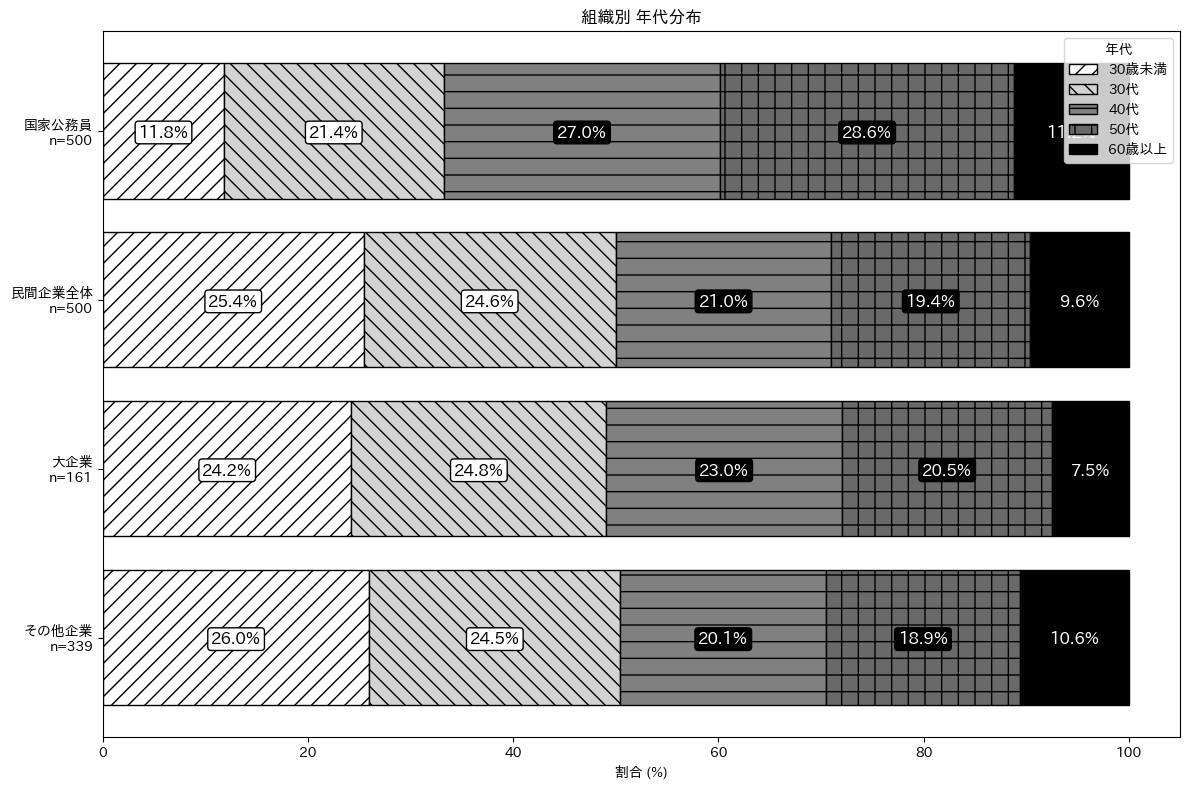

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def plot_age_distribution_by_org(data):
    # グループの定義
    groups = {
        '国家公務員': data[data['Company_Size_Public_Sector'] == 1],
        '民間企業全体': data[data['Company_Size_Public_Sector'] == 0],
        '大企業': data[(data['Company_Size_Public_Sector'] == 0) & (data['Company_Size_Large'] == 1)],
        'その他企業': data[(data['Company_Size_Public_Sector'] == 0) & (data['Company_Size_Large'] == 0)]
    }
    ordered = list(groups.keys())

    # 年代カテゴリとグレースケールの設定
    age_bins = ['30歳未満', '30代', '40代', '50代', '60歳以上']
    grayscale = ['white', 'lightgray', 'gray', 'dimgray', 'black']
    hatches = ['//', '\\\\', '-', '+', 'o']  # ハッチングの種類

    # 年代分類関数
    cat_age = lambda a: '30歳未満' if a < 30 else '30代' if a < 40 else '40代' if a < 50 else '50代' if a < 60 else '60歳以上'

    # 各グループごとに年代分布とサンプルサイズを計算
    sample_sizes, dist = {}, {}
    for name in ordered:
        df = groups[name].copy()
        df['Age_Bin'] = df['Age'].apply(cat_age)
        total = len(df)
        sample_sizes[name] = total
        dist[name] = {bin: (df[df['Age_Bin'] == bin].shape[0] / total * 100 if total else 0) for bin in age_bins}

    # 各年代ごとの割合リストとY軸ラベル作成
    bin_ratios = {bin: [dist[name][bin] for name in ordered] for bin in age_bins}
    labels = [f"{n}\nn={sample_sizes[n]}" for n in ordered]

    # 積み上げ横棒グラフの描画
    y = range(len(ordered))
    plt.figure(figsize=(12, 8))
    bottoms = [0] * len(ordered)
    bars = []

    for i, bin in enumerate(age_bins):
        b = plt.barh(y, bin_ratios[bin], left=bottoms, color=grayscale[i], edgecolor='black', hatch=hatches[i], label=bin, linewidth=1)
        bars.append(b)
        bottoms = [b_val + r for b_val, r in zip(bottoms, bin_ratios[bin])]

    # 棒内に割合を表示（5%以上のみ表示）
    for i, bin in enumerate(age_bins):
        for j, rect in enumerate(bars[i]):
            if rect.get_width() > 5:
                text_color = 'black' if grayscale[i] in ['white', 'lightgray'] else 'white'
                bbox_props = dict(facecolor='black' if text_color == 'white' else 'white',
                                  edgecolor='black', boxstyle='round,pad=0.2', alpha=1.0)  # 透明度なし

                plt.text(rect.get_x() + rect.get_width()/2,
                         rect.get_y() + rect.get_height()/2,
                         f"{bin_ratios[bin][j]:.1f}%", ha='center', va='center_baseline',
                         fontsize=12, color=text_color, fontweight='bold', bbox=bbox_props)

    plt.yticks(y, labels)
    plt.xlabel('割合 (%)')
    plt.title('組織別 年代分布')

    # 白黒対応の凡例を作成
    legend_patches = [mpatches.Patch(facecolor=grayscale[i], edgecolor='black', hatch=hatches[i], label=age_bins[i]) for i in range(len(age_bins))]
    plt.legend(handles=legend_patches, title='年代', loc='upper right')

    plt.gca().invert_yaxis()  # 上から順に表示
    plt.tight_layout()
    plt.show()

# プロット実行（ファイル保存は行いません）
plot_age_distribution_by_org(data_cleaned)


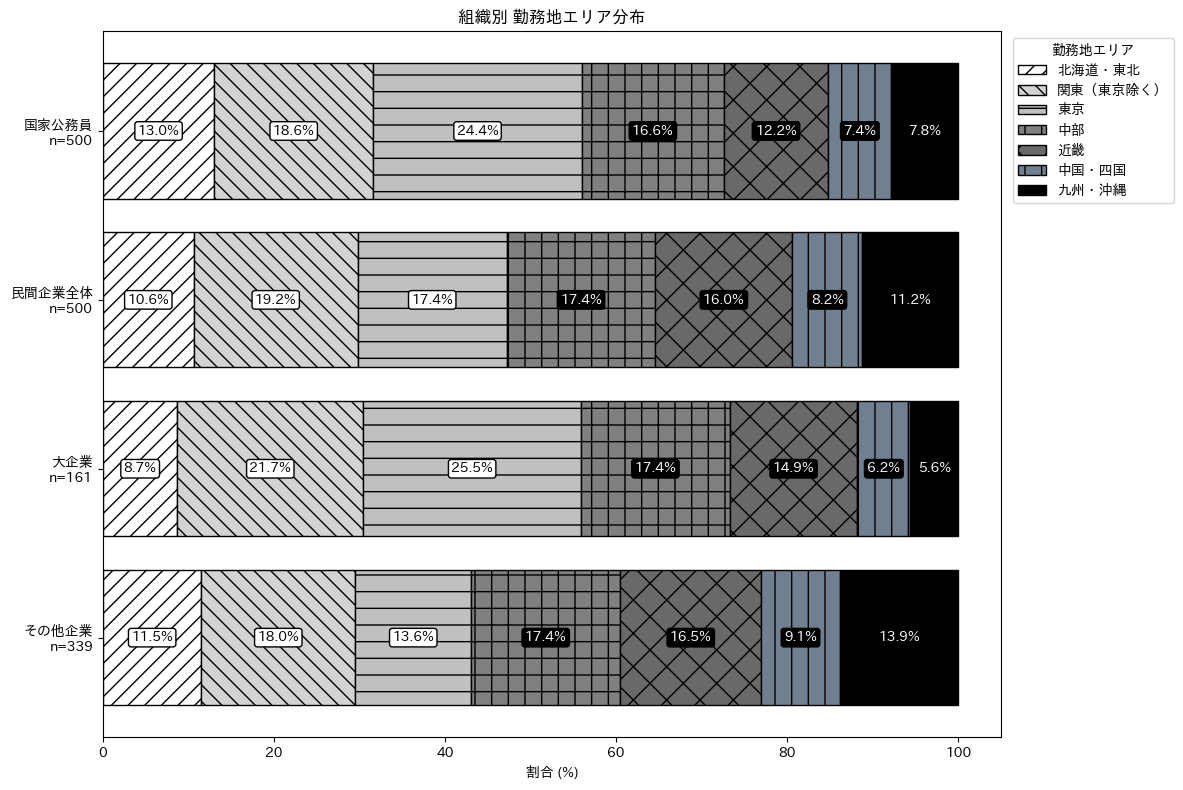

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_work_location_distribution_by_org(data):
    # 組織グループの定義（上から「国家公務員」「民間企業全体」「大企業」「その他企業」）
    groups = {
        '国家公務員': data[data['Company_Size_Public_Sector'] == 1],
        '民間企業全体': data[data['Company_Size_Public_Sector'] == 0],
        '大企業': data[(data['Company_Size_Public_Sector'] == 0) & (data['Company_Size_Large'] == 1)],
        'その他企業': data[(data['Company_Size_Public_Sector'] == 0) & (data['Company_Size_Large'] == 0)]
    }
    ordered = list(groups.keys())

    # 勤務地エリアの日本語名と識別用番号
    loc_names = {1: '北海道・東北', 2: '関東（東京除く）', 3: '東京', 4: '中部', 5: '近畿', 6: '中国・四国', 7: '九州・沖縄'}
    work_regions = sorted(loc_names)

    # グレースケールでの色（左から薄い順に）とハッチングパターン（7カテゴリ分）
    grayscale = ['white', 'lightgray', 'silver', 'gray', 'dimgray', 'slategray', 'black']
    hatches    = ['//', '\\\\', '-', '+', 'x', '|', 'o']

    # 各グループごとのサンプルサイズと各エリアの割合（％）を計算
    sample_sizes, dist = {}, {}
    for org in ordered:
        df = groups[org]
        total = len(df)
        sample_sizes[org] = total
        dist[org] = {r: (df['Work_Region'].eq(r).sum() / total * 100 if total else 0) for r in work_regions}
    # 各勤務地（work region）ごとに、各グループの割合リストを作成
    bin_ratios = {r: [dist[org][r] for org in ordered] for r in work_regions}
    labels = [f"{org}\nn={sample_sizes[org]}" for org in ordered]
    y = range(len(ordered))

    plt.figure(figsize=(12,8))
    bottoms = [0] * len(ordered)
    bars = []

    # 各勤務地ごとに、積み上げ横棒グラフとして描画
    for i, r in enumerate(work_regions):
        b = plt.barh(y, bin_ratios[r], left=bottoms, color=grayscale[i],
                     edgecolor='black', hatch=hatches[i], label=loc_names[r], linewidth=1)
        bars.append(b)
        bottoms = [bv + rv for bv, rv in zip(bottoms, bin_ratios[r])]

    # 棒の幅が十分な部分に、割合を表示
    # テキストの背景は不透明な白または黒で、バーの色に合わせて文字色を変更
    for i, r in enumerate(work_regions):
        for j, rect in enumerate(bars[i]):
            if rect.get_width() > 5:
                # 薄い色（white, lightgray, silver）なら黒文字、濃い色なら白文字
                text_color = 'black' if grayscale[i] in ['white', 'lightgray', 'silver'] else 'white'
                # 背景ボックスはバーと対比するため、薄い文字なら白背景、濃い文字なら黒背景（透明度はなし）
                bbox_props = dict(facecolor='white' if text_color=='black' else 'black',
                                  edgecolor='black', boxstyle='round,pad=0.2', alpha=1.0)
                plt.text(rect.get_x() + rect.get_width()/2,
                         rect.get_y() + rect.get_height()/2,
                         f"{bin_ratios[r][j]:.1f}%", ha='center', va='center',
                         fontsize=10, color=text_color, fontweight='bold', bbox=bbox_props)

    plt.yticks(y, labels)
    plt.xlabel('割合 (%)')
    plt.title('組織別 勤務地エリア分布')

    # 白黒対応の凡例を作成（mpatches.Patch でハッチング・グレースケールを反映）
    legend_patches = [mpatches.Patch(facecolor=grayscale[i], edgecolor='black',
                                     hatch=hatches[i], label=loc_names[r]) for i, r in enumerate(work_regions)]
    plt.legend(handles=legend_patches, title='勤務地エリア', loc='upper right', bbox_to_anchor=(1.2, 1))

    plt.gca().invert_yaxis()  # 上から順に表示
    plt.tight_layout()
    plt.show()

# グラフをプロット（ファイル保存は行いません）
plot_work_location_distribution_by_org(data_cleaned)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.drawing.image import Image
from io import BytesIO
import os

# 保存先の設定
output_dir = '/content/drive/MyDrive/■研究/ファイル出力先/記述統計'
output_filename = "記述統計_Q11-Q38_Histograms_Shortened.xlsx"
output_path = os.path.join(output_dir, output_filename)
os.makedirs(output_dir, exist_ok=True)  # ディレクトリ作成

# Q11～Q38の列名をリストとして定義
question_columns = [f"Q{i}" for i in range(11, 39)]

# エクセルファイル初期化
wb = Workbook()
ws = wb.active
ws.title = "Histograms"

# 配置設定
columns_per_row = 4
cell_width, cell_height = 15, 12  # 列と行の間隔
fig_size = (3, 2.5)  # グラフサイズ

# グラフ生成とエクセル挿入
for idx, question in enumerate(question_columns):
    # グラフ生成
    img_data = BytesIO()
    plt.figure(figsize=fig_size)
    plt.hist(data_cleaned[question].dropna(), bins=5, color='skyblue', edgecolor='black')
    plt.title(f'{question}', fontsize=8)
    plt.xlabel('Response (1 to 5)', fontsize=6)
    plt.ylabel('Frequency', fontsize=6)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(img_data, format='png')
    img_data.seek(0)
    plt.close()

    # エクセルに挿入
    img = Image(img_data)
    row, col = (idx // columns_per_row) * cell_height + 1, (idx % columns_per_row) * cell_width + 1
    ws.add_image(img, ws.cell(row=row, column=col).coordinate)

# 保存
wb.save(output_path)
print(f"ヒストグラムを含むエクセルファイルを保存しました：{output_path}")


ヒストグラムを含むエクセルファイルを保存しました：/content/drive/MyDrive/■研究/ファイル出力先/記述統計/記述統計_Q11-Q38_Histograms_Shortened.xlsx


# 因子分析

In [ ]:
import pandas as pd
from scipy import stats
from google.colab import drive
!pip install factor_analyzer openpyxl
from factor_analyzer import calculate_kmo

# データの因子分析への適合性の確認

# Google Drive のマウント
drive.mount('/content/drive')

# データの読み込み
file_path = '/content/drive/MyDrive/■研究/ファイル出力先/cleaned_data.xlsx'
data_cleaned = pd.read_excel(file_path)

# 質問項目 (Q11 ~ Q38) の抽出（因子分析対象のデータを準備する）
# 以下の項目は因子分析の対象外として除外しています：
# - Q21: 働くうえで最も重要なことを選択する項目であり、分析には適さないため
# - Q23, Q27, Q36: 従属変数として使用する予定のため
columns_for_fa = [col for col in data_cleaned.columns if col.startswith('Q') and col not in ['Dependent_Variable', 'Q21', 'Q23', 'Q27', 'Q36']]
data_for_fa = data_cleaned[columns_for_fa].dropna()

# バートレットの球体性検定（因子分析が適切かを確認するための検定）
chi_square_value, p_value = stats.bartlett(*[data_for_fa[col] for col in data_for_fa.columns])
bartlett_results = {'検定': ['バートレットの球体性検定'], 'χ²': [chi_square_value], 'p値': [p_value]}

# KMO 検定の計算（factor_analyzer ライブラリを使用）
kmo_all, kmo_model = calculate_kmo(data_for_fa)
kmo_results = {'検定': ['KMO 検定'], 'KMO 全体の値': [kmo_model]}

# 結果をデータフレームにまとめる
bartlett_df = pd.DataFrame(bartlett_results)
kmo_df = pd.DataFrame(kmo_results)
kmo_all_df = pd.DataFrame({'各変数の KMO 値': kmo_all}, index=columns_for_fa)

# エクセルファイルに出力
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/factor_analysis_tests_results.xlsx'
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    bartlett_df.to_excel(writer, sheet_name='バートレット検定結果', index=False)
    kmo_df.to_excel(writer, sheet_name='KMO 検定結果', index=False)
    kmo_all_df.to_excel(writer, sheet_name='各変数の KMO 値')

print(f"検定結果がエクセルファイルとして保存されました: {output_file_path}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42566 sha256=bfde7a60e8b1fbe8455e6600da36ed9b2097d17462d0310ad1831b2dc4083002
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
検定結果がエクセルファイルとして保存されました: /content/drive/MyDrive/■研究/ファイル出力先/factor_analysis_tests_results.xlsx


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [ ]:
!pip install factor_analyzer openpyxl
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from google.colab import drive
import openpyxl
from openpyxl.drawing.image import Image
from io import BytesIO

# Google Drive のマウント
drive.mount('/content/drive')

# データの読み込み
file_path = '/content/drive/MyDrive/■研究/ファイル出力先/cleaned_data.xlsx'
data_cleaned = pd.read_excel(file_path)

# 除外される項目のリスト（昇順に並べたもの）
excluded_columns = sorted(['Q13', 'Q15', 'Q16', 'Q21', 'Q23', 'Q24', 'Q27', 'Q36', 'Q37', 'Q38'])

# 質問項目の仕分け（昇順に並べたもの）
# 個人の信念に関する質問項目（昇順）
personal_belief_columns = sorted(['Q14', 'Q17', 'Q18', 'Q20', 'Q22'])

# 組織の状態に関する質問項目（昇順）
organizational_state_columns = sorted(['Q11', 'Q12', 'Q19', 'Q25', 'Q26', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35'])

# データを除外項目を考慮して抽出
data_personal_belief = data_cleaned[personal_belief_columns].dropna()
data_organizational_state = data_cleaned[organizational_state_columns].dropna()

# 因子分析（固有値の計算のみ）を実行（個人の信念）
fa_personal_belief = FactorAnalyzer(rotation=None)
fa_personal_belief.fit(data_personal_belief)
eigenvalues_personal_belief, _ = fa_personal_belief.get_eigenvalues()

# 因子分析（固有値の計算のみ）を実行（組織の状態）
fa_organizational_state = FactorAnalyzer(rotation=None)
fa_organizational_state.fit(data_organizational_state)
eigenvalues_organizational_state, _ = fa_organizational_state.get_eigenvalues()

# 固有値のデータフレーム作成
eigenvalues_personal_df = pd.DataFrame({'因子数': range(1, len(eigenvalues_personal_belief) + 1), '固有値（個人の信念）': eigenvalues_personal_belief})
eigenvalues_org_df = pd.DataFrame({'因子数': range(1, len(eigenvalues_organizational_state) + 1), '固有値（組織の状態）': eigenvalues_organizational_state})

# スクリープロットの作成（個人の信念）
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues_personal_belief) + 1), eigenvalues_personal_belief, marker='o')
plt.xlabel('因子の数')
plt.ylabel('固有値')
plt.title('スクリープロット（個人の信念）')
plt.grid(True)
plt.tight_layout()

# スクリープロットをメモリ上に保存（個人の信念）
image_stream_personal = BytesIO()
plt.savefig(image_stream_personal, format='png')
plt.close()
image_stream_personal.seek(0)

# スクリープロットの作成（組織の状態）
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues_organizational_state) + 1), eigenvalues_organizational_state, marker='o')
plt.xlabel('因子の数')
plt.ylabel('固有値')
plt.title('スクリープロット（組織の状態）')
plt.grid(True)
plt.tight_layout()

# スクリープロットをメモリ上に保存（組織の状態）
image_stream_org = BytesIO()
plt.savefig(image_stream_org, format='png')
plt.close()
image_stream_org.seek(0)

# エクセルファイルに固有値とスクリープロットを同じシートに保存
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/scree_plot_results.xlsx'
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    # 固有値を保存（個人の信念）
    eigenvalues_personal_df.to_excel(writer, sheet_name='個人の信念', index=False)
    workbook = writer.book
    worksheet_personal = writer.sheets['個人の信念']

    # 画像を同じシートに挿入（個人の信念）
    img_personal = Image(image_stream_personal)
    worksheet_personal.add_image(img_personal, 'E1')

    # 固有値を保存（組織の状態）
    eigenvalues_org_df.to_excel(writer, sheet_name='組織の状態', index=False)
    worksheet_org = writer.sheets['組織の状態']

    # 画像を同じシートに挿入（組織の状態）
    img_org = Image(image_stream_org)
    worksheet_org.add_image(img_org, 'E1')

print(f"固有値とスクリープロットがエクセルファイルに保存されました: {output_file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-8-6dd82c5c15fd>:53: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from current font.
  plt.tight_layout()
<ipython-input-8-6dd82c5c15fd>:53: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  plt.tight_layout()
<ipython-input-8-6dd82c5c15fd>:53: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  plt.tight_layout()
<ipython-input-8-6dd82c5c15fd>:53: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
<ipython-input-8-6dd82c5c15fd>:53: UserWarning: Glyph 22266 (\N{CJK UNIFIED IDEOGRAPH-56FA}) missing from current font.
  plt.tight_layout()
<ipython-input-8-6dd82c5c15fd>:53: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  plt.tight_layout()
<ipython-input-8-6dd82c5c15fd>:53: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  plt.tight_layout()
<ipython-input-8-6dd8

固有値とスクリープロットがエクセルファイルに保存されました: /content/drive/MyDrive/■研究/ファイル出力先/scree_plot_results.xlsx


In [ ]:
!pip install factor_analyzer openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from google.colab import drive
import openpyxl
from openpyxl.drawing.image import Image
from io import BytesIO

# Google Drive のマウント
drive.mount('/content/drive')

# データの読み込み
file_path = '/content/drive/MyDrive/■研究/ファイル出力先/cleaned_data.xlsx'
data_cleaned = pd.read_excel(file_path)

# 除外される項目のリスト（昇順に並べたもの）
excluded_columns = sorted(['Q13', 'Q15', 'Q16', 'Q21', 'Q23', 'Q24', 'Q27', 'Q36', 'Q37', 'Q38'])

# 個人の信念に関する質問項目（昇順）
personal_belief_columns = sorted(['Q14', 'Q17', 'Q18', 'Q20', 'Q22'])

# 組織の状態に関する質問項目（昇順）
organizational_state_columns = sorted(['Q11', 'Q12', 'Q19', 'Q25', 'Q26', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35'])

# データを除外項目を考慮して抽出
data_personal_belief = data_cleaned[personal_belief_columns].dropna()
data_organizational_state = data_cleaned[organizational_state_columns].dropna()

# 因子分析の実行（個人の信念: 因子数を1に設定）
fa_personal_belief = FactorAnalyzer(n_factors=1, rotation='promax')
fa_personal_belief.fit(data_personal_belief)
factor_loadings_personal = pd.DataFrame(fa_personal_belief.loadings_, index=data_personal_belief.columns)

# 因子分析の実行（組織の状態: 因子数を2に設定）
fa_organizational_state = FactorAnalyzer(n_factors=2, rotation='promax')
fa_organizational_state.fit(data_organizational_state)
factor_loadings_organizational = pd.DataFrame(fa_organizational_state.loadings_, index=data_organizational_state.columns)

# 因子負荷量をヒートマップとして可視化（個人の信念）
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings_personal, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title('Factor Loadings Heatmap (Personal Beliefs)')
plt.tight_layout()

# ヒートマップをメモリ上に保存（個人の信念）
image_stream_personal = BytesIO()
plt.savefig(image_stream_personal, format='png')
plt.close()
image_stream_personal.seek(0)

# 因子負荷量をヒートマップとして可視化（組織の状態）
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings_organizational, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title('Factor Loadings Heatmap (Organizational State)')
plt.tight_layout()

# ヒートマップをメモリ上に保存（組織の状態）
image_stream_organizational = BytesIO()
plt.savefig(image_stream_organizational, format='png')
plt.close()
image_stream_organizational.seek(0)

# エクセルファイルに因子負荷量とヒートマップを同じシートに保存
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/factor_analysis_loadings_promax.xlsx'
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    # 因子負荷量を保存（個人の信念）
    factor_loadings_personal.to_excel(writer, sheet_name='個人の信念', index=True)
    workbook = writer.book
    worksheet_personal = writer.sheets['個人の信念']

    # 画像を同じシートに挿入（個人の信念）
    img_personal = Image(image_stream_personal)
    worksheet_personal.add_image(img_personal, 'F1')

    # 因子負荷量を保存（組織の状態）
    factor_loadings_organizational.to_excel(writer, sheet_name='組織の状態', index=True)
    worksheet_organizational = writer.sheets['組織の状態']

    # 画像を同じシートに挿入（組織の状態）
    img_organizational = Image(image_stream_organizational)
    worksheet_organizational.add_image(img_organizational, 'F1')

print(f"因子負荷量とヒートマップがエクセルファイルに保存されました: {output_file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


因子負荷量とヒートマップがエクセルファイルに保存されました: /content/drive/MyDrive/■研究/ファイル出力先/factor_analysis_loadings_promax.xlsx


In [ ]:
!pip install openpyxl
!pip install pingouin
import pingouin as pg
import pandas as pd

# クロンバックのアルファ計算
# ①Q11, Q12
subset_1 = data_cleaned[['Q11', 'Q12']]
alpha_1 = pg.cronbach_alpha(subset_1)[0]

# ②Q29, Q30
subset_2 = data_cleaned[['Q29', 'Q30']]
alpha_2 = pg.cronbach_alpha(subset_2)[0]

# ③Q33, Q34
subset_3 = data_cleaned[['Q33', 'Q34']]
alpha_3 = pg.cronbach_alpha(subset_3)[0]

# ④Q14, Q17, Q18
subset_4 = data_cleaned[['Q14', 'Q17', 'Q18']]
alpha_4 = pg.cronbach_alpha(subset_4)[0]

# 因子名とクロンバックのアルファの結果を辞書にまとめる
alpha_results = {
    'Factor Name': [
        '職場による役割やスキルの重視',
        '職場による業務・必要人員の整理',
        '職場での風通しの良さ',
        '個人の持つキャリア形成・スキルアップへの関心'
    ],
    'Items': [
        'Q11, Q12',
        'Q29, Q30',
        'Q33, Q34',
        'Q14, Q17, Q18'
    ],
    'Cronbach\'s Alpha': [alpha_1, alpha_2, alpha_3, alpha_4]
}

# 結果をDataFrameに変換
alpha_df = pd.DataFrame(alpha_results)

# Excelファイルに保存
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/cronbach_alpha_with_factor_names.xlsx'
alpha_df.to_excel(output_file_path, index=False)

# 列の幅を調整するためにopenpyxlを使って調整
from openpyxl import load_workbook

# Excelファイルを開く
wb = load_workbook(output_file_path)
ws = wb.active

# 各列の幅を自動調整
for column in ws.columns:
    max_length = 0
    column = list(column)
    for cell in column:
        try:
            max_length = max(max_length, len(str(cell.value)))
        except:
            pass
    adjusted_width = (max_length + 2)  # +2は余裕を持たせるため
    ws.column_dimensions[column[0].column_letter].width = adjusted_width

# 調整後のファイルを保存
wb.save(output_file_path)

print(f"クロンバックのアルファ結果と因子名がExcelファイルに保存されました（列幅調整済み）: {output_file_path}")


クロンバックのアルファ結果と因子名がExcelファイルに保存されました（列幅調整済み）: /content/drive/MyDrive/■研究/ファイル出力先/cronbach_alpha_with_factor_names.xlsx


# 重回帰

In [ ]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 独立変数を入れ替えながら基本モデルに一つずつ投入する場合

# 因子分析で得た因子をデータに追加
data_cleaned['Factor_Work_Atmosphere'] = data_cleaned[['Q33', 'Q34']].mean(axis=1)
data_cleaned['Factor_Career_Development'] = data_cleaned[['Q14', 'Q17', 'Q18']].mean(axis=1)
data_cleaned['Factor_Role_Importance'] = data_cleaned[['Q11', 'Q12']].mean(axis=1)
data_cleaned['Factor_Work_Staff_Organization'] = data_cleaned[['Q29', 'Q30']].mean(axis=1)

# 交差項を作成
data_cleaned['Factor_Development_x_Importance'] = (
    data_cleaned['Factor_Career_Development'] * data_cleaned['Factor_Role_Importance']
)

# Q21のダミー変数リストを作成
q21_dummy_vars = ['Q21_Skill_Development', 'Q21_Responsibility_Role', 'Q21_Autonomy_WorkStyle',
                  'Q21_Creative_Innovation', 'Q21_Social_Contribution',
                  'Q21_Challenge_ProblemSolving', 'Q21_Work_Life_Balance']

# 基本的な独立変数（属性）
base_independent_vars = ['Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
                         'Work_Region_Tokyo', 'Company_Size_Large_Female', 'Company_Size_Public_Sector_Female',
                         'Q20', 'Q22', 'Factor_Career_Development'] + q21_dummy_vars

# 計算するモデルの順序リスト
model_items = [
    ('Basic_Model', "基本モデル", base_independent_vars),  # 基本モデルを追加
    ('Q19', "質問項目 Q19"),
    ('Q26', "質問項目 Q26"),
    ('Q35', "質問項目 Q35"),
    ('Mission_Vision_Value_Alignment', "ミッションビジョンバリューの共感"),
    ('Mission_Vision_Value_Absent', "ミッションビジョンバリューの不存在"),
    ('Mission_Vision_Alignment_and_Absent', "ミッションビジョンバリューの共感と不存在",
     base_independent_vars + ['Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent']),
    ('Factor_Work_Atmosphere', "因子: 職場の雰囲気"),
    ('Factor_Work_Staff_Organization', "因子: 職場の組織環境"),
    ('Factor_Role_Importance', "因子: ロールの重要性"),
]

# 定数項を追加し回帰分析を実行する関数
def run_regression(X, y, description, model_name):
    X = sm.add_constant(X)  # 定数項を追加
    model = sm.OLS(y, X).fit()

    # 回帰結果を直接DataFrameとして保存
    regression_results[model_name] = {
        'description': description,
        'summary_df': model.summary2().tables[1],  # DataFrameを直接保存
        'r_squared': model.rsquared,
        'f_statistic': model.fvalue,
        'f_pvalue': model.f_pvalue,
        'nobs': model.nobs  # 観測数を保存
    }

    # VIF計算
    vif_data = calculate_vif(X)
    vif_results[model_name] = vif_data

    print(f"\n{description} (モデル名: {model_name}):")
    print(model.summary())
    print("\nVIF:")
    print(vif_data)

# VIFを計算する関数
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data["Variable"] != "const"]  # 切片は除外

# 従属変数の設定
dependent_variables = {
    'Q23': 'あなた自身は、今後、転職することを考えていますか。',
    'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
    'Q36': 'あなたは、いまの職場で働くことに満足している。',
}

# 回帰結果を保存するリスト
regression_results = {}
vif_results = {}

# 回帰分析の実行
for dep_var, description in dependent_variables.items():
    print(f"\n回帰分析の結果 (従属変数: {dep_var}) - {description}")
    y = data_cleaned[dep_var]

    for item in model_items:
        if len(item) == 3:  # 特定の複数変数を同時に含むモデル
            variables = item[2]  # モデルに指定された変数リスト
        else:  # 単一変数モデル
            variables = base_independent_vars + [item[0]]

        run_regression(
            X=data_cleaned[variables],
            y=y,
            description=item[1],
            model_name=f"{dep_var}_{item[0]}"
        )



回帰分析の結果 (従属変数: Q23) - あなた自身は、今後、転職することを考えていますか。

基本モデル (モデル名: Q23_Basic_Model):
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     20.53
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           7.54e-54
Time:                        02:34:45   Log-Likelihood:                -1486.8
No. Observations:                1000   AIC:                             3010.
Df Residuals:                     982   BIC:                             3098.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
import os
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --- データ準備 ---
# ※data_cleanedは既に読み込み済みのDataFrameと仮定します。

# 因子分析の結果をもとにした変数の作成
data_cleaned['Factor_Work_Atmosphere'] = data_cleaned[['Q33', 'Q34']].mean(axis=1)
data_cleaned['Factor_Career_Development'] = data_cleaned[['Q14', 'Q17', 'Q18']].mean(axis=1)
data_cleaned['Factor_Role_Importance'] = data_cleaned[['Q11', 'Q12']].mean(axis=1)
data_cleaned['Factor_Work_Staff_Organization'] = data_cleaned[['Q29', 'Q30']].mean(axis=1)
data_cleaned['Factor_Development_x_Importance'] = (
    data_cleaned['Factor_Career_Development'] * data_cleaned['Factor_Role_Importance']
)

# Q21のダミー変数リスト
q21_dummy_vars = [
    'Q21_Skill_Development', 'Q21_Responsibility_Role', 'Q21_Autonomy_WorkStyle',
    'Q21_Creative_Innovation', 'Q21_Social_Contribution',
    'Q21_Challenge_ProblemSolving', 'Q21_Work_Life_Balance'
]

# 基本的な独立変数
base_independent_vars = [
    'Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
    'Work_Region_Tokyo', 'Company_Size_Large_Female', 'Company_Size_Public_Sector_Female',
    'Q20', 'Q22', 'Factor_Career_Development'
] + q21_dummy_vars

# モデルリストの定義
# 各タプルは (変数名、モデル説明, [使用する変数リスト]) または (変数名、モデル説明)
model_items = [
    ('Basic_Model', "基本モデル", base_independent_vars),
    ('Q19', "質問項目 Q19"),
    ('Q26', "質問項目 Q26"),
    ('Q35', "質問項目 Q35"),
    ('Mission_Vision_Value_Alignment', "ミッションビジョンバリューの共感"),
    ('Mission_Vision_Value_Absent', "ミッションビジョンバリューの不存在"),
    ('Mission_Vision_Alignment_and_Absent', "ミッションビジョンバリューの共感と不存在",
     base_independent_vars + ['Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent']),
    ('Factor_Work_Atmosphere', "因子: 職場の雰囲気"),
    ('Factor_Work_Staff_Organization', "因子: 職場の組織環境"),
    ('Factor_Role_Importance', "因子: ロールの重要性"),
]

# 従属変数の定義
dependent_variables = {
    'Q23': 'あなた自身は、今後、転職することを考えていますか。',
    'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
    'Q36': 'あなたは、いまの職場で働くことに満足している。',
}

# 結果保存用の辞書
regression_results = {}
vif_results = {}

# 各モデルの統計量を保存するリスト
model_summary_list = []

# --- 関数定義 ---

def calculate_vif(X):
    """各説明変数のVIFを計算（定数項は除外）"""
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data["Variable"] != "const"]

def run_regression(X, y, description, model_name):
    """定数項を追加して回帰分析を実行、結果と統計量を保存する"""
    X = X.astype(float)  # 型を統一
    if 'const' not in X.columns:
        X = sm.add_constant(X)  # 定数項の追加

    model = sm.OLS(y, X).fit()

    # 統計量を保存
    model_summary_list.append({
        "モデル名": model_name,
        "説明": description,
        "サンプルサイズ": model.nobs,
        "決定係数 (R²)": model.rsquared,
        "自由度調整済みR²": model.rsquared_adj,
        "F値": model.fvalue,
        "F検定のp値": model.f_pvalue
    })

    # VIFの計算
    vif_data = calculate_vif(X)
    vif_results[model_name] = vif_data

    print(f"\n{description} (モデル名: {model_name}):")
    print(model.summary())

# --- 回帰分析の実行 ---
for dep_var, dep_description in dependent_variables.items():
    print(f"\n回帰分析の結果 (従属変数: {dep_var}) - {dep_description}")
    y = data_cleaned[dep_var].astype(float)  # 従属変数の型を統一

    for item in model_items:
        # モデルで使用する変数リストの決定
        if len(item) == 3:
            variables = item[2]
        else:
            variables = base_independent_vars + [item[0]]

        run_regression(
            X=data_cleaned[variables],
            y=y,
            description=item[1],
            model_name=f"{dep_var}_{item[0]}"
        )

# モデルの統計量をデータフレームに変換し、サンプルサイズ順にソート
model_summary_df = pd.DataFrame(model_summary_list)
model_summary_df.sort_values(by="サンプルサイズ", ascending=False, inplace=True)

# --- 結果のエクセル保存 ---
# 保存先ディレクトリとファイル名の指定（適宜変更してください）
output_dir = "/content/drive/MyDrive/■研究/ファイル出力先"
output_file = "regression_model_summary.xlsx"
output_path = os.path.join(output_dir, output_file)

# 保存先ディレクトリが存在しない場合は作成
os.makedirs(output_dir, exist_ok=True)

# エクセルファイルに保存
model_summary_df.to_excel(output_path, index=False)
print(f"\nファイルが保存されました: {output_path}")



回帰分析の結果 (従属変数: Q23) - あなた自身は、今後、転職することを考えていますか。

基本モデル (モデル名: Q23_Basic_Model):
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     20.53
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           7.54e-54
Time:                        06:13:49   Log-Likelihood:                -1486.8
No. Observations:                1000   AIC:                             3010.
Df Residuals:                     982   BIC:                             3098.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# すべての独立変数を同時に一つのモデルに投入する場合

# 因子分析で得た因子をデータに追加
data_cleaned['Factor_Work_Atmosphere'] = data_cleaned[['Q33', 'Q34']].mean(axis=1)
data_cleaned['Factor_Career_Development'] = data_cleaned[['Q14', 'Q17', 'Q18']].mean(axis=1)
data_cleaned['Factor_Role_Importance'] = data_cleaned[['Q11', 'Q12']].mean(axis=1)
data_cleaned['Factor_Work_Staff_Organization'] = data_cleaned[['Q29', 'Q30']].mean(axis=1)

# 交差項を作成
data_cleaned['Factor_Development_x_Importance'] = (
    data_cleaned['Factor_Career_Development'] * data_cleaned['Factor_Role_Importance']
)

# Q21のダミー変数リスト
q21_dummy_vars = [
    'Q21_Skill_Development', 'Q21_Responsibility_Role', 'Q21_Autonomy_WorkStyle',
    'Q21_Creative_Innovation', 'Q21_Social_Contribution',
    'Q21_Challenge_ProblemSolving', 'Q21_Work_Life_Balance'
]

# 基本モデルの独立変数
base_independent_vars = [
    'Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
    'Work_Region_Tokyo', 'Company_Size_Large_Female', 'Company_Size_Public_Sector_Female',
    'Q20', 'Q22', 'Factor_Career_Development'
]

# モデル順序リストに含まれる変数
additional_vars = [
    'Q19', 'Q26', 'Q35', 'Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent',
    'Factor_Work_Atmosphere', 'Factor_Work_Staff_Organization', 'Factor_Role_Importance'
]

# Q21のダミー変数を指定の位置に挿入
all_independent_vars = (
    base_independent_vars[:-1]  # Factor_Career_Developmentまでの変数
    + q21_dummy_vars            # Q21のダミー変数
    + base_independent_vars[-1:]  # Factor_Career_Developmentを保持
    + additional_vars           # その他の追加変数
)

# 回帰分析を実行する関数
def run_full_model(X, y, dep_var):
    X = sm.add_constant(X)  # 定数項を追加
    model = sm.OLS(y, X).fit()

    # 結果を出力
    print(f"\n回帰分析の結果 (従属変数: {dep_var})")
    print(model.summary())

    # VIF計算
    vif_data = calculate_vif(X)
    print("\nVIF:")
    print(vif_data)

    return model, vif_data

# VIFを計算する関数
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data["Variable"] != "const"]  # 定数項を除外

# 従属変数の設定
dependent_variables = {
    'Q23': '転職意向',
    'Q27': '仕事への熱中度',
    'Q36': '職場への満足度',
}

# 全ての独立変数を投入した1つのモデルを計算
regression_results = {}
vif_results = {}

for dep_var, description in dependent_variables.items():
    print(f"\n回帰分析の実行中 (従属変数: {dep_var}) - {description}")
    y = data_cleaned[dep_var]
    X = data_cleaned[all_independent_vars]

    # 回帰モデルを実行
    model, vif_data = run_full_model(X, y, dep_var)

    # 結果を保存
    regression_results[dep_var] = {
        'summary_df': model.summary2().tables[1],
        'r_squared': model.rsquared,
        'f_statistic': model.fvalue,
        'f_pvalue': model.f_pvalue,
        'nobs': model.nobs,
    }
    vif_results[dep_var] = vif_data



回帰分析の実行中 (従属変数: Q23) - 転職意向

回帰分析の結果 (従属変数: Q23)
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     16.64
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           4.01e-59
Time:                        03:18:08   Log-Likelihood:                -1461.0
No. Observations:                1000   AIC:                             2974.
Df Residuals:                     974   BIC:                             3102.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [ ]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# データのフィルタリング
filtered_data = data_cleaned[
    (data_cleaned['Q23'].isin([4, 5])) &
    (data_cleaned['Q27'].isin([4, 5]))
].copy()

# 因子分析で得た因子をデータに追加
filtered_data['Factor_Work_Atmosphere'] = filtered_data[['Q33', 'Q34']].mean(axis=1)
filtered_data['Factor_Career_Development'] = filtered_data[['Q14', 'Q17', 'Q18']].mean(axis=1)
filtered_data['Factor_Role_Importance'] = filtered_data[['Q11', 'Q12']].mean(axis=1)
filtered_data['Factor_Work_Staff_Organization'] = filtered_data[['Q29', 'Q30']].mean(axis=1)

# 交差項を作成
filtered_data['Factor_Development_x_Importance'] = (
    filtered_data['Factor_Career_Development'] * filtered_data['Factor_Role_Importance']
)

# Q21のダミー変数リスト
q21_dummy_vars = [
    'Q21_Skill_Development', 'Q21_Responsibility_Role', 'Q21_Autonomy_WorkStyle',
    'Q21_Creative_Innovation', 'Q21_Social_Contribution',
    'Q21_Challenge_ProblemSolving', 'Q21_Work_Life_Balance'
]

# 基本モデルの独立変数
base_independent_vars = [
    'Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
    'Work_Region_Tokyo', 'Company_Size_Large_Female', 'Company_Size_Public_Sector_Female',
    'Q20', 'Q22', 'Factor_Career_Development'
]

# モデル順序リストに含まれる変数
additional_vars = [
    'Q19', 'Q26', 'Q35', 'Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent',
    'Factor_Work_Atmosphere', 'Factor_Work_Staff_Organization', 'Factor_Role_Importance'
]

# Q21のダミー変数を指定の位置に挿入
all_independent_vars = (
    base_independent_vars[:-1]  # Factor_Career_Developmentまでの変数
    + q21_dummy_vars            # Q21のダミー変数
    + base_independent_vars[-1:]  # Factor_Career_Developmentを保持
    + additional_vars           # その他の追加変数
)

# VIFを計算する関数
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i) for i in range(X.shape[1])
    ]
    return vif_data[vif_data["Variable"] != "const"]  # 定数項を除外

# 回帰分析を実行する関数
def run_full_model(X, y, dep_var):
    X = sm.add_constant(X)  # 定数項を追加
    model = sm.OLS(y, X).fit()

    # 結果を出力
    print(f"\n回帰分析の結果 (従属変数: {dep_var})")
    print(model.summary())

    # VIF計算
    vif_data = calculate_vif(X)
    print("\nVIF:")
    print(vif_data)

    return model, vif_data

# 従属変数の設定
dependent_variables = {
    'Q23': '転職意向',
    'Q27': '仕事への熱中度',
    'Q36': '職場への満足度',
}

# フィルタリング後のデータで回帰分析を実行
for dep_var, description in dependent_variables.items():
    print(f"\n回帰分析の実行中 (従属変数: {dep_var}) - {description}")
    y = filtered_data[dep_var]
    X = filtered_data[all_independent_vars]

    # 欠損値を除外
    valid_index = y.notnull() & X.notnull().all(axis=1)
    y = y[valid_index]
    X = X[valid_index]

    # 回帰モデルを実行
    model, vif_data = run_full_model(X, y, dep_var)



回帰分析の実行中 (従属変数: Q23) - 転職意向

回帰分析の結果 (従属変数: Q23)
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     1.973
Date:                Mon, 27 Jan 2025   Prob (F-statistic):             0.0153
Time:                        06:52:15   Log-Likelihood:                -31.742
No. Observations:                  93   AIC:                             113.5
Df Residuals:                      68   BIC:                             176.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 因子分析で得た因子をデータに追加
data_cleaned['Factor_Work_Atmosphere'] = data_cleaned[['Q33', 'Q34']].mean(axis=1)
data_cleaned['Factor_Career_Development'] = data_cleaned[['Q14', 'Q17', 'Q18']].mean(axis=1)
data_cleaned['Factor_Role_Importance'] = data_cleaned[['Q11', 'Q12']].mean(axis=1)
data_cleaned['Factor_Work_Staff_Organization'] = data_cleaned[['Q29', 'Q30']].mean(axis=1)

# 交差項を作成
data_cleaned['Factor_Development_x_Importance'] = (
    data_cleaned['Factor_Career_Development'] * data_cleaned['Factor_Role_Importance']
)

# Q21のダミー変数リストを作成
q21_dummy_vars = ['Q21_Skill_Development', 'Q21_Responsibility_Role', 'Q21_Autonomy_WorkStyle',
                  'Q21_Creative_Innovation', 'Q21_Social_Contribution',
                  'Q21_Challenge_ProblemSolving', 'Q21_Work_Life_Balance']

# 基本的な独立変数（属性）
base_independent_vars = ['Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
                         'Work_Region_Tokyo', 'Company_Size_Large_Female', 'Company_Size_Public_Sector_Female',
                         'Q20', 'Q22', 'Factor_Career_Development'] + q21_dummy_vars

# 計算するモデルの順序リスト
model_items = [
    ('Basic_Model', "基本モデル", base_independent_vars),  # 基本モデルを追加
    ('Q19', "質問項目 Q19"),
    ('Q26', "質問項目 Q26"),
    ('Q35', "質問項目 Q35"),
    ('Mission_Vision_Value_Alignment', "ミッションビジョンバリューの共感"),
    ('Mission_Vision_Value_Absent', "ミッションビジョンバリューの不存在"),
    ('Mission_Vision_Alignment_and_Absent', "ミッションビジョンバリューの共感と不存在",
     base_independent_vars + ['Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent']),
    ('Factor_Work_Atmosphere', "因子: 職場の雰囲気"),
    ('Factor_Work_Staff_Organization', "因子: 職場の組織環境"),
    ('Factor_Role_Importance', "因子: ロールの重要性"),
]

# 定数項を追加し回帰分析を実行する関数
def run_regression(X, y, description, model_name):
    X = sm.add_constant(X)  # 定数項を追加
    model = sm.OLS(y, X).fit()

    # 回帰結果を直接DataFrameとして保存
    regression_results[model_name] = {
        'description': description,
        'summary_df': model.summary2().tables[1],  # DataFrameを直接保存
        'r_squared': model.rsquared,
        'f_statistic': model.fvalue,
        'f_pvalue': model.f_pvalue,
        'nobs': model.nobs  # 観測数を保存
    }

    # VIF計算
    vif_data = calculate_vif(X)
    vif_results[model_name] = vif_data

    print(f"\n{description} (モデル名: {model_name}):")
    print(model.summary())
    print("\nVIF:")
    print(vif_data)

# VIFを計算する関数
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data["Variable"] != "const"]  # 切片は除外

# 従属変数の設定
dependent_variables = {
    'Q23': 'あなた自身は、今後、転職することを考えていますか。',
    'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
    'Q36': 'あなたは、いまの職場で働くことに満足している。',
}

# フィルター処理: Q36が「4または5」のデータのみを抽出
filtered_data = data_cleaned[data_cleaned['Q36'] >= 4].copy()

print(f"抽出したデータの行数: {len(filtered_data)}")

# 回帰結果を保存するリスト
regression_results = {}
vif_results = {}

# 抽出データに対する回帰分析の実行
for dep_var, description in dependent_variables.items():
    print(f"\n抽出データに対する回帰分析の結果 (従属変数: {dep_var}) - {description}")
    y = filtered_data[dep_var]

    for item in model_items:
        if len(item) == 3:  # 特定の複数変数を同時に含むモデル
            variables = item[2]  # モデルに指定された変数リスト
        else:  # 単一変数モデル
            variables = base_independent_vars + [item[0]]

        run_regression(
            X=filtered_data[variables],
            y=y,
            description=item[1],
            model_name=f"{dep_var}_{item[0]}_filtered"
        )

# 必要に応じて結果をエクスポート
# export_results_to_excel(regression_results, vif_results, output_file="filtered_regression_results.xlsx")


抽出したデータの行数: 422

抽出データに対する回帰分析の結果 (従属変数: Q23) - あなた自身は、今後、転職することを考えていますか。

基本モデル (モデル名: Q23_Basic_Model_filtered):
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     13.19
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           1.39e-29
Time:                        02:48:38   Log-Likelihood:                -606.50
No. Observations:                 422   AIC:                             1249.
Df Residuals:                     404   BIC:                             1322.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      

In [ ]:
import xlsxwriter

# 行と列を入れ替え、複数モデルの結果を簡易結果一覧として色付きでExcelに保存する関数
def save_transposed_colored_results_with_multiple_models(results, filename):
    with pd.ExcelWriter(filename, engine='xlsxwriter') as writer:
        for dep_var in dependent_variables.keys():
            summary_data = {}
            sample_size = None  # サンプルサイズを取得するための変数
            for key, result in results.items():
                if key.startswith(dep_var):
                    model_name = key.replace(dep_var + '_', '')  # モデル名を抽出
                    summary_table = result['summary_df']  # DataFrameを直接取得

                    for var in summary_table.index:
                        coef = summary_table.loc[var, 'Coef.']
                        p_value = summary_table.loc[var, 'P>|t|']

                        # p値に応じた有意度記号の追加
                        if p_value < 0.01:
                            significance = '***'
                        elif p_value < 0.05:
                            significance = '**'
                        elif p_value < 0.1:
                            significance = '*'
                        else:
                            significance = ''

                        # 各モデルの係数と有意度記号を設定
                        if pd.notna(coef):  # coefがNaNでない場合のみ設定
                            summary_data.setdefault(var, {})[model_name] = f"{coef:.3f}{significance}"
                        else:
                            summary_data.setdefault(var, {})[model_name] = ""  # NaNの場合は空白に設定

                    # サンプルサイズを取得
                    if sample_size is None:
                        sample_size = int(result['nobs'])  # `nobs` から観測数を取得

            # DataFrameに変換し、NaNを空文字に置換、転置してシートに保存
            df_summary = pd.DataFrame(summary_data).T.fillna("")
            df_summary.to_excel(writer, sheet_name=dep_var, startrow=0)

            # ワークシートとワークブックを取得して条件付き書式を適用
            workbook = writer.book
            worksheet = writer.sheets[dep_var]
            blue_format = workbook.add_format({'bg_color': '#99CCFF'})  # 正の有意な係数
            red_format = workbook.add_format({'bg_color': '#FF9999'})   # 負の有意な係数

            # 条件付き書式の適用
            for col_num, model_name in enumerate(df_summary.columns, start=1):
                for row_num, var_name in enumerate(df_summary.index, start=1):
                    coef_value = df_summary.loc[var_name, model_name]

                    # 文字列に変換して有意度記号があるかチェック
                    coef_value_str = str(coef_value) if coef_value != "" else coef_value
                    if '***' in coef_value_str:
                        coef = float(coef_value_str.replace('***', ''))
                        format_to_apply = blue_format if coef > 0 else red_format
                        worksheet.write(row_num, col_num, coef_value_str, format_to_apply)
                    else:
                        worksheet.write(row_num, col_num, coef_value_str)

            # シートの末尾に説明と観測数を追加
            worksheet.write(len(df_summary) + 2, 0, "* `***` indicates statistical significance at the p < 0.01 level.")
            worksheet.write(len(df_summary) + 3, 0, "** `**` indicates statistical significance at the p < 0.05 level.")
            worksheet.write(len(df_summary) + 4, 0, "* `*` indicates statistical significance at the p < 0.1 level.")
            worksheet.write(len(df_summary) + 6, 0, f"Number of observations: {sample_size if sample_size else 'Not Available'}")

# 保存先パスを指定
colored_output_path = '/content/drive/MyDrive/■研究/ファイル出力先/regression_summary_transposed_colored.xlsx'

# 結果を色付きで保存
save_transposed_colored_results_with_multiple_models(regression_results, colored_output_path)


In [ ]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 因子の追加
factors = {
    'Factor_Work_Atmosphere': ['Q33', 'Q34'],
    'Factor_Career_Development': ['Q14', 'Q17', 'Q18'],
    'Factor_Role_Importance': ['Q11', 'Q12'],
    'Factor_Work_Staff_Organization': ['Q29', 'Q30']
}

for factor, cols in factors.items():
    data_cleaned[factor] = data_cleaned[cols].mean(axis=1)

# 必要な交差項のみ生成する関数
def generate_selected_interactions(data, base_var, interaction_vars):
    selected_interactions = []
    for iv in interaction_vars:
        interaction_name = f"{base_var}_x_{iv}"
        data[interaction_name] = data[base_var] * data[iv]
        selected_interactions.append(interaction_name)
    return selected_interactions

# 基本モデル用の交差項（固定で含める）
data_cleaned['Company_Size_Large_x_Female'] = data_cleaned['Company_Size_Large'] * data_cleaned['Female']
data_cleaned['Company_Size_Public_Sector_x_Female'] = data_cleaned['Company_Size_Public_Sector'] * data_cleaned['Female']

# 交差項対象変数
target_vars = ['Factor_Work_Atmosphere', 'Factor_Work_Staff_Organization', 'Factor_Role_Importance', 'Q19', 'Q26', 'Q35',
               'Mission_Vision_Value_Alignment']

# 対象変数ごとに交差項を生成
interaction_vars = ['Company_Size_Public_Sector', 'Company_Size_Large', 'Female']
interaction_terms = {}

for var in target_vars:
    interaction_terms[var] = generate_selected_interactions(data_cleaned, var, interaction_vars)

# 基本独立変数
q21_dummy_vars = [f'Q21_{name}' for name in ['Skill_Development', 'Responsibility_Role', 'Autonomy_WorkStyle',
                                            'Creative_Innovation', 'Social_Contribution',
                                            'Challenge_ProblemSolving', 'Work_Life_Balance']]
base_independent_vars = [
    'Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
    'Work_Region_Tokyo', 'Q20', 'Q22', 'Factor_Career_Development',
    'Company_Size_Large_x_Female', 'Company_Size_Public_Sector_x_Female'
] + q21_dummy_vars

# ミッションビジョンバリュー関連モデル（Alignmentは交差項を作成、Absentは単独）
mission_combined_terms = interaction_terms['Mission_Vision_Value_Alignment']
model_items = [('Basic_Model', "基本モデル", base_independent_vars)]
model_items += [(var, f"質問項目 {var}", base_independent_vars + [var] + interaction_terms[var])
                for var in target_vars if var != 'Mission_Vision_Value_Alignment']
model_items.append(
    ('Mission_Vision_Alignment_and_Absent', "ミッションビジョンバリューの共感と不存在",
     base_independent_vars + ['Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent'] +
     mission_combined_terms)
)

# 回帰分析関数
def run_regression(X, y, description, model_name):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"\n{description} (モデル名: {model_name}):")
    print(model.summary())
    print("\nVIF:")
    print(calculate_vif(X))
    regression_results[model_name] = {
        'description': description,
        'summary_df': model.summary2().tables[1],
        'r_squared': model.rsquared,
        'f_statistic': model.fvalue,
        'f_pvalue': model.f_pvalue,
        'nobs': model.nobs
    }

# VIF計算関数
def calculate_vif(X):
    return pd.DataFrame({
        'Variable': X.columns,
        'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    }).query("Variable != 'const'")

# 従属変数と回帰実行
dependent_variables = {'Q23': '転職意向', 'Q27': '熱中度', 'Q36': '満足度'}
regression_results = {}

for dep_var, description in dependent_variables.items():
    for name, desc, variables in model_items:
        run_regression(data_cleaned[variables], data_cleaned[dep_var], desc, f"{dep_var}_{name}")



基本モデル (モデル名: Q23_Basic_Model):
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     20.53
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           7.54e-54
Time:                        01:04:08   Log-Likelihood:                -1486.8
No. Observations:                1000   AIC:                             3010.
Df Residuals:                     982   BIC:                             3098.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 因子の追加
factors = {
    'Factor_Work_Atmosphere': ['Q33', 'Q34'],
    'Factor_Career_Development': ['Q14', 'Q17', 'Q18'],
    'Factor_Role_Importance': ['Q11', 'Q12'],
    'Factor_Work_Staff_Organization': ['Q29', 'Q30']
}

for factor, cols in factors.items():
    data_cleaned[factor] = data_cleaned[cols].mean(axis=1)

# 世代区分の定義
def categorize_age(age):
    if age <= 27:
        return 'Age_27_and_below'
    elif 28 <= age <= 35:
        return 'Age_28_to_35'
    elif 36 <= age <= 50:
        return 'Age_36_to_50'
    elif 51 <= age <= 60:
        return 'Age_51_to_60'
    else:
        return 'Age_Above_60'

# 世代区分をデータに追加
data_cleaned['Age_Group'] = data_cleaned['Age'].apply(categorize_age)

# 必要な交差項のみ生成する関数
def generate_selected_interactions(data, base_var, interaction_vars):
    selected_interactions = []
    for iv in interaction_vars:
        interaction_name = f"{base_var}_x_{iv}"
        data[interaction_name] = data[base_var] * data[iv]
        selected_interactions.append(interaction_name)
    return selected_interactions

# 交差項対象変数
target_vars = ['Factor_Work_Atmosphere', 'Factor_Work_Staff_Organization', 'Factor_Role_Importance', 'Q19', 'Q26', 'Q35',
               'Mission_Vision_Value_Alignment']
interaction_terms = {}

# 対象変数ごとに交差項を生成
for var in target_vars:
    interaction_terms[var] = []
    for age_group in data_cleaned['Age_Group'].unique():
        interaction_name = f"{var}_x_{age_group}"
        data_cleaned[interaction_name] = data_cleaned[var] * (data_cleaned['Age_Group'] == age_group).astype(int)
        interaction_terms[var].append(interaction_name)

# 基本モデル用の交差項（固定で含める）
data_cleaned['Company_Size_Large_x_Female'] = data_cleaned['Company_Size_Large'] * data_cleaned['Female']
data_cleaned['Company_Size_Public_Sector_x_Female'] = data_cleaned['Company_Size_Public_Sector'] * data_cleaned['Female']

# 基本独立変数
q21_dummy_vars = [f'Q21_{name}' for name in ['Skill_Development', 'Responsibility_Role', 'Autonomy_WorkStyle',
                                            'Creative_Innovation', 'Social_Contribution',
                                            'Challenge_ProblemSolving', 'Work_Life_Balance']]
base_independent_vars = [
    'Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
    'Work_Region_Tokyo', 'Q20', 'Q22', 'Factor_Career_Development',
    'Company_Size_Large_x_Female', 'Company_Size_Public_Sector_x_Female'
] + q21_dummy_vars

# ミッションビジョンバリュー関連モデル（Alignmentは交差項を作成、Absentは単独）
model_items = [('Basic_Model', "基本モデル", base_independent_vars)]
model_items += [(var, f"質問項目 {var}", base_independent_vars + [var] + interaction_terms[var])
                for var in target_vars]
model_items.append(
    ('Mission_Vision_Alignment_and_Absent', "ミッションビジョンバリューの共感と不存在",
     base_independent_vars + ['Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent'])
)

# 回帰分析関数
def run_regression(X, y, description, model_name):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"\n{description} (モデル名: {model_name}):")
    print(model.summary())
    print("\nVIF:")
    print(calculate_vif(X))
    regression_results[model_name] = {
        'description': description,
        'summary_df': model.summary2().tables[1],
        'r_squared': model.rsquared,
        'f_statistic': model.fvalue,
        'f_pvalue': model.f_pvalue,
        'nobs': model.nobs
    }

# VIF計算関数
def calculate_vif(X):
    return pd.DataFrame({
        'Variable': X.columns,
        'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    }).query("Variable != 'const'")

# 従属変数と回帰実行
dependent_variables = {'Q23': '転職意向', 'Q27': '熱中度', 'Q36': '満足度'}
regression_results = {}

for dep_var, description in dependent_variables.items():
    for name, desc, variables in model_items:
        run_regression(data_cleaned[variables], data_cleaned[dep_var], desc, f"{dep_var}_{name}")



基本モデル (モデル名: Q23_Basic_Model):
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     20.53
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           7.54e-54
Time:                        01:32:24   Log-Likelihood:                -1486.8
No. Observations:                1000   AIC:                             3010.
Df Residuals:                     982   BIC:                             3098.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                     Variable       VIF
1                                         Age  7.232893
2                                      Female  2.867359
3                          Company_Size_Large  2.409307
4                  Company_Size_Public_Sector  2.391246
5                           Work_Region_Tokyo  1.050639
6                                         Q20  1.227296
7                                         Q22  1.248801
8                   Factor_Career_Development  1.553867
9                 Company_Size_Large_x_Female  2.473030
10        Company_Size_Public_Sector_x_Female  2.689901
11                      Q21_Skill_Development  1.361466
12                    Q21_Responsibility_Role  1.257394
13                     Q21_Autonomy_WorkStyle  1.122360
14                    Q21_Creative_Innovation  1.091345
15                    Q21_Social_Contribution  1.097766
16               Q21_Challenge_ProblemSolving  1.038609
17                      Q21_Work_Life_Balance  1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



質問項目 Factor_Role_Importance (モデル名: Q23_Factor_Role_Importance):
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     18.74
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           2.64e-60
Time:                        01:32:24   Log-Likelihood:                -1462.8
No. Observations:                1000   AIC:                             2972.
Df Residuals:                     977   BIC:                             3084.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                     Variable       VIF
1                                         Age  7.303313
2                                      Female  2.882640
3                          Company_Size_Large  2.408924
4                  Company_Size_Public_Sector  2.392737
5                           Work_Region_Tokyo  1.050947
6                                         Q20  1.237105
7                                         Q22  1.251576
8                   Factor_Career_Development  1.683286
9                 Company_Size_Large_x_Female  2.474998
10        Company_Size_Public_Sector_x_Female  2.695619
11                      Q21_Skill_Development  1.362565
12                    Q21_Responsibility_Role  1.252729
13                     Q21_Autonomy_WorkStyle  1.120975
14                    Q21_Creative_Innovation  1.089175
15                    Q21_Social_Contribution  1.103748
16               Q21_Challenge_ProblemSolving  1.038980
17                      Q21_Work_Life_Balance  1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



質問項目 Q35 (モデル名: Q23_Q35):
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     18.10
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           3.02e-58
Time:                        01:32:25   Log-Likelihood:                -1467.9
No. Observations:                1000   AIC:                             2982.
Df Residuals:                     977   BIC:                             3095.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)




質問項目 Mission_Vision_Value_Alignment (モデル名: Q23_Mission_Vision_Value_Alignment):
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     16.01
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           2.16e-51
Time:                        01:32:25   Log-Likelihood:                -1484.9
No. Observations:                1000   AIC:                             3016.
Df Residuals:                     977   BIC:                             3129.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Variable       VIF
1                                                 Age  1.509202
2                                              Female  2.853964
3                                  Company_Size_Large  2.404220
4                          Company_Size_Public_Sector  2.386186
5                                   Work_Region_Tokyo  1.061432
6                                                 Q20  1.222382
7                                                 Q22  1.247785
8                           Factor_Career_Development  1.599334
9                         Company_Size_Large_x_Female  2.458342
10                Company_Size_Public_Sector_x_Female  2.684857
11                              Q21_Skill_Development  1.371774
12                            Q21_Responsibility_Role  1.271707
13                             Q21_Autonomy_WorkStyle  1.133404
14                            Q21_Creative_Innovation  1.083707
15                            Q21_Social

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                     Variable       VIF
1                                         Age  7.232893
2                                      Female  2.867359
3                          Company_Size_Large  2.409307
4                  Company_Size_Public_Sector  2.391246
5                           Work_Region_Tokyo  1.050639
6                                         Q20  1.227296
7                                         Q22  1.248801
8                   Factor_Career_Development  1.553867
9                 Company_Size_Large_x_Female  2.473030
10        Company_Size_Public_Sector_x_Female  2.689901
11                      Q21_Skill_Development  1.361466
12                    Q21_Responsibility_Role  1.257394
13                     Q21_Autonomy_WorkStyle  1.122360
14                    Q21_Creative_Innovation  1.091345
15                    Q21_Social_Contribution  1.097766
16               Q21_Challenge_ProblemSolving  1.038609
17                      Q21_Work_Life_Balance  1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Variable       VIF
1                                                 Age  7.383203
2                                              Female  2.876828
3                                  Company_Size_Large  2.408213
4                          Company_Size_Public_Sector  2.418994
5                                   Work_Region_Tokyo  1.049999
6                                                 Q20  1.231094
7                                                 Q22  1.250747
8                           Factor_Career_Development  1.540571
9                         Company_Size_Large_x_Female  2.482467
10                Company_Size_Public_Sector_x_Female  2.704311
11                              Q21_Skill_Development  1.365093
12                            Q21_Responsibility_Role  1.258200
13                             Q21_Autonomy_WorkStyle  1.120699
14                            Q21_Creative_Innovation  1.089995
15                            Q21_Social

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                     Variable       VIF
1                                         Age  7.303313
2                                      Female  2.882640
3                          Company_Size_Large  2.408924
4                  Company_Size_Public_Sector  2.392737
5                           Work_Region_Tokyo  1.050947
6                                         Q20  1.237105
7                                         Q22  1.251576
8                   Factor_Career_Development  1.683286
9                 Company_Size_Large_x_Female  2.474998
10        Company_Size_Public_Sector_x_Female  2.695619
11                      Q21_Skill_Development  1.362565
12                    Q21_Responsibility_Role  1.252729
13                     Q21_Autonomy_WorkStyle  1.120975
14                    Q21_Creative_Innovation  1.089175
15                    Q21_Social_Contribution  1.103748
16               Q21_Challenge_ProblemSolving  1.038980
17                      Q21_Work_Life_Balance  1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                               Variable       VIF
1                                   Age  5.233780
2                                Female  2.872078
3                    Company_Size_Large  2.406999
4            Company_Size_Public_Sector  2.393888
5                     Work_Region_Tokyo  1.052658
6                                   Q20  1.252720
7                                   Q22  1.259521
8             Factor_Career_Development  1.696939
9           Company_Size_Large_x_Female  2.464524
10  Company_Size_Public_Sector_x_Female  2.692709
11                Q21_Skill_Development  1.362904
12              Q21_Responsibility_Role  1.260583
13               Q21_Autonomy_WorkStyle  1.124486
14              Q21_Creative_Innovation  1.098337
15              Q21_Social_Contribution  1.097915
16         Q21_Challenge_ProblemSolving  1.033886
17                Q21_Work_Life_Balance  1.224337
18                                  Q19       inf
19               Q19_x_Age_27_and_below       inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                               Variable       VIF
1                                   Age  6.406658
2                                Female  2.879523
3                    Company_Size_Large  2.413298
4            Company_Size_Public_Sector  2.400912
5                     Work_Region_Tokyo  1.050517
6                                   Q20  1.234460
7                                   Q22  1.250920
8             Factor_Career_Development  1.555939
9           Company_Size_Large_x_Female  2.476575
10  Company_Size_Public_Sector_x_Female  2.698622
11                Q21_Skill_Development  1.362300
12              Q21_Responsibility_Role  1.250685
13               Q21_Autonomy_WorkStyle  1.121889
14              Q21_Creative_Innovation  1.087985
15              Q21_Social_Contribution  1.100651
16         Q21_Challenge_ProblemSolving  1.036351
17                Q21_Work_Life_Balance  1.225098
18                                  Q26       inf
19               Q26_x_Age_27_and_below       inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                               Variable       VIF
1                                   Age  6.868618
2                                Female  2.870620
3                    Company_Size_Large  2.409097
4            Company_Size_Public_Sector  2.392472
5                     Work_Region_Tokyo  1.055394
6                                   Q20  1.234814
7                                   Q22  1.247461
8             Factor_Career_Development  1.528533
9           Company_Size_Large_x_Female  2.476578
10  Company_Size_Public_Sector_x_Female  2.689226
11                Q21_Skill_Development  1.361325
12              Q21_Responsibility_Role  1.253043
13               Q21_Autonomy_WorkStyle  1.120909
14              Q21_Creative_Innovation  1.094274
15              Q21_Social_Contribution  1.100942
16         Q21_Challenge_ProblemSolving  1.044110
17                Q21_Work_Life_Balance  1.228492
18                                  Q35       inf
19               Q35_x_Age_27_and_below       inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Variable       VIF
1                                                 Age  1.509202
2                                              Female  2.853964
3                                  Company_Size_Large  2.404220
4                          Company_Size_Public_Sector  2.386186
5                                   Work_Region_Tokyo  1.061432
6                                                 Q20  1.222382
7                                                 Q22  1.247785
8                           Factor_Career_Development  1.599334
9                         Company_Size_Large_x_Female  2.458342
10                Company_Size_Public_Sector_x_Female  2.684857
11                              Q21_Skill_Development  1.371774
12                            Q21_Responsibility_Role  1.271707
13                             Q21_Autonomy_WorkStyle  1.133404
14                            Q21_Creative_Innovation  1.083707
15                            Q21_Social

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                     Variable       VIF
1                                         Age  7.232893
2                                      Female  2.867359
3                          Company_Size_Large  2.409307
4                  Company_Size_Public_Sector  2.391246
5                           Work_Region_Tokyo  1.050639
6                                         Q20  1.227296
7                                         Q22  1.248801
8                   Factor_Career_Development  1.553867
9                 Company_Size_Large_x_Female  2.473030
10        Company_Size_Public_Sector_x_Female  2.689901
11                      Q21_Skill_Development  1.361466
12                    Q21_Responsibility_Role  1.257394
13                     Q21_Autonomy_WorkStyle  1.122360
14                    Q21_Creative_Innovation  1.091345
15                    Q21_Social_Contribution  1.097766
16               Q21_Challenge_ProblemSolving  1.038609
17                      Q21_Work_Life_Balance  1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Variable       VIF
1                                                 Age  7.383203
2                                              Female  2.876828
3                                  Company_Size_Large  2.408213
4                          Company_Size_Public_Sector  2.418994
5                                   Work_Region_Tokyo  1.049999
6                                                 Q20  1.231094
7                                                 Q22  1.250747
8                           Factor_Career_Development  1.540571
9                         Company_Size_Large_x_Female  2.482467
10                Company_Size_Public_Sector_x_Female  2.704311
11                              Q21_Skill_Development  1.365093
12                            Q21_Responsibility_Role  1.258200
13                             Q21_Autonomy_WorkStyle  1.120699
14                            Q21_Creative_Innovation  1.089995
15                            Q21_Social

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                     Variable       VIF
1                                         Age  7.303313
2                                      Female  2.882640
3                          Company_Size_Large  2.408924
4                  Company_Size_Public_Sector  2.392737
5                           Work_Region_Tokyo  1.050947
6                                         Q20  1.237105
7                                         Q22  1.251576
8                   Factor_Career_Development  1.683286
9                 Company_Size_Large_x_Female  2.474998
10        Company_Size_Public_Sector_x_Female  2.695619
11                      Q21_Skill_Development  1.362565
12                    Q21_Responsibility_Role  1.252729
13                     Q21_Autonomy_WorkStyle  1.120975
14                    Q21_Creative_Innovation  1.089175
15                    Q21_Social_Contribution  1.103748
16               Q21_Challenge_ProblemSolving  1.038980
17                      Q21_Work_Life_Balance  1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                               Variable       VIF
1                                   Age  5.233780
2                                Female  2.872078
3                    Company_Size_Large  2.406999
4            Company_Size_Public_Sector  2.393888
5                     Work_Region_Tokyo  1.052658
6                                   Q20  1.252720
7                                   Q22  1.259521
8             Factor_Career_Development  1.696939
9           Company_Size_Large_x_Female  2.464524
10  Company_Size_Public_Sector_x_Female  2.692709
11                Q21_Skill_Development  1.362904
12              Q21_Responsibility_Role  1.260583
13               Q21_Autonomy_WorkStyle  1.124486
14              Q21_Creative_Innovation  1.098337
15              Q21_Social_Contribution  1.097915
16         Q21_Challenge_ProblemSolving  1.033886
17                Q21_Work_Life_Balance  1.224337
18                                  Q19       inf
19               Q19_x_Age_27_and_below       inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                               Variable       VIF
1                                   Age  6.406658
2                                Female  2.879523
3                    Company_Size_Large  2.413298
4            Company_Size_Public_Sector  2.400912
5                     Work_Region_Tokyo  1.050517
6                                   Q20  1.234460
7                                   Q22  1.250920
8             Factor_Career_Development  1.555939
9           Company_Size_Large_x_Female  2.476575
10  Company_Size_Public_Sector_x_Female  2.698622
11                Q21_Skill_Development  1.362300
12              Q21_Responsibility_Role  1.250685
13               Q21_Autonomy_WorkStyle  1.121889
14              Q21_Creative_Innovation  1.087985
15              Q21_Social_Contribution  1.100651
16         Q21_Challenge_ProblemSolving  1.036351
17                Q21_Work_Life_Balance  1.225098
18                                  Q26       inf
19               Q26_x_Age_27_and_below       inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                               Variable       VIF
1                                   Age  6.868618
2                                Female  2.870620
3                    Company_Size_Large  2.409097
4            Company_Size_Public_Sector  2.392472
5                     Work_Region_Tokyo  1.055394
6                                   Q20  1.234814
7                                   Q22  1.247461
8             Factor_Career_Development  1.528533
9           Company_Size_Large_x_Female  2.476578
10  Company_Size_Public_Sector_x_Female  2.689226
11                Q21_Skill_Development  1.361325
12              Q21_Responsibility_Role  1.253043
13               Q21_Autonomy_WorkStyle  1.120909
14              Q21_Creative_Innovation  1.094274
15              Q21_Social_Contribution  1.100942
16         Q21_Challenge_ProblemSolving  1.044110
17                Q21_Work_Life_Balance  1.228492
18                                  Q35       inf
19               Q35_x_Age_27_and_below       inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Variable       VIF
1                                                 Age  1.509202
2                                              Female  2.853964
3                                  Company_Size_Large  2.404220
4                          Company_Size_Public_Sector  2.386186
5                                   Work_Region_Tokyo  1.061432
6                                                 Q20  1.222382
7                                                 Q22  1.247785
8                           Factor_Career_Development  1.599334
9                         Company_Size_Large_x_Female  2.458342
10                Company_Size_Public_Sector_x_Female  2.684857
11                              Q21_Skill_Development  1.371774
12                            Q21_Responsibility_Role  1.271707
13                             Q21_Autonomy_WorkStyle  1.133404
14                            Q21_Creative_Innovation  1.083707
15                            Q21_Social

In [ ]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 因子の追加
factors = {
    'Factor_Work_Atmosphere': ['Q33', 'Q34'],
    'Factor_Career_Development': ['Q14', 'Q17', 'Q18'],
    'Factor_Role_Importance': ['Q11', 'Q12'],
    'Factor_Work_Staff_Organization': ['Q29', 'Q30']
}

for factor, cols in factors.items():
    data_cleaned[factor] = data_cleaned[cols].mean(axis=1)

# 新しいカテゴリ変数の作成（熱中転職層、満足転職層）
data_cleaned['Engaged_Job_Change_Group'] = ((data_cleaned['Q23'] >= 4) & (data_cleaned['Q27'] >= 4)).astype(int)
data_cleaned['Satisfied_Job_Change_Group'] = ((data_cleaned['Q23'] >= 4) & (data_cleaned['Q36'] >= 4)).astype(int)

# 必要な交差項のみ生成する関数
def generate_selected_interactions(data, base_var, interaction_vars):
    selected_interactions = []
    for iv in interaction_vars:
        interaction_name = f"{base_var}_x_{iv}"
        data[interaction_name] = data[base_var] * data[iv]
        selected_interactions.append(interaction_name)
    return selected_interactions

# 交差項対象変数
target_vars = ['Factor_Work_Atmosphere', 'Factor_Work_Staff_Organization', 'Factor_Role_Importance', 'Q19', 'Q26', 'Q35',
               'Mission_Vision_Value_Alignment']
interaction_terms = {}

# 対象変数ごとに交差項を生成（熱中転職層、満足転職層）
interaction_categories = ['Engaged_Job_Change_Group', 'Satisfied_Job_Change_Group']
for var in target_vars:
    interaction_terms[var] = []
    for category in interaction_categories:
        interaction_name = f"{var}_x_{category}"
        data_cleaned[interaction_name] = data_cleaned[var] * data_cleaned[category]
        interaction_terms[var].append(interaction_name)

# 基本モデル用の交差項（固定で含める）
data_cleaned['Company_Size_Large_x_Female'] = data_cleaned['Company_Size_Large'] * data_cleaned['Female']
data_cleaned['Company_Size_Public_Sector_x_Female'] = data_cleaned['Company_Size_Public_Sector'] * data_cleaned['Female']

# 基本独立変数
q21_dummy_vars = [f'Q21_{name}' for name in ['Skill_Development', 'Responsibility_Role', 'Autonomy_WorkStyle',
                                            'Creative_Innovation', 'Social_Contribution',
                                            'Challenge_ProblemSolving', 'Work_Life_Balance']]
base_independent_vars = [
    'Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
    'Work_Region_Tokyo', 'Q20', 'Q22', 'Factor_Career_Development',
    'Company_Size_Large_x_Female', 'Company_Size_Public_Sector_x_Female'
] + q21_dummy_vars

# ミッションビジョンバリュー関連モデル（Alignmentは交差項を作成、Absentは単独）
model_items = [('Basic_Model', "基本モデル", base_independent_vars)]
model_items += [(var, f"質問項目 {var}", base_independent_vars + [var] + interaction_terms[var])
                for var in target_vars]
model_items.append(
    ('Mission_Vision_Alignment_and_Absent', "ミッションビジョンバリューの共感と不存在",
     base_independent_vars + ['Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent'])
)

# 回帰分析関数
def run_regression(X, y, description, model_name):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"\n{description} (モデル名: {model_name}):")
    print(model.summary())
    print("\nVIF:")
    print(calculate_vif(X))
    regression_results[model_name] = {
        'description': description,
        'summary_df': model.summary2().tables[1],
        'r_squared': model.rsquared,
        'f_statistic': model.fvalue,
        'f_pvalue': model.f_pvalue,
        'nobs': model.nobs
    }

# VIF計算関数
def calculate_vif(X):
    return pd.DataFrame({
        'Variable': X.columns,
        'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    }).query("Variable != 'const'")

# 従属変数と回帰実行
dependent_variables = {'Q23': '転職意向', 'Q27': '熱中度', 'Q36': '満足度'}
regression_results = {}

for dep_var, description in dependent_variables.items():
    for name, desc, variables in model_items:
        run_regression(data_cleaned[variables], data_cleaned[dep_var], desc, f"{dep_var}_{name}")


<ipython-input-18-c33ae90a4471>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_cleaned['Engaged_Job_Change_Group'] = ((data_cleaned['Q23'] >= 4) & (data_cleaned['Q27'] >= 4)).astype(int)
<ipython-input-18-c33ae90a4471>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_cleaned['Satisfied_Job_Change_Group'] = ((data_cleaned['Q23'] >= 4) & (data_cleaned['Q36'] >= 4)).astype(int)
<ipython-input-18-c33ae90a4471>:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 


基本モデル (モデル名: Q23_Basic_Model):
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     20.53
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           7.54e-54
Time:                        02:12:33   Log-Likelihood:                -1486.8
No. Observations:                1000   AIC:                             3010.
Df Residuals:                     982   BIC:                             3098.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 因子の追加
factors = {
    'Factor_Work_Atmosphere': ['Q33', 'Q34'],
    'Factor_Career_Development': ['Q14', 'Q17', 'Q18'],
    'Factor_Role_Importance': ['Q11', 'Q12'],
    'Factor_Work_Staff_Organization': ['Q29', 'Q30']
}

for factor, cols in factors.items():
    data_cleaned[factor] = data_cleaned[cols].mean(axis=1)

# 東京勤務ダミーの作成
data_cleaned['Work_Location_Tokyo'] = (data_cleaned['Work_Region_Tokyo'] == 1).astype(int)

# 必要な交差項のみ生成する関数
def generate_selected_interactions(data, base_var, interaction_vars):
    selected_interactions = []
    for iv in interaction_vars:
        interaction_name = f"{base_var}_x_{iv}"
        data[interaction_name] = data[base_var] * data[iv]
        selected_interactions.append(interaction_name)
    return selected_interactions

# 交差項対象変数
target_vars = ['Factor_Work_Atmosphere', 'Factor_Work_Staff_Organization', 'Factor_Role_Importance', 'Q19', 'Q26', 'Q35',
               'Mission_Vision_Value_Alignment']
interaction_terms = {}

# 対象変数ごとに交差項を生成（東京勤務ダミー）
interaction_category = 'Work_Location_Tokyo'
for var in target_vars:
    interaction_terms[var] = []
    interaction_name = f"{var}_x_{interaction_category}"
    data_cleaned[interaction_name] = data_cleaned[var] * data_cleaned[interaction_category]
    interaction_terms[var].append(interaction_name)

# 基本モデル用の交差項（固定で含める）
data_cleaned['Company_Size_Large_x_Female'] = data_cleaned['Company_Size_Large'] * data_cleaned['Female']
data_cleaned['Company_Size_Public_Sector_x_Female'] = data_cleaned['Company_Size_Public_Sector'] * data_cleaned['Female']

# 基本独立変数
q21_dummy_vars = [f'Q21_{name}' for name in ['Skill_Development', 'Responsibility_Role', 'Autonomy_WorkStyle',
                                            'Creative_Innovation', 'Social_Contribution',
                                            'Challenge_ProblemSolving', 'Work_Life_Balance']]
base_independent_vars = [
    'Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
    'Work_Region_Tokyo', 'Q20', 'Q22', 'Factor_Career_Development',
    'Company_Size_Large_x_Female', 'Company_Size_Public_Sector_x_Female'
] + q21_dummy_vars

# ミッションビジョンバリュー関連モデル（Alignmentは交差項を作成、Absentは単独）
model_items = [('Basic_Model', "基本モデル", base_independent_vars)]
model_items += [(var, f"質問項目 {var}", base_independent_vars + [var] + interaction_terms[var])
                for var in target_vars]
model_items.append(
    ('Mission_Vision_Alignment_and_Absent', "ミッションビジョンバリューの共感と不存在",
     base_independent_vars + ['Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent'])
)

# 回帰分析関数
def run_regression(X, y, description, model_name):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"\n{description} (モデル名: {model_name}):")
    print(model.summary())
    print("\nVIF:")
    print(calculate_vif(X))
    regression_results[model_name] = {
        'description': description,
        'summary_df': model.summary2().tables[1],
        'r_squared': model.rsquared,
        'f_statistic': model.fvalue,
        'f_pvalue': model.f_pvalue,
        'nobs': model.nobs
    }

# VIF計算関数
def calculate_vif(X):
    return pd.DataFrame({
        'Variable': X.columns,
        'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    }).query("Variable != 'const'")

# 従属変数と回帰実行
dependent_variables = {'Q23': '転職意向', 'Q27': '熱中度', 'Q36': '満足度'}
regression_results = {}

for dep_var, description in dependent_variables.items():
    for name, desc, variables in model_items:
        run_regression(data_cleaned[variables], data_cleaned[dep_var], desc, f"{dep_var}_{name}")


<ipython-input-21-34a645635d9a>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_cleaned['Work_Location_Tokyo'] = (data_cleaned['Work_Region_Tokyo'] == 1).astype(int)
<ipython-input-21-34a645635d9a>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_cleaned[interaction_name] = data_cleaned[var] * data_cleaned[interaction_category]
<ipython-input-21-34a645635d9a>:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider


基本モデル (モデル名: Q23_Basic_Model):
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     20.53
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           7.54e-54
Time:                        02:35:46   Log-Likelihood:                -1486.8
No. Observations:                1000   AIC:                             3010.
Df Residuals:                     982   BIC:                             3098.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# プロビット回帰を実行する関数
def run_probit(X, y, description, model_name):
    X = sm.add_constant(X)  # 定数項を追加
    try:
        # プロビットモデルのフィッティング
        model = sm.Probit(y, X).fit(disp=False)

        # モデル結果を辞書に保存
        regression_results[model_name] = {
            'description': description,
            'summary': model.summary().as_text(),
            'summary_df': model.summary2().tables[1],  # 表形式の回帰結果
            'r_squared_pseudo': model.prsquared,      # 疑似決定係数
            'llf': model.llf,                         # 対数尤度
        }

        # 限界効果を計算し、データフレーム形式で保存
        marginal_effects_df = model.get_margeff().summary_frame()
        regression_results[model_name]['marginal_effects_df'] = marginal_effects_df

        # VIF計算
        vif_data = calculate_vif(X)
        vif_results[model_name] = vif_data

        # 結果を出力
        print(f"\n{description} (モデル名: {model_name}):")
        print(model.summary())
        print("\n限界効果:")
        print(marginal_effects_df)
        print("\nVIF:")
        print(vif_data)

    except Exception as e:
        print(f"Error in regression for model {model_name}: {e}")
        print(f"Dependent Variable: {y.name}, Independent Variables: {X.columns.tolist()}")

# VIFを計算する関数
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data["Variable"] != "const"]  # 定数項は除外

# モデル順序リスト（指定された項目をすべて含む）
model_items = [
    ('Q19', "質問項目 Q19"),
    ('Q26', "質問項目 Q26"),
    ('Q35', "質問項目 Q35"),
    ('Mission_Vision_Value_Alignment', "ミッションビジョンバリューの共感"),
    ('Mission_Vision_Value_Absent', "ミッションビジョンバリューの不存在"),
    ('Mission_Vision_Alignment_and_Absent', "ミッションビジョンバリューの共感と不存在",
     ['Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent']),
    ('Factor_Work_Atmosphere', "因子: 職場の雰囲気"),
    ('Factor_Work_Staff_Organization', "因子: 職場の組織環境"),
    ('Factor_Career_Development', "因子: キャリア開発"),
    ('Factor_Role_Importance', "因子: ロールの重要性"),
    ('Factor_Development_x_Importance', "キャリア開発とロールの重要性の交差項",
     ['Factor_Career_Development', 'Factor_Role_Importance', 'Factor_Development_x_Importance']),
]

# 従属変数の設定
dependent_variables = {
    'Strong_Job_Change_Intention': '強い転職意向 (Q23が5または4)',
    'Job_Change_Intention': '転職意向 (Q23が5または4または3)',
}

# 基本的な独立変数（属性）
base_independent_vars = ['Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
                         'Work_Region_Tokyo', 'Company_Size_Large_Female', 'Company_Size_Public_Sector_Female',
                         'Q20', 'Q22'] + [
                             'Q21_Skill_Development', 'Q21_Responsibility_Role',
                             'Q21_Autonomy_WorkStyle', 'Q21_Creative_Innovation',
                             'Q21_Social_Contribution', 'Q21_Challenge_ProblemSolving',
                             'Q21_Work_Life_Balance'
                         ]

# 回帰結果を保存する辞書
regression_results = {}
vif_results = {}

# 回帰分析の実行
for dep_var, description in dependent_variables.items():
    print(f"\nプロビット回帰の結果 (従属変数: {dep_var}) - {description}")
    y = data_cleaned[dep_var]

    for item in model_items:
        # 特定の複数変数を同時に含むモデルの場合
        if len(item) == 3:
            variables = base_independent_vars + item[2]
        else:
            variables = base_independent_vars + [item[0]]

        try:
            run_probit(
                X=data_cleaned[variables],
                y=y,
                description=item[1],
                model_name=f"{dep_var}_{item[0]}"
            )
        except Exception as e:
            print(f"Error in regression for model {dep_var}_{item[0]}: {e}")



プロビット回帰の結果 (従属変数: Strong_Job_Change_Intention) - 強い転職意向 (Q23が5または4)

質問項目 Q19 (モデル名: Strong_Job_Change_Intention_Q19):
                               Probit Regression Results                               
Dep. Variable:     Strong_Job_Change_Intention   No. Observations:                 1000
Model:                                  Probit   Df Residuals:                      982
Method:                                    MLE   Df Model:                           17
Date:                         Tue, 26 Nov 2024   Pseudo R-squ.:                  0.1285
Time:                                 00:01:27   Log-Likelihood:                -404.12
converged:                                True   LL-Null:                       -463.73
Covariance Type:                     nonrobust   LLR p-value:                 2.177e-17
                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [ ]:
# シート名を短縮する関数
def truncate_sheet_name(name, suffix, max_length=31):
    base_name = name[: max_length - len(suffix)]  # シート名を短縮
    return f"{base_name}{suffix}"

# 結果と限界効果を色付きでExcelに保存する関数
def save_results_with_marginal_effects(results, filename):
    with pd.ExcelWriter(filename, engine='xlsxwriter') as writer:
        for dep_var in dependent_variables.keys():
            # シート名を短縮
            results_sheet_name = truncate_sheet_name(dep_var, "_Results")
            marginal_effects_sheet_name = truncate_sheet_name(dep_var, "_ME")

            # 回帰結果シート
            summary_data = {}
            for key, result in results.items():
                if key.startswith(dep_var):
                    model_name = key.replace(dep_var + '_', '')  # モデル名
                    summary_table = result['summary_df']  # 回帰結果

                    # 列名取得（動的チェック）
                    coef_col = next((col for col in summary_table.columns if 'Coef' in col), None)
                    p_value_col = next((col for col in summary_table.columns if 'P>' in col), None)

                    if coef_col is None or p_value_col is None:
                        print(f"Error: Missing columns in summary_df for {model_name}")
                        continue

                    for var in summary_table.index:
                        coef = summary_table.loc[var, coef_col]
                        p_value = summary_table.loc[var, p_value_col]

                        # 有意度記号
                        significance = '***' if p_value < 0.01 else '**' if p_value < 0.05 else '*' if p_value < 0.1 else ''
                        summary_data.setdefault(var, {})[model_name] = f"{coef:.3f}{significance}"

            if summary_data:
                pd.DataFrame(summary_data).T.fillna("").to_excel(writer, sheet_name=results_sheet_name)

            # 限界効果シート
            marginal_effects_data = {}
            for key, result in results.items():
                if key.startswith(dep_var):
                    model_name = key.replace(dep_var + '_', '')
                    marginal_effects_df = result.get('marginal_effects_df', None)

                    if marginal_effects_df is not None:
                        marg_eff_col = 'dy/dx'
                        p_value_col = 'Pr(>|z|)'

                        if marg_eff_col not in marginal_effects_df.columns or p_value_col not in marginal_effects_df.columns:
                            print(f"Error: Missing columns in marginal_effects_df for {model_name}")
                            continue

                        for var in marginal_effects_df.index:
                            marg_eff = marginal_effects_df.loc[var, marg_eff_col]
                            p_value = marginal_effects_df.loc[var, p_value_col]
                            significance = '***' if p_value < 0.01 else '**' if p_value < 0.05 else '*' if p_value < 0.1 else ''
                            marginal_effects_data.setdefault(var, {})[model_name] = f"{marg_eff:.3f}{significance}"

            if marginal_effects_data:
                pd.DataFrame(marginal_effects_data).T.fillna("").to_excel(writer, sheet_name=marginal_effects_sheet_name)

# 保存先パス
output_path = '/content/drive/MyDrive/■研究/ファイル出力先/regression_summary_with_marginal_effects.xlsx'

# 保存処理
save_results_with_marginal_effects(regression_results, output_path)


In [ ]:
import pandas as pd
import xlsxwriter

# 必要な変数リスト
variables = [
    'Q23', 'Q27', 'Q36', 'Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
    'Work_Region_Tokyo', 'Company_Size_Large_Female', 'Company_Size_Public_Sector_Female',
    'Q20', 'Q22', 'Factor_Career_Development', 'Q21_Skill_Development',
    'Q21_Responsibility_Role', 'Q21_Autonomy_WorkStyle', 'Q21_Creative_Innovation',
    'Q21_Social_Contribution', 'Q21_Challenge_ProblemSolving', 'Q21_Work_Life_Balance',
    'Q19', 'Q26', 'Q35', 'Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent',
    'Factor_Work_Atmosphere', 'Factor_Work_Staff_Organization', 'Factor_Role_Importance'
]

# 年齢区分の定義
age_bins = {
    "～27歳": data_cleaned['Age'] <= 27,
    "28‐35歳": (data_cleaned['Age'] > 27) & (data_cleaned['Age'] <= 35),
    "36‐50歳": (data_cleaned['Age'] > 35) & (data_cleaned['Age'] <= 50),
    "50‐60歳": (data_cleaned['Age'] > 50) & (data_cleaned['Age'] <= 60)
}

# 平均値と標準偏差の計算（組織区分）
average_matrix_org = {
    category: data_cleaned.loc[condition, variables].mean()
    for category, condition in {
        "公務": data_cleaned['Company_Size_Public_Sector'] == 1,
        "民間大企業": (data_cleaned['Company_Size_Large'] == 1) & (data_cleaned['Company_Size_Public_Sector'] == 0),
        "それ以外": (data_cleaned['Company_Size_Large'] == 0) & (data_cleaned['Company_Size_Public_Sector'] == 0)
    }.items()
}
average_matrix_org['全組織_標準偏差'] = data_cleaned[variables].std()

# 平均値と標準偏差の計算（男女別）
average_matrix_gender = {
    gender: data_cleaned.loc[data_cleaned['Female'] == int(gender == "女性"), variables].mean()
    for gender in ["男性", "女性"]
}
average_matrix_gender['全組織_標準偏差'] = data_cleaned[variables].std()

# 平均値と標準偏差の計算（東京勤務区分）
average_matrix_work_location = {
    location: data_cleaned.loc[data_cleaned['Work_Region_Tokyo'] == int(location == "東京勤務"), variables].mean()
    for location in ["東京勤務", "東京以外"]
}
average_matrix_work_location['全組織_標準偏差'] = data_cleaned[variables].std()

# 平均値と標準偏差の計算（年齢区分）
average_matrix_age = {
    age_group: data_cleaned.loc[condition, variables].mean()
    for age_group, condition in age_bins.items()
}
average_matrix_age['全組織_標準偏差'] = data_cleaned[variables].std()

# DataFrameを結合（横並び形式）
df_org = pd.DataFrame(average_matrix_org).round(2)
df_gender = pd.DataFrame(average_matrix_gender).round(2)
df_work_location = pd.DataFrame(average_matrix_work_location).round(2)
df_age = pd.DataFrame(average_matrix_age).round(2)

# 結合（組織区分、男女別、東京勤務区分、年齢区分）
combined_df = pd.concat([df_org, df_gender, df_work_location, df_age], axis=1, keys=["組織区分", "男女別", "東京勤務区分", "年齢区分"])

# ファイル保存先
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/平均値_標準偏差_マトリックス_詳細強調版.xlsx'

# エクセル出力
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    # 結合されたデータフレームを出力
    combined_df.to_excel(writer, sheet_name='平均値・標準偏差マトリックス', startrow=0, index=True)
    worksheet = writer.sheets['平均値・標準偏差マトリックス']

    # 色付けフォーマット定義
    formats = {color: writer.book.add_format(fmt) for color, fmt in {
        'dark_green': {'bg_color': '#B6D7A8', 'font_color': '#000000'},
        'light_green': {'bg_color': '#D9EAD3', 'font_color': '#000000'},
        'yellow': {'bg_color': '#FFF2CC', 'font_color': '#000000'},
        'orange': {'bg_color': '#FAD7AC', 'font_color': '#000000'},
        'red': {'bg_color': '#F4CCCC', 'font_color': '#000000'}
    }.items()}

    # 色付け条件と凡例
    num_columns_per_section = len(df_org.columns)  # 各セクションの列数
    for row in range(1, len(combined_df) + 1):  # 各変数行
        for col_offset in range(0, num_columns_per_section * 4, num_columns_per_section):  # 各セクションをループ
            public_value_cell, private_value_cell, std_dev_cell = (
                f'{chr(66 + col_offset)}{row + 1}',  # B列からスタート
                f'{chr(67 + col_offset)}{row + 1}',
                f'{chr(68 + col_offset)}{row + 1}'
            )
            conditions = [
                (f'=ABS({public_value_cell} - {private_value_cell}) <= {std_dev_cell} * 0.05', 'dark_green'),
                (f'=AND(ABS({public_value_cell} - {private_value_cell}) > {std_dev_cell} * 0.05, ABS({public_value_cell} - {private_value_cell}) <= {std_dev_cell} * 0.1)', 'light_green'),
                (f'=AND(ABS({public_value_cell} - {private_value_cell}) > {std_dev_cell} * 0.1, ABS({public_value_cell} - {private_value_cell}) <= {std_dev_cell} * 0.2)', 'yellow'),
                (f'=AND(ABS({public_value_cell} - {private_value_cell}) > {std_dev_cell} * 0.2, ABS({public_value_cell} - {private_value_cell}) <= {std_dev_cell} * 0.3)', 'orange'),
                (f'=ABS({public_value_cell} - {private_value_cell}) > {std_dev_cell} * 0.3', 'red'),
            ]
            for formula, color in conditions:
                worksheet.conditional_format(public_value_cell, {
                    'type': 'formula',
                    'criteria': formula,
                    'format': formats[color]
                })

print(f"平均値・標準偏差マトリックスが '{output_file_path}' に保存されました。")


平均値・標準偏差マトリックスが '/content/drive/MyDrive/■研究/ファイル出力先/平均値_標準偏差_マトリックス_詳細強調版.xlsx' に保存されました。


In [ ]:
# 必要なライブラリのインポート
!apt-get -y install fonts-ipafont-gothic
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from matplotlib import font_manager

# IPAexGothic フォント設定
font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 14  # フォントサイズを少し大きく調整

# データピボットとプロット生成関数
def create_heatmap(data, index, columns, title, xlabel, ylabel, cmap, ax):
    pivot_table = data.pivot_table(index=index, columns=columns, aggfunc='size', fill_value=0).iloc[::-1]
    sns.heatmap(pivot_table, ax=ax, cmap=cmap, annot=True, fmt="d", cbar=False, annot_kws={"size": 12})
    ax.set_title(title, fontproperties=font_prop, fontsize=16, pad=10, loc='center')
    ax.set_xlabel("")  # X軸ラベルを削除
    ax.set_ylabel(ylabel, fontproperties=font_prop, fontsize=14)


def create_histogram(data, column, title, xlabel, ax, color, bins=5, max_y=None):
    data[column].plot(kind='hist', bins=bins, ax=ax, color=color, alpha=0.7, edgecolor='black')
    ax.set_title(title, fontproperties=font_prop, fontsize=16, pad=10, loc='center')
    ax.set_xlabel("")  # X軸ラベルを削除
    ax.set_ylabel("度数", fontproperties=font_prop, fontsize=14)  # Y軸ラベルを"度数"に変更
    ax.set_xticks(range(1, 6))
    ax.xaxis.set_tick_params(labelbottom=True, labeltop=False)  # X軸ラベルを下のみに設定
    if max_y:
        ax.set_ylim(0, max_y)

# Excelファイルへの出力設定
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/Heatmap_and_Histograms.xlsx'
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    # ヒートマップの生成
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    heatmap_params = [
        ('Q23', 'Q27', "Q23_転職意向 vs Q27_熱中度", "Q27_熱中度", "Q23_転職意向", "Blues", axes[0]),
        ('Q23', 'Q36', "Q23_転職意向 vs Q36_満足度", "Q36_満足度", "Q23_転職意向", "Oranges", axes[1]),
        ('Q36', 'Q27', "Q36_満足度 vs Q27_熱中度", "Q27_熱中度", "Q36_満足度", "Greens", axes[2])
    ]
    for params in heatmap_params:
        create_heatmap(data_cleaned, *params)
    plt.tight_layout(pad=2)
    image_stream_heatmap = io.BytesIO()
    plt.savefig(image_stream_heatmap, format='png', dpi=300)
    plt.close(fig)
    worksheet = writer.book.add_worksheet('Heatmaps')
    writer.sheets['Heatmaps'] = worksheet
    worksheet.insert_image('B2', 'heatmap_charts', {'image_data': image_stream_heatmap, 'x_scale': 0.5, 'y_scale': 0.5})

    # ヒストグラムの生成
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    max_y = max(data_cleaned['Q23'].value_counts().max(),
                data_cleaned['Q27'].value_counts().max(),
                data_cleaned['Q36'].value_counts().max())
    histogram_params = [
        ('Q23', "Q23_転職意向", "Q23_転職意向", axes[0], 'blue'),
        ('Q27', "Q27_熱中度", "Q27_熱中度", axes[1], 'orange'),
        ('Q36', "Q36_満足度", "Q36_満足度", axes[2], 'green')
    ]
    for params in histogram_params:
        create_histogram(data_cleaned, *params, bins=5, max_y=max_y)
    plt.tight_layout(pad=2)
    image_stream_histogram = io.BytesIO()
    plt.savefig(image_stream_histogram, format='png', dpi=300)
    plt.close(fig)
    worksheet = writer.book.add_worksheet('Histograms')
    writer.sheets['Histograms'] = worksheet
    worksheet.insert_image('B2', 'histogram_charts', {'image_data': image_stream_histogram, 'x_scale': 0.5, 'y_scale': 0.5})

print(f"ヒートマップとヒストグラムを含むExcelファイルを保存しました: {output_file_path}")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


ヒートマップとヒストグラムを含むExcelファイルを保存しました: /content/drive/MyDrive/■研究/ファイル出力先/Heatmap_and_Histograms.xlsx


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


KeyError: 'Factor_Career_Development'

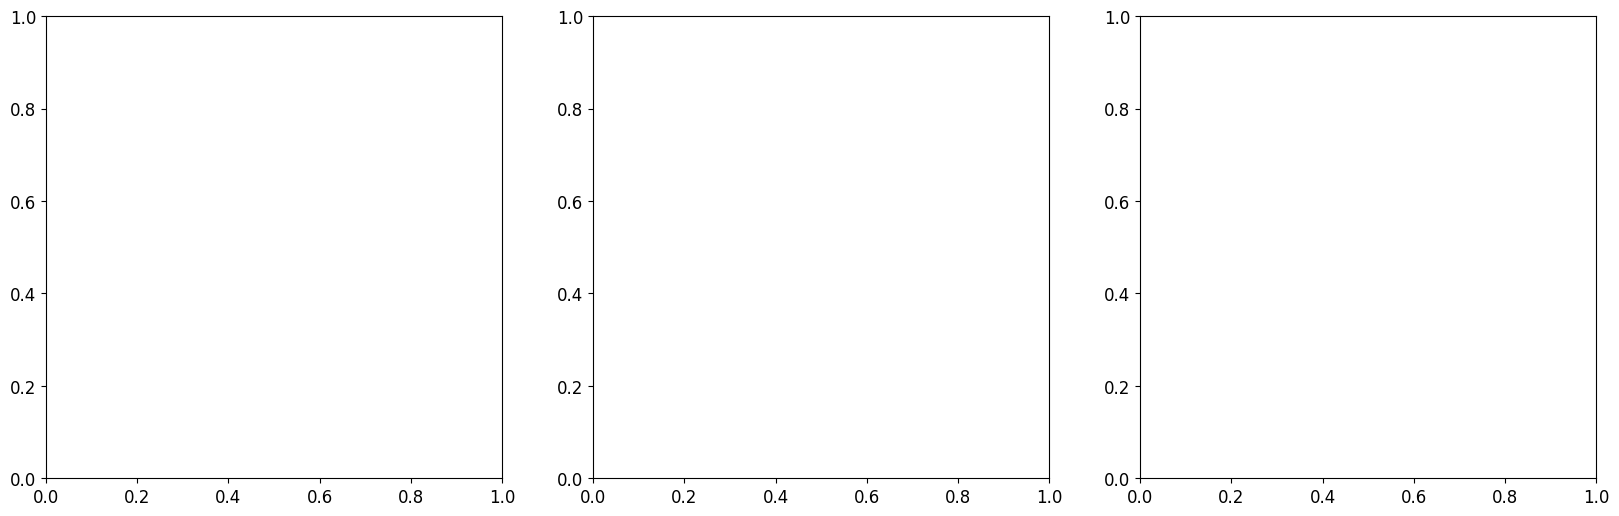

In [ ]:
# 必要なライブラリのインポート
!apt-get -y install fonts-ipafont-gothic  # 日本語フォントのインストール
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from matplotlib import font_manager  # フォント管理用ライブラリ

# IPAexGothic フォント設定
font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12

# データピボットとプロット生成関数
def create_heatmap(data, index, columns, title, xlabel, ylabel, cmap, ax):
    pivot_table = data.pivot_table(index=index, columns=columns, aggfunc='size', fill_value=0).iloc[::-1]
    sns.heatmap(pivot_table, ax=ax, cmap=cmap, annot=True, fmt="d", cbar=False, annot_kws={"size": 10})
    ax.set_title(title, fontproperties=font_prop)
    ax.set_xlabel(xlabel, fontproperties=font_prop)
    ax.set_ylabel(ylabel, fontproperties=font_prop)

def create_histogram(data, column, title, xlabel, ax, color, bins=5, max_y=None):
    data[column].plot(kind='hist', bins=bins, ax=ax, color=color, alpha=0.7)
    ax.set_title(title, fontproperties=font_prop)
    ax.set_xlabel(xlabel, fontproperties=font_prop)
    ax.set_xticks(range(int(data[column].min()), int(data[column].max()) + 1))  # 修正済み
    if max_y:
        ax.set_ylim(0, max_y)

# Excelファイルへの出力設定
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/Heatmap_and_Histograms_Modified.xlsx'
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    # ヒートマップの生成
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    heatmap_params = [
        ('Factor_Career_Development', 'Factor_Role_Importance',
         "Factor_Career_Development vs Factor_Role_Importance",
         "Factor_Role_Importance", "Factor_Career_Development", "Blues", axes[0]),
        ('Factor_Career_Development', 'Q25',
         "Factor_Career_Development vs Q25",
         "Q25", "Factor_Career_Development", "Oranges", axes[1]),
        ('Factor_Role_Importance', 'Q25',
         "Factor_Role_Importance vs Q25",
         "Q25", "Factor_Role_Importance", "Greens", axes[2])
    ]
    for params in heatmap_params:
        create_heatmap(data_cleaned, *params)
    plt.tight_layout(pad=2)
    image_stream_heatmap = io.BytesIO()
    plt.savefig(image_stream_heatmap, format='png', dpi=300)
    plt.close(fig)
    worksheet = writer.book.add_worksheet('Heatmaps')
    writer.sheets['Heatmaps'] = worksheet
    worksheet.insert_image('B2', 'heatmap_charts', {'image_data': image_stream_heatmap, 'x_scale': 0.5, 'y_scale': 0.5})

    # ヒストグラムの生成
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    max_y = max(data_cleaned['Factor_Career_Development'].value_counts().max(),
                data_cleaned['Factor_Role_Importance'].value_counts().max(),
                data_cleaned['Q25'].value_counts().max())
    histogram_params = [
        ('Factor_Career_Development', "Histogram of Factor_Career_Development",
         "Factor_Career_Development", axes[0], 'blue'),
        ('Factor_Role_Importance', "Histogram of Factor_Role_Importance",
         "Factor_Role_Importance", axes[1], 'orange'),
        ('Q25', "Histogram of Q25", "Q25", axes[2], 'green')
    ]
    for params in histogram_params:
        create_histogram(data_cleaned, *params, bins=5, max_y=max_y)
    plt.tight_layout(pad=2)
    image_stream_histogram = io.BytesIO()
    plt.savefig(image_stream_histogram, format='png', dpi=300)
    plt.close(fig)
    worksheet = writer.book.add_worksheet('Histograms')
    writer.sheets['Histograms'] = worksheet
    worksheet.insert_image('B2', 'histogram_charts', {'image_data': image_stream_histogram, 'x_scale': 0.5, 'y_scale': 0.5})

print(f"ヒートマップとヒストグラムを含むExcelファイルを保存しました: {output_file_path}")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


KeyError: 'Factor_Career_Development'

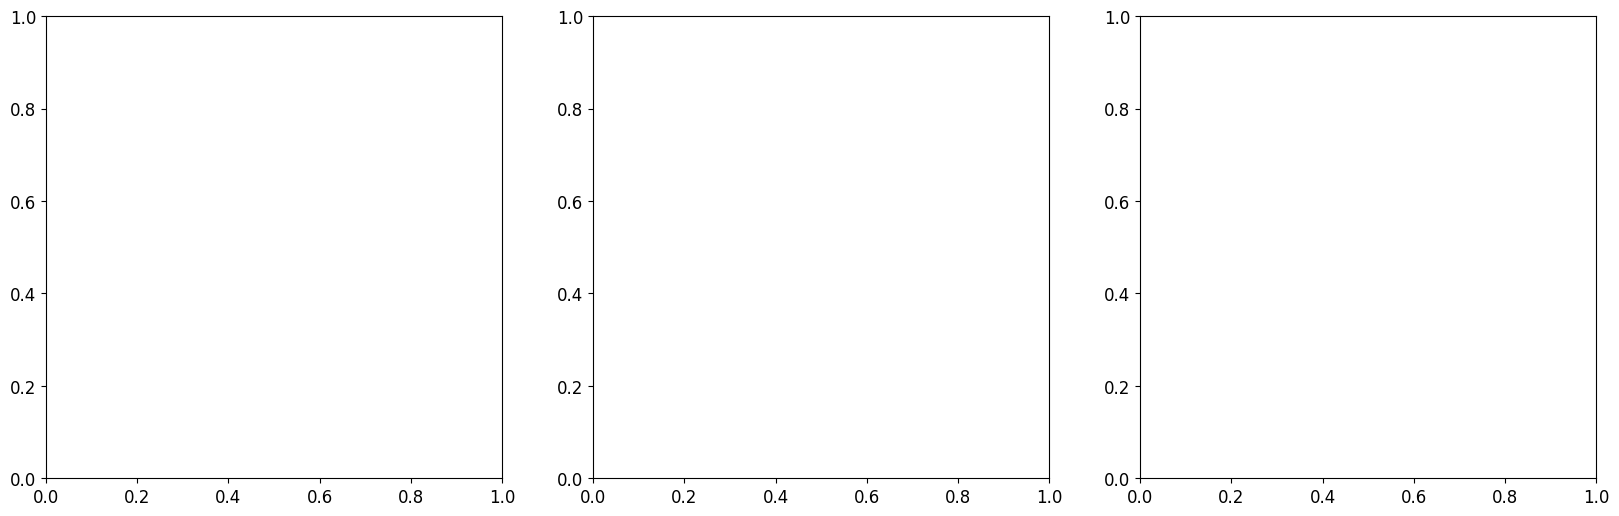

In [ ]:
# 必要なライブラリのインポート
!apt-get -y install fonts-ipafont-gothic  # 日本語フォントのインストール
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from matplotlib import font_manager  # フォント管理用ライブラリ

# IPAexGothic フォント設定
font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12

# データピボットとプロット生成関数
def create_heatmap(data, index, columns, title, xlabel, ylabel, cmap, ax):
    pivot_table = data.pivot_table(index=index, columns=columns, aggfunc='size', fill_value=0).iloc[::-1]
    sns.heatmap(pivot_table, ax=ax, cmap=cmap, annot=True, fmt="d", cbar=False, annot_kws={"size": 10})
    ax.set_title(title, fontproperties=font_prop)
    ax.set_xlabel(xlabel, fontproperties=font_prop)
    ax.set_ylabel(ylabel, fontproperties=font_prop)

def create_histogram(data, column, title, xlabel, ax, color, bins=5, max_y=None):
    data[column].plot(kind='hist', bins=bins, ax=ax, color=color, alpha=0.7)
    ax.set_title(title, fontproperties=font_prop)
    ax.set_xlabel(xlabel, fontproperties=font_prop)
    ax.set_xticks(range(int(data[column].min()), int(data[column].max()) + 1))  # 修正済み
    if max_y:
        ax.set_ylim(0, max_y)

# Excelファイルへの出力設定
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/Heatmap_and_Histograms_Updated.xlsx'
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    # ヒートマップの生成
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    heatmap_params = [
        ('Factor_Career_Development', 'Factor_Role_Importance',
         "Factor_Career_Development vs Factor_Role_Importance",
         "Factor_Role_Importance", "Factor_Career_Development", "Blues", axes[0]),
        ('Factor_Career_Development', 'Mission_Vision_Value_Alignment',
         "Factor_Career_Development vs Mission_Vision_Value_Alignment",
         "Mission_Vision_Value_Alignment", "Factor_Career_Development", "Oranges", axes[1]),
        ('Factor_Role_Importance', 'Mission_Vision_Value_Alignment',
         "Factor_Role_Importance vs Mission_Vision_Value_Alignment",
         "Mission_Vision_Value_Alignment", "Factor_Role_Importance", "Greens", axes[2])
    ]
    for params in heatmap_params:
        create_heatmap(data_cleaned, *params)
    plt.tight_layout(pad=2)
    image_stream_heatmap = io.BytesIO()
    plt.savefig(image_stream_heatmap, format='png', dpi=300)
    plt.close(fig)
    worksheet = writer.book.add_worksheet('Heatmaps')
    writer.sheets['Heatmaps'] = worksheet
    worksheet.insert_image('B2', 'heatmap_charts', {'image_data': image_stream_heatmap, 'x_scale': 0.5, 'y_scale': 0.5})

    # ヒストグラムの生成
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    max_y = max(data_cleaned['Factor_Career_Development'].value_counts().max(),
                data_cleaned['Factor_Role_Importance'].value_counts().max(),
                data_cleaned['Mission_Vision_Value_Alignment'].value_counts().max())
    histogram_params = [
        ('Factor_Career_Development', "Histogram of Factor_Career_Development",
         "Factor_Career_Development", axes[0], 'blue'),
        ('Factor_Role_Importance', "Histogram of Factor_Role_Importance",
         "Factor_Role_Importance", axes[1], 'orange'),
        ('Mission_Vision_Value_Alignment', "Histogram of Mission_Vision_Value_Alignment",
         "Mission_Vision_Value_Alignment", axes[2], 'green')
    ]
    for params in histogram_params:
        create_histogram(data_cleaned, *params, bins=5, max_y=max_y)
    plt.tight_layout(pad=2)
    image_stream_histogram = io.BytesIO()
    plt.savefig(image_stream_histogram, format='png', dpi=300)
    plt.close(fig)
    worksheet = writer.book.add_worksheet('Histograms')
    writer.sheets['Histograms'] = worksheet
    worksheet.insert_image('B2', 'histogram_charts', {'image_data': image_stream_histogram, 'x_scale': 0.5, 'y_scale': 0.5})

print(f"ヒートマップとヒストグラムを含むExcelファイルを保存しました: {output_file_path}")


In [ ]:
# 公務員データに絞り込み
public_sector_data = data_cleaned[data_cleaned['Company_Size_Public_Sector'] == 1]

# 「勤務地が東京で、かつ居住地が東京以外のデータ」を除外
public_sector_data = public_sector_data[~((public_sector_data['Work_Region_Tokyo'] == 1) & (public_sector_data['Residence'] != 13))]

# グループ分け
tokyo_group = public_sector_data[public_sector_data['Work_Region_Tokyo'] == 1]
non_tokyo_group = public_sector_data[public_sector_data['Work_Region_Tokyo'] != 1]

# Excelファイルへの出力設定
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/Grouped_Heatmap_and_Histograms_Comparison.xlsx'
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    ### ヒートマップ比較シートの作成 ###
    combined_heatmap_stream = io.BytesIO()
    fig_combined_heatmap, axes_combined_heatmap = plt.subplots(2, 3, figsize=(20, 12))

    for idx, (group_name, group_data) in enumerate([('Tokyo', tokyo_group), ('Non_Tokyo', non_tokyo_group)]):
        heatmap_params = [
            ('Q23', 'Q27', f"Q23_転職意向 vs Q27_熱中度 ({group_name})", "Q27_熱中度", "Q23_転職意向", "Blues", axes_combined_heatmap[idx, 0]),
            ('Q23', 'Q36', f"Q23_転職意向 vs Q36_満足度 ({group_name})", "Q36_満足度", "Q23_転職意向", "Oranges", axes_combined_heatmap[idx, 1]),
            ('Q36', 'Q27', f"Q36_満足度 vs Q27_熱中度 ({group_name})", "Q27_熱中度", "Q36_満足度", "Greens", axes_combined_heatmap[idx, 2])
        ]
        for params in heatmap_params:
            create_heatmap(group_data, *params)

    plt.tight_layout(pad=3)
    plt.suptitle("Heatmap Comparison: Tokyo vs Non-Tokyo", fontsize=16, y=1.02)
    plt.savefig(combined_heatmap_stream, format='png', dpi=300)
    plt.close(fig_combined_heatmap)

    heatmap_comparison_sheet = writer.book.add_worksheet('Heatmap_Comparison')
    writer.sheets['Heatmap_Comparison'] = heatmap_comparison_sheet
    heatmap_comparison_sheet.insert_image('B2', 'heatmap_comparison', {'image_data': combined_heatmap_stream, 'x_scale': 0.5, 'y_scale': 0.5})

    ### ヒストグラム比較シートの作成 ###
    combined_histogram_stream = io.BytesIO()
    fig_combined_histogram, axes_combined_histogram = plt.subplots(2, 3, figsize=(20, 12))

    for idx, (group_name, group_data) in enumerate([('Tokyo', tokyo_group), ('Non_Tokyo', non_tokyo_group)]):
        max_y = max(group_data['Q23'].value_counts().max(),
                    group_data['Q27'].value_counts().max(),
                    group_data['Q36'].value_counts().max())
        histogram_params = [
            ('Q23', f"Histogram of Q23_転職意向 ({group_name})", "Q23_転職意向", axes_combined_histogram[idx, 0], 'blue'),
            ('Q27', f"Histogram of Q27_熱中度 ({group_name})", "Q27_熱中度", axes_combined_histogram[idx, 1], 'orange'),
            ('Q36', f"Histogram of Q36_満足度 ({group_name})", "Q36_満足度", axes_combined_histogram[idx, 2], 'green')
        ]
        for params in histogram_params:
            create_histogram(group_data, *params, bins=5, max_y=max_y)

    plt.tight_layout(pad=3)
    plt.suptitle("Histogram Comparison: Tokyo vs Non-Tokyo", fontsize=16, y=1.02)
    plt.savefig(combined_histogram_stream, format='png', dpi=300)
    plt.close(fig_combined_histogram)

    histogram_comparison_sheet = writer.book.add_worksheet('Histogram_Comparison')
    writer.sheets['Histogram_Comparison'] = histogram_comparison_sheet
    histogram_comparison_sheet.insert_image('B2', 'histogram_comparison', {'image_data': combined_histogram_stream, 'x_scale': 0.5, 'y_scale': 0.5})

    ### ヒートマップとヒストグラムの個別シートを作成 ###
    for group_name, group_data in [('Tokyo', tokyo_group), ('Non_Tokyo', non_tokyo_group)]:
        # ヒートマップ
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        heatmap_params = [
            ('Q23', 'Q27', f"Q23_転職意向 vs Q27_熱中度 ({group_name})", "Q27_熱中度", "Q23_転職意向", "Blues", axes[0]),
            ('Q23', 'Q36', f"Q23_転職意向 vs Q36_満足度 ({group_name})", "Q36_満足度", "Q23_転職意向", "Oranges", axes[1]),
            ('Q36', 'Q27', f"Q36_満足度 vs Q27_熱中度 ({group_name})", "Q27_熱中度", "Q36_満足度", "Greens", axes[2])
        ]
        for params in heatmap_params:
            create_heatmap(group_data, *params)
        plt.tight_layout(pad=2)
        image_stream_heatmap = io.BytesIO()
        plt.savefig(image_stream_heatmap, format='png', dpi=300)
        plt.close(fig)
        worksheet_name = f'{group_name}_Heatmaps'
        worksheet = writer.book.add_worksheet(worksheet_name)
        writer.sheets[worksheet_name] = worksheet
        worksheet.insert_image('B2', 'heatmap_charts', {'image_data': image_stream_heatmap, 'x_scale': 0.5, 'y_scale': 0.5})

        # ヒストグラム
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        histogram_params = [
            ('Q23', f"Histogram of Q23_転職意向 ({group_name})", "Q23_転職意向", axes[0], 'blue'),
            ('Q27', f"Histogram of Q27_熱中度 ({group_name})", "Q27_熱中度", axes[1], 'orange'),
            ('Q36', f"Histogram of Q36_満足度 ({group_name})", "Q36_満足度", axes[2], 'green')
        ]
        for params in histogram_params:
            create_histogram(group_data, *params, bins=5, max_y=max_y)
        plt.tight_layout(pad=2)
        image_stream_histogram = io.BytesIO()
        plt.savefig(image_stream_histogram, format='png', dpi=300)
        plt.close(fig)
        worksheet_name = f'{group_name}_Histograms'
        worksheet = writer.book.add_worksheet(worksheet_name)
        writer.sheets[worksheet_name] = worksheet
        worksheet.insert_image('B2', 'histogram_charts', {'image_data': image_stream_histogram, 'x_scale': 0.5, 'y_scale': 0.5})

print(f"比較シートを含むヒートマップとヒストグラムを含むExcelファイルを保存しました: {output_file_path}")


比較シートを含むヒートマップとヒストグラムを含むExcelファイルを保存しました: /content/drive/MyDrive/■研究/ファイル出力先/Grouped_Heatmap_and_Histograms_Comparison.xlsx


In [ ]:
# 必要なライブラリをインポート
!pip install XlsxWriter
import pandas as pd
import numpy as np

# 詳細版結果の出力

# 結果をExcelファイルに保存し、列幅を自動調整＆回帰係数とp値に基づいて色付けする関数
def save_results_to_excel_with_coef_pvalue_coloring(results, filename):
    with pd.ExcelWriter(filename, engine='xlsxwriter') as writer:
        for dep_var in dependent_variables.keys():
            result_list = []
            for key, result in results.items():
                if key.startswith(dep_var):
                    summary_table = pd.read_html(result['summary_df'], header=0, index_col=0)[0]
                    result_data = {
                        'Description': result['description'],
                        'R-squared': result['r_squared'],
                        'F-statistic': result['f_statistic'],
                        'F-pvalue': result['f_pvalue']
                    }
                    for var in summary_table.index:
                        coef = summary_table.loc[var, 'coef']
                        p_value = summary_table.loc[var, 'P>|t|']
                        result_data[f'Coef_{var}'] = coef
                        result_data[f'StdErr_{var}'] = summary_table.loc[var, 'std err']
                        result_data[f'Pvalue_{var}'] = p_value

                    result_list.append(result_data)

            df = pd.DataFrame(result_list)
            df.to_excel(writer, sheet_name=dep_var, index=False)

            # ワークシートとワークブックを取得
            workbook = writer.book
            worksheet = writer.sheets[dep_var]

            # 条件付き書式を適用（回帰係数とp値に基づいて色付け）
            for col_num, col in enumerate(df.columns):
                if col.startswith('Coef_'):  # 回帰係数の列に対してのみ色付け
                    for row_num in range(1, len(df) + 1):
                        coef_value = df.loc[row_num - 1, col]  # 回帰係数の値
                        p_value = df.loc[row_num - 1, f'Pvalue_{col[5:]}']  # 対応するp値

                        # NaNやinf値を適切に処理（Noneに変換）
                        if pd.isna(coef_value) or np.isinf(coef_value):
                            coef_value = None

                        # p値が0.05以下の有意なものを強調（薄めの色に調整）
                        if p_value < 0.05 and coef_value is not None:
                            if coef_value > 0:
                                color = '#99CCFF'  # 明るい青（正の有意な係数）
                            else:
                                color = '#FF9999'  # 明るい赤（負の有意な係数）
                        else:
                            if coef_value is not None:
                                if coef_value > 0:
                                    color = '#E6F0FF'  # 薄い青（正の非有意な係数）
                                else:
                                    color = '#FFE6E6'  # 薄い赤（負の非有意な係数）
                            else:
                                color = '#FFFFFF'  # NaNやinfの場合は白にする

                        worksheet.write(row_num, col_num, coef_value, workbook.add_format({'bg_color': color}))

            # 列幅を自動調整
            for i, col in enumerate(df.columns):
                max_length = max(df[col].astype(str).map(len).max(), len(col))
                worksheet.set_column(i, i, max_length + 2)

# 保存先パスを指定
output_path = '/content/drive/MyDrive/■研究/ファイル出力先/regression_results.xlsx'

# 結果をエクセルファイルに保存
save_results_to_excel_with_coef_pvalue_coloring(regression_results, output_path)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 5.8 MB/s eta 0:00:00


<ipython-input-6-3053dd69fdd6>:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  summary_table = pd.read_html(result['summary_df'], header=0, index_col=0)[0]
<ipython-input-6-3053dd69fdd6>:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  summary_table = pd.read_html(result['summary_df'], header=0, index_col=0)[0]
<ipython-input-6-3053dd69fdd6>:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  summary_table = pd.read_html(result['summary_df'], header=0, index_col=0)[0]
<ipython-input-6-3053dd69fdd6>:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read fr

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

# 組織のスキル重視度と個人のキャリア形成等への関心の関係をチェック

# スキル重視度の合成変数
data_cleaned['Skill_Importance_Index'] = data_cleaned[['Q11', 'Q12', 'Q19']].mean(axis=1)

# リスキリング・キャリア形成への関心度の合成変数
data_cleaned['Career_Interest_Index'] = data_cleaned[['Q14', 'Q17', 'Q18']].mean(axis=1)

# 各組織区分でのデータ分割
public_sector_data = data_cleaned[data_cleaned['Company_Size_Public_Sector'] == 1]
large_company_data = data_cleaned[(data_cleaned['Company_Size_Large'] == 1) & (data_cleaned['Company_Size_Public_Sector'] == 0)]
small_company_data = data_cleaned[(data_cleaned['Company_Size_Large'] == 0) & (data_cleaned['Company_Size_Public_Sector'] == 0)]

# 各組織区分ごとの相関係数とサンプルサイズの計算
public_corr, _ = pearsonr(public_sector_data['Skill_Importance_Index'], public_sector_data['Career_Interest_Index'])
large_corr, _ = pearsonr(large_company_data['Skill_Importance_Index'], large_company_data['Career_Interest_Index'])
small_corr, _ = pearsonr(small_company_data['Skill_Importance_Index'], small_company_data['Career_Interest_Index'])

public_sample_size = len(public_sector_data)
large_sample_size = len(large_company_data)
small_sample_size = len(small_company_data)

# 各組織区分ごとの平均値の計算
public_sector_means = public_sector_data[['Q11', 'Q12', 'Q19', 'Q14', 'Q17', 'Q18']].mean()
large_company_means = large_company_data[['Q11', 'Q12', 'Q19', 'Q14', 'Q17', 'Q18']].mean()
small_company_means = small_company_data[['Q11', 'Q12', 'Q19', 'Q14', 'Q17', 'Q18']].mean()

# 平均値のデータフレームの作成
means_df = pd.DataFrame({
    'Variable': ['Q11', 'Q12', 'Q19', 'Q14', 'Q17', 'Q18'],
    'Public Sector Mean': public_sector_means.values,
    'Large Company Mean': large_company_means.values,
    'Small Company Mean': small_company_means.values
})

# 散布図の保存パス
scatter_plot_path = '/content/drive/MyDrive/■研究/ファイル出力先/Skill_Importance_vs_Career_Interest_Scatter.png'

# 散布図の作成
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# 公務員の散布図
sns.kdeplot(
    x=public_sector_data['Skill_Importance_Index'],
    y=public_sector_data['Career_Interest_Index'],
    ax=axes[0], cmap="Blues", shade=True, thresh=0.05
)
axes[0].scatter(public_sector_data['Skill_Importance_Index'], public_sector_data['Career_Interest_Index'], alpha=0.5)
axes[0].set_title(f'Public Sector\nCorrelation: {public_corr:.2f} (n={public_sample_size})')
axes[0].set_xlabel('Skill Importance Index')
axes[0].set_ylabel('Career Interest Index')

# 大企業の散布図
sns.kdeplot(
    x=large_company_data['Skill_Importance_Index'],
    y=large_company_data['Career_Interest_Index'],
    ax=axes[1], cmap="Oranges", shade=True, thresh=0.05
)
axes[1].scatter(large_company_data['Skill_Importance_Index'], large_company_data['Career_Interest_Index'], alpha=0.5, color='orange')
axes[1].set_title(f'Large Company\nCorrelation: {large_corr:.2f} (n={large_sample_size})')
axes[1].set_xlabel('Skill Importance Index')

# 中小企業の散布図
sns.kdeplot(
    x=small_company_data['Skill_Importance_Index'],
    y=small_company_data['Career_Interest_Index'],
    ax=axes[2], cmap="Greens", shade=True, thresh=0.05
)
axes[2].scatter(small_company_data['Skill_Importance_Index'], small_company_data['Career_Interest_Index'], alpha=0.5, color='green')
axes[2].set_title(f'Small Company\nCorrelation: {small_corr:.2f} (n={small_sample_size})')
axes[2].set_xlabel('Skill Importance Index')

# 軸範囲を統一
for ax in axes:
    ax.set_xlim(0, 5)  # 必要に応じて調整
    ax.set_ylim(0, 5)

plt.suptitle('Skill Importance vs. Career Interest by Organization Type')
plt.tight_layout()
plt.savefig(scatter_plot_path)
plt.close(fig)

# エクセルファイルへの出力
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/Skill_Importance_Career_Interest_Data_with_Averages.xlsx'

with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    # 合成変数を含むデータの出力
    data_cleaned[['Skill_Importance_Index', 'Career_Interest_Index', 'Company_Size_Large', 'Company_Size_Public_Sector']].to_excel(writer, sheet_name='Data_with_Indices', index=False)

    # 各変数の平均値を含むデータの出力
    means_df.to_excel(writer, sheet_name='Variable_Means', index=False)

    # 散布図画像をエクセルシートに挿入
    worksheet_data = writer.sheets['Data_with_Indices']
    worksheet_data.insert_image('E2', scatter_plot_path, {'x_scale': 0.5, 'y_scale': 0.5})

    # 列幅の調整
    for i, column in enumerate(data_cleaned.columns):
        column_width = max(data_cleaned[column].astype(str).map(len).max(), len(column)) + 2
        worksheet_data.set_column(i, i, column_width)

print(f"合成変数、各組織区分ごとの平均値、散布図を含むデータをエクセルファイルとして保存しました: {output_file_path}")


<ipython-input-15-b29a049e3773>:48: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-15-b29a049e3773>:59: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-15-b29a049e3773>:69: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


合成変数、各組織区分ごとの平均値、散布図を含むデータをエクセルファイルとして保存しました: /content/drive/MyDrive/■研究/ファイル出力先/Skill_Importance_Career_Interest_Data_with_Averages.xlsx


# DID

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 公務員データに絞り込み
public_sector_data = data_cleaned.query("Company_Size_Public_Sector == 1").copy()

# データの説明
data_description = 'このデータは、公務員のみを抽出して分析を行っています。'

# サンプルサイズを表示
print(f"サンプルサイズ: {len(public_sector_data)} 件")

# ターゲットAgeグループの作成（48歳未満）
public_sector_data['Target_Age_Group'] = (public_sector_data['Age'] < 48).astype(int)

# Q23 のダミー変数作成
public_sector_data['Q23_Job_Change_Intention'] = public_sector_data['Q23'].between(3, 5).astype(int)
public_sector_data['Q23_Strong_Job_Change_Intention'] = (public_sector_data['Q23'] >= 4).astype(int)

# ダミー変数の作成関数
def create_dummy(data, col, prefix, values):
    for val in values:
        data[f'{prefix}_{val}'] = (data[col] == val).astype(int)

# Q23の詳細なダミー変数を作成
create_dummy(public_sector_data, 'Q23', 'Q23_Response', range(1, 6))

# Work_Location と Residence のダミー変数
for col in ['Work_Location', 'Residence']:
    public_sector_data[f'{col}_Tokyo'] = (public_sector_data[col] == 13).astype(int)

# 交差項の作成
public_sector_data['Female_Work_Location_Tokyo'] = public_sector_data['Female'] * public_sector_data['Work_Location_Tokyo']
public_sector_data['Interaction_Term'] = public_sector_data['Target_Age_Group'] * public_sector_data['Work_Location_Tokyo']

# VIF 計算
def calculate_vif(data, features):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
    return vif_data

# VIF計算の対象変数（順番変更済み）
features = ['Interaction_Term', 'Target_Age_Group', 'Work_Location_Tokyo',
            'Female', 'Residence_Tokyo', 'Female_Work_Location_Tokyo']
vif_results = calculate_vif(public_sector_data, features)
print("VIFの結果:\n", vif_results)

# 交差項間の相関行列
print("\n交差項間の相関行列:\n", public_sector_data[features].corr())

# 回帰分析
dependent_variables = [
    'Q23', 'Q27', 'Q36',
    'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
    'Q23_Response_5', 'Q23_Response_4', 'Q23_Response_3',
    'Q23_Response_2', 'Q23_Response_1'
]

results_dict = {}
model_summaries = {}

for dv in dependent_variables:
    formula = f"{dv} ~ Interaction_Term + Target_Age_Group + Work_Location_Tokyo + Female + Residence_Tokyo + Female_Work_Location_Tokyo"
    model = smf.ols(formula, data=public_sector_data).fit()

    results_dict[dv] = pd.DataFrame({
        'Variable': model.params.index,
        'Coefficient': model.params.values.round(3),
        'Standard Error': model.bse.round(3),
        't-value': model.tvalues.round(3),
        'p-value': model.pvalues.round(3)
    })

    model_summaries[dv] = {
        'Dependent Variable': dv,
        'Description': 'Analysis of Public Sector Data',
        'R^2': model.rsquared,
        'F-statistic': model.fvalue,
        'F-statistic p-value': model.f_pvalue
    }

# データの保存
output_path = '/content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_for_DID.xlsx'
public_sector_data.to_excel(output_path, index=False)
print(f'分析に使用したデータが {output_path} に保存されました。')

# モデルサマリーの確認
for dv, summary in model_summaries.items():
    print(f"Model Summary for {dv}:\n", summary)


サンプルサイズ: 500 件
VIFの結果:
                       Feature       VIF
0            Interaction_Term  2.558801
1            Target_Age_Group  1.688072
2         Work_Location_Tokyo  2.975950
3                      Female  1.914712
4             Residence_Tokyo  1.732526
5  Female_Work_Location_Tokyo  2.276133

交差項間の相関行列:
                             Interaction_Term  Target_Age_Group  \
Interaction_Term                    1.000000          0.358991   
Target_Age_Group                    0.358991          1.000000   
Work_Location_Tokyo                 0.668337         -0.013208   
Female                              0.158613          0.185615   
Residence_Tokyo                     0.423322         -0.006172   
Female_Work_Location_Tokyo          0.491317          0.073355   

                            Work_Location_Tokyo    Female  Residence_Tokyo  \
Interaction_Term                       0.668337  0.158613         0.423322   
Target_Age_Group                      -0.013208  0.185615       

In [ ]:
import os
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --- データ準備 ---
# 公務員データに絞り込み
public_sector_data = data_cleaned.query("Company_Size_Public_Sector == 1").copy()

# データの説明
data_description = 'このデータは、公務員のみを抽出して分析を行っています。'

# サンプルサイズを表示
print(f"サンプルサイズ: {len(public_sector_data)} 件")

# ターゲットAgeグループの作成（48歳未満）
public_sector_data['Target_Age_Group'] = (public_sector_data['Age'] < 48).astype(int)

# Q23 のダミー変数作成
public_sector_data['Q23_Job_Change_Intention'] = public_sector_data['Q23'].between(3, 5).astype(int)
public_sector_data['Q23_Strong_Job_Change_Intention'] = (public_sector_data['Q23'] >= 4).astype(int)

# ダミー変数の作成関数
def create_dummy(data, col, prefix, values):
    for val in values:
        data[f'{prefix}_{val}'] = (data[col] == val).astype(int)

# Q23の詳細なダミー変数を作成
create_dummy(public_sector_data, 'Q23', 'Q23_Response', range(1, 6))

# Work_Location と Residence のダミー変数
for col in ['Work_Location', 'Residence']:
    public_sector_data[f'{col}_Tokyo'] = (public_sector_data[col] == 13).astype(int)

# 交差項の作成
public_sector_data['Female_Work_Location_Tokyo'] = public_sector_data['Female'] * public_sector_data['Work_Location_Tokyo']
public_sector_data['Interaction_Term'] = public_sector_data['Target_Age_Group'] * public_sector_data['Work_Location_Tokyo']

# --- VIF 計算 ---
def calculate_vif(data, features):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
    return vif_data

features = ['Interaction_Term', 'Target_Age_Group', 'Work_Location_Tokyo',
            'Female', 'Residence_Tokyo', 'Female_Work_Location_Tokyo']
vif_results = calculate_vif(public_sector_data, features)
print("VIFの結果:\n", vif_results)

print("\n交差項間の相関行列:\n", public_sector_data[features].corr())

# --- 回帰分析 ---
dependent_variables = [
    'Q23', 'Q27', 'Q36',
    'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
    'Q23_Response_5', 'Q23_Response_4', 'Q23_Response_3',
    'Q23_Response_2', 'Q23_Response_1'
]

results_dict = {}
model_summaries = {}

for dv in dependent_variables:
    formula = f"{dv} ~ Interaction_Term + Target_Age_Group + Work_Location_Tokyo + Female + Residence_Tokyo + Female_Work_Location_Tokyo"
    model = smf.ols(formula, data=public_sector_data).fit()

    results_dict[dv] = pd.DataFrame({
        'Variable': model.params.index,
        'Coefficient': model.params.values.round(3),
        'Standard Error': model.bse.round(3),
        't-value': model.tvalues.round(3),
        'p-value': model.pvalues.round(3)
    })

    model_summaries[dv] = {
        'Dependent Variable': dv,
        'Description': 'Analysis of Public Sector Data',
        'R^2': model.rsquared,
        'F-statistic': model.fvalue,
        'F-statistic p-value': model.f_pvalue
    }

# --- 分析に使用したデータの保存 ---
data_output_path = '/content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_for_DID.xlsx'
os.makedirs(os.path.dirname(data_output_path), exist_ok=True)
public_sector_data.to_excel(data_output_path, index=False)
print(f'分析に使用したデータが {data_output_path} に保存されました。')

# --- モデルサマリーのエクセル出力 ---
# model_summaries 辞書をデータフレームに変換
model_summary_df = pd.DataFrame(list(model_summaries.values()))

# 出力先のファイル名（適当に変更）
summary_output_path = '/content/drive/MyDrive/■研究/ファイル出力先/public_sector_model_summary.xlsx'
os.makedirs(os.path.dirname(summary_output_path), exist_ok=True)
model_summary_df.to_excel(summary_output_path, index=False)
print(f'各モデルの統計量が {summary_output_path} に保存されました。')

# --- モデルサマリーの確認 ---
for dv, summary in model_summaries.items():
    print(f"\nModel Summary for {dv}:\n", summary)


サンプルサイズ: 500 件
VIFの結果:
                       Feature       VIF
0            Interaction_Term  2.558801
1            Target_Age_Group  1.688072
2         Work_Location_Tokyo  2.975950
3                      Female  1.914712
4             Residence_Tokyo  1.732526
5  Female_Work_Location_Tokyo  2.276133

交差項間の相関行列:
                             Interaction_Term  Target_Age_Group  \
Interaction_Term                    1.000000          0.358991   
Target_Age_Group                    0.358991          1.000000   
Work_Location_Tokyo                 0.668337         -0.013208   
Female                              0.158613          0.185615   
Residence_Tokyo                     0.423322         -0.006172   
Female_Work_Location_Tokyo          0.491317          0.073355   

                            Work_Location_Tokyo    Female  Residence_Tokyo  \
Interaction_Term                       0.668337  0.158613         0.423322   
Target_Age_Group                      -0.013208  0.185615       

In [ ]:
# スタンダードエラーを括弧書きでフォーマットし、有意度記号を適用する関数
def format_with_std_error(row, workbook):
    coef, std_err, p_value = row['Coefficient'], row['Standard Error'], row['p-value']
    significance = '***' if p_value < 0.01 else '**' if p_value < 0.05 else '*' if p_value < 0.1 else ''
    formatted_coef = f"{coef:.3f}{significance}\n({std_err:.3f})" if pd.notna(coef) else ""

    # デフォルトのフォーマット
    format_to_apply = workbook.add_format({'align': 'center', 'valign': 'vcenter', 'text_wrap': True})

    # 背景色の設定
    if pd.notna(coef) and significance:
        bg_color = '#99CCFF' if coef > 0 else '#FF9999'
        format_to_apply.set_bg_color(bg_color)
        format_to_apply.set_font_color('#000000')

    return formatted_coef, format_to_apply

# Excelファイルに結果を保存
output_path = '/content/drive/MyDrive/■研究/ファイル出力先/difference_in_differences_results_with_std_error.xlsx'

with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    for dependent_var, result_df in results_dict.items():
        ordered_df = result_df.sort_values(by='Variable', key=lambda x: x != 'Interaction_Term')  # Interaction_Termを先頭へ
        worksheet_name = f'Res_{dependent_var[:25]}'  # シート名を31文字以内に短縮
        ordered_df.to_excel(writer, sheet_name=worksheet_name, startrow=10, index=False)

        workbook, worksheet = writer.book, writer.sheets[worksheet_name]

        # モデルサマリー情報の書き込み
        summary_text = [
            f"Model Summary", data_description,
            f"Dependent Variable: {model_summaries[dependent_var]['Dependent Variable']}",
            f"Description: {model_summaries[dependent_var]['Description']}",
            f"Interaction_Term: 対象年代グループと東京勤務の交互作用効果",
            f"R^2: {model_summaries[dependent_var]['R^2']:.4f}",
            f"F-statistic: {model_summaries[dependent_var]['F-statistic']:.4f}",
            f"F-statistic p-value: {model_summaries[dependent_var]['F-statistic p-value']:.4f}"
        ]
        for i, text in enumerate(summary_text, start=1):
            worksheet.write(f"A{i}", text)

        # データ行の書き込み
        for row_num, (_, row) in enumerate(ordered_df.iterrows(), start=11):
            formatted_coef, format_to_apply = format_with_std_error(row, workbook)
            worksheet.write(row_num, 0, row['Variable'])
            worksheet.write(row_num, 1, formatted_coef, format_to_apply)
            worksheet.write(row_num, 3, row['t-value'])
            worksheet.write(row_num, 4, row['p-value'])

        # セルの高さと列幅の調整
        worksheet.set_column('B:B', 20)
        worksheet.set_row(11, None)

        # 有意度記号の説明を追加
        explanations = [
            "* `***` indicates statistical significance at the p < 0.01 level.",
            "** `**` indicates statistical significance at the p < 0.05 level.",
            "* `*` indicates statistical significance at the p < 0.1 level."
        ]
        for i, explanation in enumerate(explanations, start=30):
            worksheet.write(i, 0, explanation)

print(f"各従属変数に対する回帰結果を次の場所に保存しました: {output_path}")


各従属変数に対する回帰結果を次の場所に保存しました: /content/drive/MyDrive/■研究/ファイル出力先/difference_in_differences_results_with_std_error.xlsx


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 公務員データに絞り込み
public_sector_data = data_cleaned.query("Company_Size_Public_Sector == 1").copy()

# データの説明
data_description = 'このデータは、公務員のみを抽出して分析を行っています。'

# サンプルサイズを表示
print(f"サンプルサイズ: {len(public_sector_data)} 件")

# 変数の作成と加工
public_sector_data['Treatment_Group'] = public_sector_data['Age'].apply(lambda x: 1 if 25 <= x < 45 else 0)
public_sector_data['Dependent_Variable'] = public_sector_data[['Q23', 'Q27', 'Q36']].mean(axis=1)

# ダミー変数の作成を関数化
def create_dummy(data, col, prefix, values):
    for val in values:
        data[f'{prefix}_{val}'] = (data[col] == val).astype(int)

# Q23 のダミー変数作成
public_sector_data['Q23_Job_Change_Intention'] = public_sector_data['Q23'].between(3, 5).astype(int)
public_sector_data['Q23_Strong_Job_Change_Intention'] = (public_sector_data['Q23'] >= 4).astype(int)
create_dummy(public_sector_data, 'Q23', 'Q23_Response', range(1, 6))

# Work_Location と Residence のダミー変数
for col in ['Work_Location', 'Residence']:
    public_sector_data[f'{col}_Tokyo'] = (public_sector_data[col] == 13).astype(int)

# Age_Group のカテゴリ化
age_group_mapping = {
    1: '1.24歳以下', 2: '2.25〜29歳', 3: '3.30〜34歳',
    4: '4.35〜39歳', 5: '5.40〜44歳', 6: '6.45〜49歳',
    7: '7.50〜54歳', 8: '8.55〜59歳', 9: '9.60〜65歳'
}
public_sector_data['Age_Group'] = pd.Categorical(
    public_sector_data['Age_Group'].map(age_group_mapping),
    categories=age_group_mapping.values(), ordered=True
)

# 交差項の作成
public_sector_data['Female_Work_Location_Tokyo'] = public_sector_data['Female'] * public_sector_data['Work_Location_Tokyo']
public_sector_data['Female_Age_Group'] = public_sector_data['Female'] * public_sector_data['Age_Group'].cat.codes

# 東京勤務であり、25歳以上45歳未満であることの交互作用項
public_sector_data['Interaction_Term'] = public_sector_data['Treatment_Group'] * public_sector_data['Work_Location_Tokyo']

# VIF 計算
def calculate_vif(data, features):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
    return vif_data

features = ['Female', 'Work_Location_Tokyo', 'Residence_Tokyo',
            'Female_Work_Location_Tokyo', 'Female_Age_Group', 'Interaction_Term']
vif_results = calculate_vif(public_sector_data, features)
print("VIFの結果:\n", vif_results)

# 交差項間の相関行列
print("\n交差項間の相関行列:\n", public_sector_data[features].corr())

# 回帰分析
dependent_variables = [
    'Q23', 'Q27', 'Q36', 'Dependent_Variable',
    'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
    'Q23_Response_5', 'Q23_Response_4', 'Q23_Response_3',
    'Q23_Response_2', 'Q23_Response_1'
]

results_dict = {}
model_summaries = {}

for dv in dependent_variables:
    # リファレンスグループを指定
    formula = f"{dv} ~ Female + Work_Location_Tokyo + Residence_Tokyo + C(Age_Group, Treatment(reference='1.24歳以下')) + Female_Work_Location_Tokyo + Female_Age_Group + Interaction_Term"
    model = smf.ols(formula, data=public_sector_data).fit()

    # 結果を辞書に保存
    results_dict[dv] = pd.DataFrame({
        'Variable': model.params.index,
        'Coefficient': model.params.values.round(3),
        'Standard Error': model.bse.round(3),
        't-value': model.tvalues.round(3),
        'p-value': model.pvalues.round(3)
    })

    # モデルサマリーの保存
    model_summaries[dv] = {
        'Dependent Variable': dv,
        'Description': 'Analysis of Public Sector Data',
        'R^2': model.rsquared,
        'F-statistic': model.fvalue,
        'F-statistic p-value': model.f_pvalue
    }

# データの保存
output_path = '/content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_for_DID.xlsx'
public_sector_data.to_excel(output_path, index=False)
print(f'分析に使用したデータが {output_path} に保存されました。')

# モデルサマリーの確認
for dv, summary in model_summaries.items():
    print(f"Model Summary for {dv}:\n", summary)


サンプルサイズ: 500 件
VIFの結果:
                       Feature       VIF
0                      Female  3.955706
1         Work_Location_Tokyo  2.664428
2             Residence_Tokyo  1.726292
3  Female_Work_Location_Tokyo  2.161604
4            Female_Age_Group  3.725611
5            Interaction_Term  1.713006

交差項間の相関行列:
                               Female  Work_Location_Tokyo  Residence_Tokyo  \
Female                      1.000000             0.120820         0.088870   
Work_Location_Tokyo         0.120820             1.000000         0.569550   
Residence_Tokyo             0.088870             0.569550         1.000000   
Female_Work_Location_Tokyo  0.511910             0.553562         0.344969   
Female_Age_Group            0.805278             0.129131         0.076816   
Interaction_Term            0.151520             0.553562         0.325177   

                            Female_Work_Location_Tokyo  Female_Age_Group  \
Female                                        0.511910      

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# DIDモデル（年代毎の傾向の変化検証、交差項マックス）

# データの説明
data_description = 'このデータは、公務員のみを抽出して分析を行っています。'

# 従属変数リストとその説明
dependent_variables = [
    'Q23', 'Q27', 'Q36', 'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
    *[f'Q23_Response_{i}' for i in range(1, 6)]
]

variable_descriptions = {
    'Q23': 'あなた自身は、今後、転職することを考えていますか。',
    'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
    'Q36': 'あなたは、いまの職場で働くことに満足している。',
    'Q23_Job_Change_Intention': 'Q23の回答に基づく転職意向ダミー変数（3〜5が転職意向ありとして1、1〜2が転職意向なしとして0）',
    'Q23_Strong_Job_Change_Intention': 'Q23の回答に基づく強い転職意向ダミー変数（4〜5が強い転職意向ありとして1、1〜3が弱い転職意向またはなしとして0）',
    **{f'Q23_Response_{i}': f'Q23の回答が{i}の場合に1、他は0' for i in range(1, 6)}
}

# データコピー（絞り込みを外しました）
public_sector_data = data_cleaned.copy()

# 公務員データに絞り込み
public_sector_data = data_cleaned[data_cleaned['Company_Size_Public_Sector'] == 1]

# Q23のダミー変数作成
public_sector_data.loc[:, 'Q23_Job_Change_Intention'] = (public_sector_data['Q23'] >= 3).astype(int)
public_sector_data.loc[:, 'Q23_Strong_Job_Change_Intention'] = (public_sector_data['Q23'] >= 4).astype(int)
for i in range(1, 6):
    public_sector_data.loc[:, f'Q23_Response_{i}'] = (public_sector_data['Q23'] == i).astype(int)

# Work_Location と Residence のダミー変数作成
public_sector_data.loc[:, 'Work_Location_Tokyo'] = (public_sector_data['Work_Location'] == 13).astype(int)
public_sector_data.loc[:, 'Residence_Tokyo'] = (public_sector_data['Residence'] == 13).astype(int)

# Age_Group をカテゴリ型に変換し、リファレンスグループを「24歳以下」と「25_29」に設定
public_sector_data['Age_Group_Ref'] = public_sector_data['Age_Group'].apply(
    lambda x: 'Ref' if x in [1, 2] else f'Age_Group_{x}'
)
public_sector_data['Age_Group_Ref'] = public_sector_data['Age_Group_Ref'].astype('category')
public_sector_data['Age_Group_Ref'] = public_sector_data['Age_Group_Ref'].cat.reorder_categories(
    ['Ref'] + [f'Age_Group_{x}' for x in range(3, 10) if x not in [1, 2]], ordered=True
)

# 年代と東京勤務の交差項作成
age_group_labels = {
    3: '30_34', 4: '35_39', 5: '40_44',
    6: '45_49', 7: '50_54', 8: '55_59', 9: '60_65'
}
for age, label in age_group_labels.items():
    public_sector_data.loc[:, f'Age_Group_{label}_Work_Location_Tokyo'] = (
        (public_sector_data['Age_Group_Ref'] == f'Age_Group_{age}') & (public_sector_data['Work_Location_Tokyo'] == 1)
    ).astype(int)

# Female と各 Age_Group、Residence_Tokyo と各 Age_Group の交差項作成
for age, label in age_group_labels.items():
    public_sector_data.loc[:, f'Female_Age_Group_{label}'] = (
        (public_sector_data['Age_Group_Ref'] == f'Age_Group_{age}') & (public_sector_data['Female'] == 1)
    ).astype(int)
    public_sector_data.loc[:, f'Residence_Tokyo_Age_Group_{label}'] = (
        (public_sector_data['Age_Group_Ref'] == f'Age_Group_{age}') & (public_sector_data['Residence_Tokyo'] == 1)
    ).astype(int)

# Female, Residence_Tokyo, Work_Location_Tokyo の交差項作成（指定された交差項を除外）
public_sector_data['Female_Residence_Tokyo'] = public_sector_data['Female'] * public_sector_data['Residence_Tokyo']
public_sector_data['Female_Work_Location_Tokyo'] = public_sector_data['Female'] * public_sector_data['Work_Location_Tokyo']

# VIFの計算
X = public_sector_data[['Female', 'Residence_Tokyo', 'Work_Location_Tokyo'] +
                       [f'Age_Group_{label}_Work_Location_Tokyo' for label in age_group_labels.values()] +
                       [f'Female_Age_Group_{label}' for label in age_group_labels.values()] +
                       [f'Residence_Tokyo_Age_Group_{label}' for label in age_group_labels.values()] +
                       ['Female_Residence_Tokyo', 'Female_Work_Location_Tokyo']]
X = pd.get_dummies(X, drop_first=True).select_dtypes(include=[np.number])

vif_data = pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("VIFの結果:")
print(vif_data)

# 回帰モデルの作成と結果保存
results_dict = {}
model_summaries = {}

for dependent_var in dependent_variables:
    interaction_terms_work = ' + '.join([f'Age_Group_{label}_Work_Location_Tokyo' for label in age_group_labels.values()])
    interaction_terms_female_age = ' + '.join([f'Female_Age_Group_{label}' for label in age_group_labels.values()])
    interaction_terms_residence_age = ' + '.join([f'Residence_Tokyo_Age_Group_{label}' for label in age_group_labels.values()])
    interaction_terms_other = ' + '.join([
        'Female_Residence_Tokyo',
        'Female_Work_Location_Tokyo'
    ])
    formula = f'{dependent_var} ~ Female + Residence_Tokyo + Work_Location_Tokyo + C(Age_Group_Ref) + {interaction_terms_work} + {interaction_terms_female_age} + {interaction_terms_residence_age} + {interaction_terms_other}'
    model = smf.ols(formula, data=public_sector_data).fit()

    results_dict[dependent_var] = pd.DataFrame({
        'Variable': model.params.index,
        'Coefficient': model.params.values,
        'Standard Error': model.bse,
        't-value': model.tvalues,
        'p-value': model.pvalues
    })
    model_summaries[dependent_var] = {
        'Dependent Variable': dependent_var,
        'Description': variable_descriptions.get(dependent_var, ""),
        'R^2': model.rsquared,
        'F-statistic': model.fvalue,
        'F-statistic p-value': model.f_pvalue
    }

# 結果を保存
output_path = '/content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_no_filter.xlsx'
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    public_sector_data.to_excel(writer, index=False, sheet_name='Data')
    for dependent_var, result in results_dict.items():
        result.to_excel(writer, index=False, sheet_name=f'Results_{dependent_var}')

print(f'分析に使用したデータが {output_path} に保存されました。')


<ipython-input-7-e37805b891e6>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_sector_data.loc[:, 'Q23_Job_Change_Intention'] = (public_sector_data['Q23'] >= 3).astype(int)
<ipython-input-7-e37805b891e6>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_sector_data.loc[:, 'Q23_Strong_Job_Change_Intention'] = (public_sector_data['Q23'] >= 4).astype(int)
<ipython-input-7-e37805b891e6>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

VIFの結果:
                                Feature        VIF
0                                Female   5.487106
1                       Residence_Tokyo  22.822845
2                   Work_Location_Tokyo  21.897057
3   Age_Group_30_34_Work_Location_Tokyo   3.995978
4   Age_Group_35_39_Work_Location_Tokyo   3.900489
5   Age_Group_40_44_Work_Location_Tokyo   3.984069
6   Age_Group_45_49_Work_Location_Tokyo   5.678079
7   Age_Group_50_54_Work_Location_Tokyo   6.149363
8   Age_Group_55_59_Work_Location_Tokyo   3.320437
9   Age_Group_60_65_Work_Location_Tokyo   3.831869
10               Female_Age_Group_30_34   1.997464
11               Female_Age_Group_35_39   2.028761
12               Female_Age_Group_40_44   1.794606
13               Female_Age_Group_45_49   1.887430
14               Female_Age_Group_50_54   1.855193
15               Female_Age_Group_55_59   1.525083
16               Female_Age_Group_60_65   1.570397
17      Residence_Tokyo_Age_Group_30_34   3.492936
18      Residence_Tokyo

/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


分析に使用したデータが /content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_no_filter.xlsx に保存されました。


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# 年齢の影響検証(自乗項等導入)

# データの説明
data_description = 'このデータは、公務員のみを抽出し、東京以外勤務者に限定して分析を行っています。'

# 従属変数リストとその説明
dependent_variables = [
    'Q23', 'Q27', 'Q36', 'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
    *[f'Q23_Response_{i}' for i in range(1, 6)]
]

variable_descriptions = {
    'Q23': 'あなた自身は、今後、転職することを考えていますか。',
    'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
    'Q36': 'あなたは、いまの職場で働くことに満足している。',
    'Q23_Job_Change_Intention': 'Q23の回答に基づく転職意向ダミー変数（3〜5が転職意向ありとして1、1〜2が転職意向なしとして0）',
    'Q23_Strong_Job_Change_Intention': 'Q23の回答に基づく強い転職意向ダミー変数（4〜5が強い転職意向ありとして1、1〜3が弱い転職意向またはなしとして0）',
    **{f'Q23_Response_{i}': f'Q23の回答が{i}の場合に1、他は0' for i in range(1, 6)}
}

# データコピー（絞り込みを外しました）
public_sector_data = data_cleaned.copy()

# 公務員データに絞り込み
public_sector_data = data_cleaned[data_cleaned['Company_Size_Public_Sector'] == 1]

# 東京以外勤務者のみにデータを絞り込み
public_sector_data = public_sector_data[public_sector_data['Work_Location'] != 13].copy()

# Q23のダミー変数作成
public_sector_data.loc[:, 'Q23_Job_Change_Intention'] = (public_sector_data['Q23'] >= 3).astype(int)
public_sector_data.loc[:, 'Q23_Strong_Job_Change_Intention'] = (public_sector_data['Q23'] >= 4).astype(int)
for i in range(1, 6):
    public_sector_data.loc[:, f'Q23_Response_{i}'] = (public_sector_data['Q23'] == i).astype(int)

# Work_Location, Residence, Female のダミー変数作成
public_sector_data.loc[:, 'Work_Location_Tokyo'] = (public_sector_data['Work_Location'] == 13).astype(int)
public_sector_data.loc[:, 'Residence_Tokyo'] = (public_sector_data['Residence'] == 13).astype(int)

# 年齢の自乗項を追加
public_sector_data['Age_Squared'] = public_sector_data['Age'] ** 2

# VIFの計算
X = public_sector_data[['Female', 'Residence_Tokyo', 'Age', 'Age_Squared']]
X = pd.get_dummies(X, drop_first=True).select_dtypes(include=[np.number])

vif_data = pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("VIFの結果:")
print(vif_data)

# 回帰モデルの作成と結果保存
results_dict = {}
model_summaries = {}

for dependent_var in dependent_variables:
    # 年齢とその自乗項を含む回帰式
    formula = f'{dependent_var} ~ Female + Residence_Tokyo + Age + Age_Squared'
    model = smf.ols(formula, data=public_sector_data).fit()

    results_dict[dependent_var] = pd.DataFrame({
        'Variable': model.params.index,
        'Coefficient': model.params.values,
        'Standard Error': model.bse,
        't-value': model.tvalues,
        'p-value': model.pvalues
    })
    model_summaries[dependent_var] = {
        'Dependent Variable': dependent_var,
        'Description': variable_descriptions.get(dependent_var, ""),
        'R^2': model.rsquared,
        'F-statistic': model.fvalue,
        'F-statistic p-value': model.f_pvalue
    }

# 結果を保存
output_path = '/content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_non_tokyo_with_age_squared.xlsx'
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    public_sector_data.to_excel(writer, index=False, sheet_name='Data')
    for dependent_var, result in results_dict.items():
        result.to_excel(writer, index=False, sheet_name=f'Results_{dependent_var}')

    # 列幅調整
    workbook = writer.book
    for sheet in workbook.sheetnames:
        worksheet = workbook[sheet]
        for col in worksheet.columns:
            max_length = max(len(str(cell.value)) for cell in col if cell.value is not None)
            col_letter = col[0].column_letter
            worksheet.column_dimensions[col_letter].width = max(max_length + 2, 10)  # 可読性を保つため

print(f'分析結果が {output_path} に保存されました。')


VIFの結果:
           Feature        VIF
0           Female   1.410751
1  Residence_Tokyo   1.041103
2              Age  33.245574
3      Age_Squared  31.190507


/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


分析結果が /content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_non_tokyo_with_age_squared.xlsx に保存されました。


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from openpyxl import Workbook, load_workbook
from openpyxl.drawing.image import Image
import os
import warnings
import matplotlib as mpl

# 初期設定
mpl.rcdefaults()
mpl.rcParams['font.family'] = 'DejaVu Sans'
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# 出力ファイル設定
output_path = '/content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_tokyo_with_curve_only.xlsx'
graph_image_path = '/tmp/job_change_intention_curve_only.png'

# サンプルサイズとタイトル
sample_size = public_sector_data.shape[0]
new_graph_title = 'Age vs. Predicted Job Change Intention'
subtitle = f'Sample Size: {sample_size}'

# モデルの作成と予測値の計算
dependent_var = 'Q23'
formula = f'{dependent_var} ~ Age + Age_Squared + Female + Residence_Tokyo'
model = smf.ols(formula, data=public_sector_data).fit()

age_range = np.linspace(18, 65, 100)
predicted_values = (
    model.params['Intercept'] +
    model.params['Age'] * age_range +
    model.params['Age_Squared'] * (age_range ** 2)
)

# グラフ生成
plt.figure(figsize=(10, 6))
plt.plot(age_range, predicted_values, label='Predicted Job Change Intention', color='blue')
plt.title(new_graph_title, fontsize=14, pad=20)
plt.suptitle(subtitle, fontsize=10, color='gray')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Job Change Intention', fontsize=12)
plt.ylim(1.8, 3.0)  # 縦軸の範囲を 3.0 から 1.8 に固定
plt.axvline(x=-model.params['Age'] / (2 * model.params['Age_Squared']), color='red', linestyle='--', label='Turning Point')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(graph_image_path)
plt.close()

# Excelファイルへのグラフ挿入
wb = load_workbook(output_path) if os.path.exists(output_path) else Workbook()
ws = wb.active
ws.title = 'Graphs'
ws.add_image(Image(graph_image_path), 'A1')
ws['A10'] = f'Graph: {new_graph_title}'
ws['A11'] = f'Sample Size: {sample_size}'
wb.save(output_path)

print(f"新しいExcelファイルにグラフを保存しました: {output_path}")


新しいExcelファイルにグラフを保存しました: /content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_tokyo_with_curve_only.xlsx


# 相関行列等（序盤）

In [ ]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import PatternFill

# 相関行列の出力

# 交互作用項のカラムをリスト化
interaction_columns = ['Company_Size_Large_Female', 'Company_Size_Public_Sector_Female']

# 相関行列を作成（交互作用項を除く）
columns_to_include = data_cleaned.columns.difference(interaction_columns)
correlation_matrix = data_cleaned[columns_to_include].corr()

# エクセルに相関行列を出力
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/correlation_matrix.xlsx'

# 書き込み設定
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    correlation_matrix.to_excel(writer, sheet_name='Correlation_Matrix')

    # ワークブックとシートの読み込み
    workbook = writer.book
    worksheet = writer.sheets['Correlation_Matrix']

    # 列幅を自動調整
    for col in worksheet.columns:
        max_length = 0
        column = col[0].column_letter  # 列のアルファベットを取得
        for cell in col:
            try:
                max_length = max(max_length, len(str(cell.value)))
            except:
                pass
        adjusted_width = max_length + 2
        worksheet.column_dimensions[column].width = adjusted_width

    # 相関の強い部分を色分け
    fill_strong = PatternFill(start_color='FF6666', end_color='FF6666', fill_type='solid')  # 強い相関（赤色）
    fill_moderate = PatternFill(start_color='FFCC66', end_color='FFCC66', fill_type='solid')  # 中程度の相関（オレンジ色）
    fill_weak = PatternFill(start_color='FFFF99', end_color='FFFF99', fill_type='solid')  # 弱い相関（黄色）

    for row in worksheet.iter_rows(min_row=2, min_col=2, max_row=len(correlation_matrix)+1, max_col=len(correlation_matrix.columns)+1):
        for cell in row:
            if cell.value is not None:
                if abs(cell.value) >= 0.7:
                    cell.fill = fill_strong
                elif abs(cell.value) >= 0.5:
                    cell.fill = fill_moderate
                elif abs(cell.value) >= 0.3:
                    cell.fill = fill_weak

# 出力が完了したことを表示
print(f"相関行列が {output_file_path} に保存され、列の幅が調整され、相関の強さに応じて色分けされました。")


相関行列が /content/drive/MyDrive/■研究/ファイル出力先/correlation_matrix.xlsx に保存され、列の幅が調整され、相関の強さに応じて色分けされました。


In [ ]:
# 公務・民間別の各平均値

import os
import pandas as pd
import re
import matplotlib.pyplot as plt
from pandas.plotting import table

# 英語の変数名
english_column_question_names = [
    'Job_Role_Clarity', 'Training_Opportunities', 'Skills_Transferability',
    'Interest_in_Reskilling', 'Share_Work_Skills', 'Share_Non_Work_Skills',
    'Future_Career_Plans', 'Self_Development', 'Career_Consultation_Opportunities',
    'Department_Specialization', 'Most_Important_Work_Aspect', 'Impression_on_Job_Change',
    'Thinking_of_Changing_Jobs', 'Interest_in_Private_Sector', 'Alignment_with_Organization_Mission',
    'Given_Enough_Discretion', 'Enthusiasm_in_Work', 'Satisfaction_with_Job_Transfer',
    'Workplace_Efficiency_Initiatives', 'Adequate_Staffing', 'Want_More_Career_Support',
    'Satisfaction_with_Performance_Evaluation', 'Employee_Care_Culture',
    'Workplace_Consultation_Atmosphere', 'No_Workplace_Discomfort', 'Job_Satisfaction',
    'Recommend_Workplace', 'No_Resistance_to_Data_Sharing'
]

# 回答の選択肢を羅列しているCSV上の２行目を除外
df_cleaned = df.drop(index=0)

# 列名を確認して、特定の質問の列名を正確に指定
question_to_exclude = '11.次の８つの選択肢のうち、「働くうえで、自分にとって最も重要と感じること」を１つ選択してください。'
if question_to_exclude in df_cleaned.columns:
    df_cleaned[question_to_exclude] = '-'

# 列名の先頭に数値が付いているかどうかでフィルタリング
question_columns = [col for col in df_cleaned.columns if re.match(r'^\d', col)]

# 質問項目の列を数値に変換し、数値に変換できない値は NaN に設定
df_cleaned[question_columns] = df_cleaned[question_columns].apply(pd.to_numeric, errors='coerce')

# 全体の平均を計算
overall_mean = df_cleaned[question_columns].mean().to_frame(name='全体平均')

# 職業ごとの平均を計算
mean_by_occupation = df_cleaned.groupby('職業')[question_columns].mean().T.add_prefix('職業別_')

# 性別ごとの平均を計算
mean_by_gender = df_cleaned.groupby('性別')[question_columns].mean().T.add_prefix('性別別_')

# 年代ごとの平均を計算
mean_by_age_group = df_cleaned.groupby('年代')[question_columns].mean().T.add_prefix('年代別_')

# 東京都とそれ以外の勤務地ごとの平均を計算（"勤務地（7区分）" を使用）
df_cleaned['勤務地区分'] = df_cleaned['勤務地（7区分）'].apply(lambda x: '東京都' if x == '3' else '東京都以外')
mean_by_work_location = df_cleaned.groupby('勤務地区分')[question_columns].mean().T.add_prefix('勤務地別_')

# インデックス名を英語の変数名に置き換える
jp_question_columns_list = list(df_cleaned[question_columns].columns)
index_name_mapping = dict(zip(jp_question_columns_list, english_column_question_names))

# 保存したいディレクトリのパス
directory = '/content/drive/MyDrive/■研究/ファイル出力先'

# ディレクトリが存在しない場合は作成
if not os.path.exists(directory):
    os.makedirs(directory)

# 「職業」ごとのデータをフィルタリングしてCSV出力
for occupation in df_cleaned['職業'].unique():
    filtered_df = df_cleaned[df_cleaned['職業'] == occupation]

    # フィルタリングしたデータで各種平均を再計算
    filtered_overall_mean = filtered_df[question_columns].mean().to_frame(name='全体平均')
    filtered_mean_by_gender = filtered_df.groupby('性別')[question_columns].mean().T.add_prefix('性別別_')
    filtered_mean_by_age_group = filtered_df.groupby('年代')[question_columns].mean().T.add_prefix('年代別_')
    filtered_mean_by_work_location = filtered_df.groupby('勤務地区分')[question_columns].mean().T.add_prefix('勤務地別_')

    # 各属性ごとの平均を結合して1つのデータフレームにまとめる
    filtered_merged_df = pd.concat([filtered_overall_mean, filtered_mean_by_gender, filtered_mean_by_age_group, filtered_mean_by_work_location], axis=1)

    # インデックス名を英語の変数名に置き換え
    filtered_merged_df.rename(index=index_name_mapping, inplace=True)

    # 少数第三位で四捨五入
    rounded_filtered_df = filtered_merged_df.round(3)

    # CSVとして保存
    output_file_path = os.path.join(directory, f'公務・民間別_属性別各平均値比較_職業{occupation}.csv')
    rounded_filtered_df.to_csv(output_file_path, encoding='utf-8-sig')

    # 保存したファイルパスを表示
    print(f"保存したファイル: {output_file_path}")


保存したファイル: /content/drive/MyDrive/■研究/ファイル出力先/公務・民間別_属性別各平均値比較_職業1.csv
保存したファイル: /content/drive/MyDrive/■研究/ファイル出力先/公務・民間別_属性別各平均値比較_職業2.csv


In [ ]:
# 職業ごと、各属性

import os
import pandas as pd
import re

# 質問項目の列名を正確に指定するためのリスト
english_column_question_names = [
    'Job_Role_Clarity', 'Training_Opportunities', 'Skills_Transferability',
    'Interest_in_Reskilling', 'Share_Work_Skills', 'Share_Non_Work_Skills',
    'Future_Career_Plans', 'Self_Development', 'Career_Consultation_Opportunities',
    'Department_Specialization', 'Most_Important_Work_Aspect', 'Impression_on_Job_Change',
    'Thinking_of_Changing_Jobs', 'Interest_in_Private_Sector', 'Alignment_with_Organization_Mission',
    'Given_Enough_Discretion', 'Enthusiasm_in_Work', 'Satisfaction_with_Job_Transfer',
    'Workplace_Efficiency_Initiatives', 'Adequate_Staffing', 'Want_More_Career_Support',
    'Satisfaction_with_Performance_Evaluation', 'Employee_Care_Culture',
    'Workplace_Consultation_Atmosphere', 'No_Workplace_Discomfort', 'Job_Satisfaction',
    'Recommend_Workplace', 'No_Resistance_to_Data_Sharing'
]

# データのクリーニング
df_cleaned = df.drop(index=0)  # 2行目を除外

# 東京都とそれ以外の勤務地のカテゴリ分け（"勤務地（7区分）" を使用）
df_cleaned['勤務地区分'] = df_cleaned['勤務地（7区分）'].apply(lambda x: '東京都' if x == '3' else '東京都以外')

# 性別ごとの人数を職業別にカウントし、プレフィックスを追加
occupation_gender_count = df_cleaned.pivot_table(index='職業', columns='性別', aggfunc='size', fill_value=0)
occupation_gender_count = occupation_gender_count.add_prefix('性別別_')

# 年代ごとの人数を職業別にカウントし、プレフィックスを追加
occupation_age_group_count = df_cleaned.pivot_table(index='職業', columns='年代', aggfunc='size', fill_value=0)
occupation_age_group_count = occupation_age_group_count.add_prefix('年代別_')

# 勤務地ごとの人数を職業別にカウントし、プレフィックスを追加（"勤務地（7区分）" を使用）
occupation_work_location_count = df_cleaned.pivot_table(index='職業', columns='勤務地区分', aggfunc='size', fill_value=0)
occupation_work_location_count = occupation_work_location_count.add_prefix('勤務地別_')

# データフレームの結合
result_matrix = pd.concat([occupation_gender_count, occupation_age_group_count, occupation_work_location_count], axis=1)

# 保存したいディレクトリのパス
directory = '/content/drive/MyDrive/■研究/ファイル出力先'

# ディレクトリが存在しない場合は作成
if not os.path.exists(directory):
    os.makedirs(directory)

# CSVとして保存
output_file_path = os.path.join(directory, '公務・民間別_属性人数マトリクス.csv')
result_matrix.to_csv(output_file_path, encoding='utf-8-sig')

# 保存したファイルパスを表示
print(f"保存したファイル: {output_file_path}")


保存したファイル: /content/drive/MyDrive/■研究/ファイル出力先/公務・民間別_属性人数マトリクス.csv


In [ ]:
# 公務のみ、東京と東京以外、属性別人数

import os
import pandas as pd

# 「職業」列の値が2のデータのみフィルタリング
df_filtered = df_cleaned[df_cleaned['職業'] == '2']

# 「勤務地（7区分）」に基づいて、東京都と東京都以外を分類
df_filtered['勤務地区分'] = df_filtered['勤務地（7区分）'].apply(lambda x: '東京都' if x == '3' else '東京都以外')

# 性別ごとのカウント（東京都と東京都以外で分ける）
work_location_gender_count = df_filtered.pivot_table(index='勤務地区分', columns='性別', aggfunc='size', fill_value=0)
work_location_gender_count = work_location_gender_count.add_prefix('性別別_')

# 年代ごとのカウント（東京都と東京都以外で分ける）
work_location_age_group_count = df_filtered.pivot_table(index='勤務地区分', columns='年代', aggfunc='size', fill_value=0)
work_location_age_group_count = work_location_age_group_count.add_prefix('年代別_')

# 必要に応じて他の属性もここで追加できます（例: その他の列がある場合）
# 他の属性ごとのカウント（東京都と東京都以外で分ける）
# work_location_other_attribute_count = df_filtered.pivot_table(index='勤務地区分', columns='他の属性', aggfunc='size', fill_value=0)
# work_location_other_attribute_count = work_location_other_attribute_count.add_prefix('属性別_')

# データフレームの結合
result_matrix_filtered = pd.concat([work_location_gender_count, work_location_age_group_count], axis=1)

# 保存するディレクトリのパス
directory = '/content/drive/MyDrive/■研究/ファイル出力先'

# ディレクトリが存在しない場合は作成
if not os.path.exists(directory):
    os.makedirs(directory)

# CSVとして保存
output_file_path = os.path.join(directory, '公務のみ_東京・東京以外_属性人数マトリクス.csv')
result_matrix_filtered.to_csv(output_file_path, encoding='utf-8-sig')

# 保存したファイルパスを表示
print(f"保存したファイル: {output_file_path}")


保存したファイル: /content/drive/MyDrive/■研究/ファイル出力先/公務のみ_東京・東京以外_属性人数マトリクス.csv


<ipython-input-54-02bb27d22fc7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['勤務地区分'] = df_filtered['勤務地（7区分）'].apply(lambda x: '東京都' if x == '3' else '東京都以外')


In [ ]:
import pandas as pd
import os

# 変数リストの出力

# クリーンにした日本語のカラム名（質問項目の行を削除）
cleaned_japanese_column_names = [
    '性別', '年齢', '年代', '職業', '職種', '従業員数（民間企業）', '居住地', '居住地（7区分）',
    '勤務地', '勤務地（7区分）',
    'あなたの職場では、ポジションごとに求められる役割や、その役割の遂行に当たり必要な知識・スキルが明確に示されている。',
    'あなたは、現在従事するポジションに求められる役割の遂行に当たり必要な知識・スキルを習得するために、トレーニングの機会を与えられるなど、組織から十分なサポートを受けている。',
    'あなたが公務組織（民間企業）で身に付けた知識・スキルは、民間企業（公務組織）でも活かせると思う。',
    'あなたは、リスキリング（新しい仕事をするために学ぶこと、職業能力の再開発・再教育）に関心がある。',
    'あなたは、業務に関する知識・スキルの保有状況を組織内で共有・公開したいと思う。',
    'あなたは、業務と関係のない特技や趣味といった、業務外でのあなた自身のことを深く知ることにつながる情報を組織内で共有・公開したいと思う。',
    'あなたは、将来、どのような職務に従事したいか、そのために今からどのようなキャリアを歩みたいか具体的に考えている。',
    'あなたは、自分自身のキャリアやスキルアップのための自己研鑽（業務として行うものではないもの）に取り組んでいますか。',
    'あなたの職場では、自分自身のキャリア（例えば将来歩みたいキャリアパスなど）について上司や人事担当者などに気軽に相談できる機会や仕組みがある。',
    'あなたは、選べるとしたら、１つの部署に長年在籍して特定の専門分野を極めたいですか。それとも、様々な部署を経験し、その組織全体の総合的な知識を身に付けたいですか。',
    '次の８つの選択肢のうち、「働くうえで、自分にとって最も重要と感じること」を１つ選択してください。',
    'あなたは、「転職」や「人材の流動化」について、ポジティブとネガティブのどちらの印象をより強くお持ちですか。',
    'あなた自身は、今後、転職することを考えていますか。',
    'あなたは、民間企業（各府省庁（国家公務員））への転職に関心がある。',
    'あなたは、あなたの所属する組織のミッション・ビジョン・バリューやパーパスに共感している。',
    'あなたは、仕事を進めるにあたり十分な裁量を与えられている。',
    'あなたは、いまの職場の仕事に熱中することができている。',
    'あなたは、これまでの自分自身の人事異動に納得している。',
    'あなたの職場では、業務効率化の取組みが積極的に行われている。',
    'あなたの職場では、適切な人員配置が行われている。',
    'あなたは、上司や人事担当者には、従業員（職員）一人一人のキャリア志向、成した成果などについて、もっと丁寧に向き合ってほしいと思う。',
    'あなたは、これまでの自分自身に対する人事評価に納得している。',
    'あなたの職場では、従業員（職員）を大切にする風土がある。',
    'あなたの職場では、何事も気軽に相談できる雰囲気がある。',
    'あなたは、現在の勤務時間や勤務場所に不都合を感じることはない（状況に合わせた柔軟な働き方ができている）。',
    'あなたは、いまの職場で働くことに満足している。',
    'あなたは、現在の職場を親しい友人や知人に勧めたいと思う。',
    '従業員（職員）の満足度ややりがいを高める目的で、人事部門があなたの個人情報の提供を求めたり、実際に収集し分析したりすることに抵抗はない。'
]

# 英語の変数名（質問項目を削除）
english_column_names = [
    'Gender', 'Age', 'Age_Group', 'Occupation', 'Job_Type',
    'Company_Size', 'Residence', 'Residence_Region', 'Work_Location', 'Work_Region',
    'Job_Role_Clarity', 'Training_Opportunities', 'Skills_Transferability',
    'Interest_in_Reskilling', 'Share_Work_Skills', 'Share_Non_Work_Skills',
    'Future_Career_Plans', 'Self_Development', 'Career_Consultation_Opportunities',
    'Department_Specialization', 'Most_Important_Work_Aspect', 'Impression_on_Job_Change',
    'Thinking_of_Changing_Jobs', 'Interest_in_Private_Sector', 'Alignment_with_Organization_Mission',
    'Given_Enough_Discretion', 'Enthusiasm_in_Work', 'Satisfaction_with_Job_Transfer',
    'Workplace_Efficiency_Initiatives', 'Adequate_Staffing', 'Want_More_Career_Support',
    'Satisfaction_with_Performance_Evaluation', 'Employee_Care_Culture',
    'Workplace_Consultation_Atmosphere', 'No_Workplace_Discomfort', 'Job_Satisfaction',
    'Recommend_Workplace', 'No_Resistance_to_Data_Sharing'
]

# シリアルナンバーに基づき 'Job_Role_Clarity' 以降を Q+シリアルナンバー に変更
for i in range(10, len(english_column_names)):  # 10番目以降を Q + シリアルナンバーに変更
    english_column_names[i] = f"Q{i+1}"

# 回答選択肢（ローデータ2行目）の値をリストで取得
second_row_values = df.iloc[0, 1:].tolist()  # 質問項目を除く

# シリアルナンバーを生成
serial_numbers = range(1, len(cleaned_japanese_column_names) + 1)

# データフレームを作成
df_columns = pd.DataFrame({
    'Serial Number': serial_numbers,
    'Variable_names': english_column_names,  # 変更後の列
    'Japanese Column': cleaned_japanese_column_names,  # 質問項目を除いた行
    'Answer Options': second_row_values  # 質問項目を除いた行
})

# 保存したいファイルのパス（Googleドライブ内のパスを指定）
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/Variable_names_dataframe.xlsx'

# データフレームをExcelとして保存
df_columns.to_excel(output_file_path, index=False)


In [ ]:
import pandas as pd
import os
import re

# クリーンにした日本語のカラム名
cleaned_japanese_column_names = [
    '性別', '年齢', '年代', '職業', '職種', '従業員数（民間企業）', '居住地', '居住地（7区分）',
    '勤務地', '勤務地（7区分）',
    'あなたの職場では、ポジションごとに求められる役割や、その役割の遂行に当たり必要な知識・スキルが明確に示されている。',
    'あなたは、現在従事するポジションに求められる役割の遂行に当たり必要な知識・スキルを習得するために、トレーニングの機会を与えられるなど、組織から十分なサポートを受けている。',
    'あなたが公務組織（民間企業）で身に付けた知識・スキルは、民間企業（公務組織）でも活かせると思う。',
    'あなたは、リスキリング（新しい仕事をするために学ぶこと、職業能力の再開発・再教育）に関心がある。',
    'あなたは、業務に関する知識・スキルの保有状況を組織内で共有・公開したいと思う。',
    'あなたは、業務と関係のない特技や趣味といった、業務外でのあなた自身のことを深く知ることにつながる情報を組織内で共有・公開したいと思う。',
    'あなたは、将来、どのような職務に従事したいか、そのために今からどのようなキャリアを歩みたいか具体的に考えている。',
    'あなたは、自分自身のキャリアやスキルアップのための自己研鑽（業務として行うものではないもの）に取り組んでいますか。',
    'あなたの職場では、自分自身のキャリア（例えば将来歩みたいキャリアパスなど）について上司や人事担当者などに気軽に相談できる機会や仕組みがある。',
    'あなたは、選べるとしたら、１つの部署に長年在籍して特定の専門分野を極めたいですか。それとも、様々な部署を経験し、その組織全体の総合的な知識を身に付けたいですか。',
    '次の８つの選択肢のうち、「働くうえで、自分にとって最も重要と感じること」を１つ選択してください。',
    'あなたは、「転職」や「人材の流動化」について、ポジティブとネガティブのどちらの印象をより強くお持ちですか。',
    'あなた自身は、今後、転職することを考えていますか。',
    'あなたは、民間企業（各府省庁（国家公務員））への転職に関心がある。',
    'あなたは、あなたの所属する組織のミッション・ビジョン・バリューやパーパスに共感している。',
    'あなたは、仕事を進めるにあたり十分な裁量を与えられている。',
    'あなたは、いまの職場の仕事に熱中することができている。',
    'あなたは、これまでの自分自身の人事異動に納得している。',
    'あなたの職場では、業務効率化の取組みが積極的に行われている。',
    'あなたの職場では、適切な人員配置が行われている。',
    'あなたは、上司や人事担当者には、従業員（職員）一人一人のキャリア志向、成した成果などについて、もっと丁寧に向き合ってほしいと思う。',
    'あなたは、これまでの自分自身に対する人事評価に納得している。',
    'あなたの職場では、従業員（職員）を大切にする風土がある。',
    'あなたの職場では、何事も気軽に相談できる雰囲気がある。',
    'あなたは、現在の勤務時間や勤務場所に不都合を感じることはない（状況に合わせた柔軟な働き方ができている）。',
    'あなたは、いまの職場で働くことに満足している。',
    'あなたは、現在の職場を親しい友人や知人に勧めたいと思う。',
    '従業員（職員）の満足度ややりがいを高める目的で、人事部門があなたの個人情報の提供を求めたり、実際に収集し分析したりすることに抵抗はない。'
]

# 英語の変数名
english_column_names = [
    'Gender', 'Age', 'Age_Group', 'Occupation', 'Job_Type', 'Company_Size', 'Residence',
    'Residence_Region', 'Work_Location', 'Work_Region', 'Job_Role_Clarity', 'Training_Opportunities',
    'Skills_Transferability', 'Interest_in_Reskilling', 'Share_Work_Skills', 'Share_Non_Work_Skills',
    'Future_Career_Plans', 'Self_Development', 'Career_Consultation_Opportunities',
    'Department_Specialization', 'Most_Important_Work_Aspect', 'Impression_on_Job_Change',
    'Thinking_of_Changing_Jobs', 'Interest_in_Private_Sector', 'Alignment_with_Organization_Mission',
    'Given_Enough_Discretion', 'Enthusiasm_in_Work', 'Satisfaction_with_Job_Transfer',
    'Workplace_Efficiency_Initiatives', 'Adequate_Staffing', 'Want_More_Career_Support',
    'Satisfaction_with_Performance_Evaluation', 'Employee_Care_Culture',
    'Workplace_Consultation_Atmosphere', 'No_Workplace_Discomfort', 'Job_Satisfaction',
    'Recommend_Workplace', 'No_Resistance_to_Data_Sharing'
]

# シリアルナンバーに基づき 'Job_Role_Clarity' 以降を Q+シリアルナンバー に変更
for i in range(10, len(english_column_names)):
    english_column_names[i] = f"Q{i+1}"

# 回答選択肢（ローデータ2行目）の値をリストで取得
second_row_values = df.iloc[0, 1:].tolist()

# シリアルナンバーを生成
serial_numbers = range(1, len(cleaned_japanese_column_names) + 1)

# データフレームを作成
df_columns = pd.DataFrame({
    'Serial Number': serial_numbers,
    'Variable': english_column_names,
    'Japanese Column': cleaned_japanese_column_names,
    'Answer Options': second_row_values
})

# 反転処理の対象外のカラムリスト
exclude_columns = ['Q21', 'Q25']

# 反転対象のカラムリストを作成（Q11～Q38のうちexclude_columnsに含まれないカラム）
target_columns = [f'Q{i}' for i in range(11, 39) if f'Q{i}' not in exclude_columns]

# 回答番号の反転辞書
reverse_dict = {'1': '5', '2': '4', '3': '3', '4': '2', '5': '1'}

# データの反転処理
for index, row in df_columns.iterrows():
    if row['Variable'] in target_columns:
        # 各選択肢の番号を反転する
        answer_options = row['Answer Options']
        reversed_options = re.sub(r'([1-5])', lambda x: reverse_dict[x.group()], answer_options)
        df_columns.at[index, 'Answer Options'] = reversed_options

# 保存したいファイルのパス
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/Variable_names_dataframe_reversed.xlsx'

# データフレームをExcelとして保存
df_columns.to_excel(output_file_path, index=False)


# 墓場

In [ ]:
# # 必要なライブラリのインストール
# !pip install xlsxwriter

# # 有意度記号と色付けを適用する関数
# def format_significance_and_apply(row, workbook):
#     coef = row['Coefficient']
#     p_value = row['p-value']

#     # P値による星マーク付与
#     if p_value < 0.01:
#         significance = '***'
#     elif p_value < 0.05:
#         significance = '**'
#     elif p_value < 0.1:
#         significance = '*'
#     else:
#         significance = ''

#     formatted_coef = f"{coef:.3f}{significance}" if pd.notna(coef) else ""

#     # 色付け用フォーマット
#     if '***' in formatted_coef:
#         format_to_apply = workbook.add_format({'bg_color': '#99CCFF' if coef > 0 else '#FF9999', 'font_color': '#000000'})
#     else:
#         format_to_apply = None

#     return formatted_coef, format_to_apply

# # Excelファイルに結果を保存
# output_path = '/content/drive/MyDrive/■研究/ファイル出力先/difference_in_differences_results.xlsx'

# with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
#     for dependent_var, result_df in results_dict.items():
#         # Interaction_Termの行を先頭に並べ替え
#         ordered_df = pd.concat([
#             result_df[result_df['Variable'] == 'Interaction_Term'],
#             result_df[result_df['Variable'] != 'Interaction_Term']
#         ])

#         # シート名が31文字を超えないように短縮
#         worksheet_name = f'Res_{dependent_var}' if len(f'Res_{dependent_var}') <= 31 else f'Res_{dependent_var[:25]}'
#         ordered_df.to_excel(writer, sheet_name=worksheet_name, startrow=10, index=False)

#         workbook = writer.book
#         worksheet = writer.sheets[worksheet_name]

#         # モデルサマリー情報の書き込み
#         summary = model_summaries[dependent_var]
#         for i, text in enumerate([
#             'Model Summary', data_description,
#             f'Dependent Variable: {summary["Dependent Variable"]}',
#             f'Description: {summary["Description"]}',
#             'Interaction_Term: 国会対応グループと東京勤務の交互作用効果',
#             f'R^2: {summary["R^2"]:.4f}',
#             f'F-statistic: {summary["F-statistic"]:.4f}',
#             f'F-statistic p-value: {summary["F-statistic p-value"]:.4f}'
#         ], start=1):
#             worksheet.write(f'A{i}', text)

#         # データ行の書き込み
#         for row_num, (_, row) in enumerate(ordered_df.iterrows(), start=11):
#             formatted_coef, format_to_apply = format_significance_and_apply(row, workbook)
#             worksheet.write(row_num, 0, row['Variable'])
#             worksheet.write(row_num, 1, formatted_coef, format_to_apply)
#             worksheet.write(row_num, 2, row['Standard Error'])
#             worksheet.write(row_num, 3, row['t-value'])
#             worksheet.write(row_num, 4, row['p-value'])

#         # 有意度記号の説明を30行目以降に追加
#         for i, explanation in enumerate([
#             "* `***` indicates statistical significance at the p < 0.01 level.",
#             "** `**` indicates statistical significance at the p < 0.05 level.",
#             "* `*` indicates statistical significance at the p < 0.1 level."
#         ], start=30):
#             worksheet.write(i, 0, explanation)

# print(f"各従属変数に対する回帰結果を次の場所に保存しました: {output_path}")


In [ ]:
# import pandas as pd
# import statsmodels.formula.api as smf
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import numpy as np

# # 公務員データに絞り込み
# public_sector_data = data_cleaned[data_cleaned['Company_Size_Public_Sector'] == 1].copy()

# # サンプルサイズを表示（データ絞り込み後）
# sample_size = len(public_sector_data)
# print(f"サンプルサイズ: {sample_size} 件")

# # 40歳未満の年代を国会対応を中心とするグループ（Treatment_Group）として定義
# public_sector_data['Treatment_Group'] = public_sector_data['Age'].apply(lambda x: 1 if x < 40 else 0)

# # Q23, Q27, Q36 の平均を合成変数 (Dependent_Variable) として追加
# public_sector_data['Dependent_Variable'] = public_sector_data[['Q23', 'Q27', 'Q36']].mean(axis=1)

# # Q23の回答に基づいてダミー変数を作成
# public_sector_data['Q23_Job_Change_Intention'] = public_sector_data['Q23'].apply(lambda x: 1 if 3 <= x <= 5 else 0)
# public_sector_data['Q23_Strong_Job_Change_Intention'] = public_sector_data['Q23'].apply(lambda x: 1 if x >= 4 else 0)

# # Q23の各回答値に基づくダミー変数の作成
# for i in range(1, 6):
#     public_sector_data[f'Q23_Response_{i}'] = public_sector_data['Q23'].apply(lambda x: 1 if x == i else 0)

# # Work_Location と Residence について東京かそれ以外かを示すダミー変数を作成
# public_sector_data['Work_Location_Tokyo'] = public_sector_data['Work_Location'].apply(lambda x: 1 if x == 13 else 0)
# public_sector_data['Residence_Tokyo'] = public_sector_data['Residence'].apply(lambda x: 1 if x == 13 else 0)

# # Age_Groupのカテゴリを文字列に変換し、カテゴリを明示的に設定
# age_group_mapping = {
#     1: '1.24歳以下',
#     2: '2.25〜29歳',
#     3: '3.30〜34歳',
#     4: '4.35〜39歳',
#     5: '5.40〜44歳',
#     6: '6.45〜49歳',
#     7: '7.50〜54歳',
#     8: '8.55〜59歳',
#     9: '9.60〜65歳'
# }

# # Age_Group列をカテゴリカルデータに変換
# public_sector_data['Age_Group'] = public_sector_data['Age_Group'].map(age_group_mapping)
# public_sector_data['Age_Group'] = pd.Categorical(
#     public_sector_data['Age_Group'],
#     categories=list(age_group_mapping.values()),
#     ordered=True
# )

# # Age_Groupのリファレンスグループを「1.24歳以下」に設定
# reordered_categories = ['1.24歳以下'] + [cat for cat in age_group_mapping.values() if cat != '1.24歳以下']
# public_sector_data['Age_Group'] = public_sector_data['Age_Group'].cat.reorder_categories(
#     reordered_categories, ordered=True
# )

# print(f"新しいカテゴリ順序: {public_sector_data['Age_Group'].cat.categories}")

# # 交差項の作成（`Female_Residence_Tokyo`のみを除外）
# public_sector_data['Female_Work_Location_Tokyo'] = public_sector_data['Female'] * public_sector_data['Work_Location_Tokyo']
# public_sector_data['Female_Age_Group'] = public_sector_data['Female'] * public_sector_data['Age_Group'].cat.codes

# # VIFの計算（`Female_Residence_Tokyo`を除外）
# X = public_sector_data[['Female', 'Work_Location_Tokyo', 'Residence_Tokyo',
#                         'Female_Work_Location_Tokyo', 'Female_Age_Group']]

# # VIFの結果をリスト形式で取得
# vif_data = pd.DataFrame()
# vif_data['Feature'] = X.columns
# vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# # VIF結果の表示
# print("VIFの結果:")
# print(vif_data)

# # 相関行列の表示
# print("\n交差項間の相関行列:")
# correlation_matrix = X.corr()
# print(correlation_matrix)

# # 回帰分析の実行
# dependent_variables = [
#     'Q23', 'Q27', 'Q36', 'Dependent_Variable',
#     'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
#     'Q23_Response_5', 'Q23_Response_4', 'Q23_Response_3',
#     'Q23_Response_2', 'Q23_Response_1'
# ]

# results_dict = {}
# model_summaries = {}

# for dependent_var in dependent_variables:
#     formula = (f'{dependent_var} ~ Female + '
#                'Work_Location_Tokyo + Residence_Tokyo + C(Age_Group) + '
#                'Female_Work_Location_Tokyo + Female_Age_Group')

#     model = smf.ols(formula, data=public_sector_data).fit()

#     results_dict[dependent_var] = pd.DataFrame({
#         'Variable': model.params.index,
#         'Coefficient': model.params.round(3).values,
#         'Standard Error': model.bse.round(3),
#         't-value': model.tvalues.round(3),
#         'p-value': model.pvalues.round(3)
#     })

#     model_summaries[dependent_var] = {
#         'Dependent Variable': dependent_var,
#         'Description': variable_descriptions[dependent_var],
#         'R^2': round(model.rsquared, 3),
#         'F-statistic': round(model.fvalue, 3),
#         'F-statistic p-value': round(model.f_pvalue, 3)
#     }

# # データの保存
# output_path = '/content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_for_DID.xlsx'
# public_sector_data.to_excel(output_path, index=False)

# print(f'分析に使用したデータが {output_path} に保存されました。')


In [ ]:
# import pandas as pd
# import statsmodels.formula.api as smf
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # 公務員データに絞り込み
# public_sector_data = data_cleaned[data_cleaned['Company_Size_Public_Sector'] == 1]

# # データの説明
# data_description = 'このデータは、公務員のみを抽出して分析を行っています。'

# # サンプルサイズを表示（データ絞り込み後）
# print(f"サンプルサイズ: {len(public_sector_data)} 件")

# # 共通処理を関数化
# def create_dummy(data, source_col, new_col, condition):
#     """条件に基づいてダミー変数を作成"""
#     data[new_col] = data[source_col].apply(condition)

# # ダミー変数作成
# create_dummy(public_sector_data, 'Age', 'Treatment_Group', lambda x: 1 if 25 <= x < 45 else 0)
# public_sector_data['Dependent_Variable'] = public_sector_data[['Q23', 'Q27', 'Q36']].mean(axis=1)
# create_dummy(public_sector_data, 'Q23', 'Q23_Job_Change_Intention', lambda x: 1 if 3 <= x <= 5 else 0)
# create_dummy(public_sector_data, 'Q23', 'Q23_Strong_Job_Change_Intention', lambda x: 1 if x >= 4 else 0)
# create_dummy(public_sector_data, 'Q27', 'Q27_Low_Work_Engagement', lambda x: 1 if x in [1, 2] else 0)
# create_dummy(public_sector_data, 'Q36', 'Q36_Low_Work_Satisfaction', lambda x: 1 if x in [1, 2] else 0)
# create_dummy(public_sector_data, 'Q27', 'Q27_High_Work_Engagement', lambda x: 1 if x in [4, 5] else 0)
# create_dummy(public_sector_data, 'Q36', 'Q36_High_Work_Satisfaction', lambda x: 1 if x in [4, 5] else 0)

# # Q23の各回答値に基づくダミー変数を一括作成
# for i in range(1, 6):
#     create_dummy(public_sector_data, 'Q23', f'Q23_Response_{i}', lambda x: 1 if x == i else 0)

# # Work_LocationとResidenceのダミー変数
# create_dummy(public_sector_data, 'Work_Location', 'Work_Location_Tokyo', lambda x: 1 if x == 13 else 0)
# create_dummy(public_sector_data, 'Residence', 'Residence_Tokyo', lambda x: 1 if x == 13 else 0)

# # Work_Location、Residence、Age_Groupをカテゴリ変数として統制
# public_sector_data['Age_Group'] = public_sector_data['Age_Group'].astype('category')

# # 交差項の作成
# public_sector_data['Female_Work_Location_Tokyo'] = public_sector_data['Female'] * public_sector_data['Work_Location_Tokyo']
# public_sector_data['Female_Age_Group'] = public_sector_data['Female'] * public_sector_data['Age_Group'].cat.codes

# # VIFの計算
# X = public_sector_data[['Female', 'Work_Location_Tokyo', 'Residence_Tokyo',
#                         'Female_Work_Location_Tokyo', 'Female_Age_Group', 'Age_Group']]
# vif_data = pd.DataFrame({
#     'Feature': X.columns,
#     'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# })
# print("VIFの結果:")
# print(vif_data)

# # 相関行列
# print("\n交差項間の相関行列:")
# print(X.corr())

# # 従属変数リストとその説明
# dependent_variables = [
#     'Q23', 'Q27', 'Q36', 'Dependent_Variable',
#     'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
#     'Q27_Low_Work_Engagement', 'Q36_Low_Work_Satisfaction',
#     'Q27_High_Work_Engagement', 'Q36_High_Work_Satisfaction',
#     'Q23_Response_5', 'Q23_Response_4', 'Q23_Response_3',
#     'Q23_Response_2', 'Q23_Response_1'
# ]

# variable_descriptions = {
#     'Q23': 'あなた自身は、今後、転職することを考えていますか。',
#     'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
#     'Q36': 'あなたは、いまの職場で働くことに満足している。',
#     'Dependent_Variable': 'Q23, Q27, Q36 の合成変数（転職意向、仕事への熱中度、職場満足度の平均）',
#     'Q23_Job_Change_Intention': 'Q23の回答に基づく転職意向ダミー変数（3〜5が転職意向ありとして1、1〜2が転職意向なしとして0）',
#     'Q23_Strong_Job_Change_Intention': 'Q23の回答に基づく強い転職意向ダミー変数（4〜5が強い転職意向ありとして1、1〜3が弱い転職意向またはなしとして0）',
#     'Q27_Low_Work_Engagement': 'Q27で1または2の回答をした者を職務熱中度が低いとしたダミー変数',
#     'Q36_Low_Work_Satisfaction': 'Q36で1または2の回答をした者を職場に不満足としたダミー変数',
#     'Q27_High_Work_Engagement': 'Q27で5または4の回答をした者を職務熱中度が高いとしたダミー変数',
#     'Q36_High_Work_Satisfaction': 'Q36で5または4の回答をした者を職場に満足としたダミー変数',
#     **{f'Q23_Response_{i}': f'Q23の回答が{i}の場合に1、他は0' for i in range(1, 6)}
# }

# # 回帰分析実行
# results_dict = {}
# model_summaries = {}
# for dependent_var in dependent_variables:
#     formula = (f'{dependent_var} ~ Female + '
#                'Work_Location_Tokyo + Residence_Tokyo + C(Age_Group) + '
#                'Female_Work_Location_Tokyo + Female_Age_Group')
#     model = smf.ols(formula, data=public_sector_data).fit()

#     results_dict[dependent_var] = pd.DataFrame({
#         'Variable': model.params.index,
#         'Coefficient': model.params.values,
#         'Standard Error': model.bse,
#         't-value': model.tvalues,
#         'p-value': model.pvalues
#     })

#     model_summaries[dependent_var] = {
#         'Dependent Variable': dependent_var,
#         'Description': variable_descriptions[dependent_var],
#         'R^2': model.rsquared,
#         'F-statistic': model.fvalue,
#         'F-statistic p-value': model.f_pvalue
#     }

# # データの保存
# output_path = '/content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_for_DID.xlsx'
# public_sector_data.to_excel(output_path, index=False)
# print(f'分析に使用したデータが {output_path} に保存されました。')


In [ ]:
# # 必要なライブラリのインストール
# !pip install xlsxwriter

# # Excelファイルに各結果を異なるシートに保存し、分析部分の変数を色付け
# output_path = '/content/drive/MyDrive/■研究/ファイル出力先/difference_in_differences_results.xlsx'

# with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
#     for dependent_var, result_df in results_dict.items():
#         # Work_Location_Tokyo の行を先頭に並べ替え
#         target_row = result_df[result_df['Variable'] == 'Work_Location_Tokyo']
#         other_rows = result_df[result_df['Variable'] != 'Work_Location_Tokyo']
#         ordered_df = pd.concat([target_row, other_rows])

#         # シート名が31文字を超えないように短縮
#         worksheet_name = f'Res_{dependent_var}' if len(f'Res_{dependent_var}') <= 31 else f'Res_{dependent_var[:25]}'

#         # モデルサマリー情報をシートの先頭に書き込む
#         ordered_df.to_excel(writer, sheet_name=worksheet_name, startrow=10, index=False)

#         workbook = writer.book
#         worksheet = writer.sheets[worksheet_name]
#         highlight_format = workbook.add_format({'bg_color': '#FFEB9C', 'font_color': '#9C5700', 'bold': True})

#         # モデルサマリー情報の書き込み
#         summary = model_summaries[dependent_var]
#         worksheet.write('A1', 'Model Summary')
#         worksheet.write('A2', data_description)
#         worksheet.write('A3', f'Dependent Variable: {summary["Dependent Variable"]}')
#         worksheet.write('A4', f'Description: {summary["Description"]}')
#         worksheet.write('A5', 'Work_Location_Tokyo: 東京勤務の効果')
#         worksheet.write('A6', f'R^2: {summary["R^2"]:.4f}')
#         worksheet.write('A7', f'F-statistic: {summary["F-statistic"]:.4f}')
#         worksheet.write('A8', f'F-statistic p-value: {summary["F-statistic p-value"]:.4f}')

#         # 分析部分の変数名に色付け (列 'Variable' で特定の変数を強調)
#         highlight_vars = [
#             'Work_Location_Tokyo', 'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
#             'Q23_Response_5', 'Q23_Response_4', 'Q23_Response_3', 'Q23_Response_2', 'Q23_Response_1'
#         ]

#         for row_num, (index, row) in enumerate(ordered_df.iterrows(), start=11):  # データは11行目から開始
#             if row['Variable'] in highlight_vars:
#                 worksheet.write(row_num, 0, row['Variable'], highlight_format)
#                 worksheet.write(row_num, 1, row['Coefficient'], highlight_format)
#                 worksheet.write(row_num, 2, row['Standard Error'], highlight_format)
#                 worksheet.write(row_num, 3, row['t-value'], highlight_format)
#                 worksheet.write(row_num, 4, row['p-value'], highlight_format)

# print(f"各従属変数に対する回帰結果を次の場所に保存しました: {output_path}")


In [ ]:
# import pandas as pd
# import statsmodels.formula.api as smf
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # 公務員データに絞り込み
# public_sector_data = data_cleaned[data_cleaned['Company_Size_Public_Sector'] == 1]

# # サンプルサイズを表示（データ絞り込み後）
# print(f"サンプルサイズ: {len(public_sector_data)} 件")

# # 共通処理を関数化
# def create_dummy(data, source_col, new_col, condition):
#     """条件に基づいてダミー変数を作成"""
#     data[new_col] = data[source_col].apply(condition)

# # ダミー変数作成
# create_dummy(public_sector_data, 'Age', 'Treatment_Group', lambda x: 1 if 25 <= x < 45 else 0)
# public_sector_data['Dependent_Variable'] = public_sector_data[['Q23', 'Q27', 'Q36']].mean(axis=1)
# create_dummy(public_sector_data, 'Q23', 'Q23_Job_Change_Intention', lambda x: 1 if 3 <= x <= 5 else 0)
# create_dummy(public_sector_data, 'Q23', 'Q23_Strong_Job_Change_Intention', lambda x: 1 if x >= 4 else 0)
# create_dummy(public_sector_data, 'Q27', 'Q27_Low_Work_Engagement', lambda x: 1 if x in [1, 2] else 0)
# create_dummy(public_sector_data, 'Q36', 'Q36_Low_Work_Satisfaction', lambda x: 1 if x in [1, 2] else 0)
# create_dummy(public_sector_data, 'Q27', 'Q27_High_Work_Engagement', lambda x: 1 if x in [4, 5] else 0)
# create_dummy(public_sector_data, 'Q36', 'Q36_High_Work_Satisfaction', lambda x: 1 if x in [4, 5] else 0)

# # Q23の各回答値に基づくダミー変数を一括作成
# for i in range(1, 6):
#     create_dummy(public_sector_data, 'Q23', f'Q23_Response_{i}', lambda x: 1 if x == i else 0)

# # Work_LocationとResidenceのダミー変数
# create_dummy(public_sector_data, 'Work_Location', 'Work_Location_Tokyo', lambda x: 1 if x == 13 else 0)
# create_dummy(public_sector_data, 'Residence', 'Residence_Tokyo', lambda x: 1 if x == 13 else 0)

# # Work_Location、Residence、Age_Groupをカテゴリ変数として統制
# public_sector_data['Age_Group'] = public_sector_data['Age_Group'].astype('category')

# # 交差項の作成
# public_sector_data['Female_Work_Location_Tokyo'] = public_sector_data['Female'] * public_sector_data['Work_Location_Tokyo']
# public_sector_data['Female_Age_Group'] = public_sector_data['Female'] * public_sector_data['Age_Group'].cat.codes

# # VIFの計算
# X = public_sector_data[['Female', 'Work_Location_Tokyo', 'Residence_Tokyo',
#                         'Female_Work_Location_Tokyo', 'Female_Age_Group', 'Age_Group']]
# vif_data = pd.DataFrame({
#     'Feature': X.columns,
#     'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# })
# print("VIFの結果:")
# print(vif_data)

# # 相関行列
# print("\n交差項間の相関行列:")
# print(X.corr())

# # 従属変数リストとその説明
# dependent_variables = [
#     'Q23', 'Q27', 'Q36', 'Dependent_Variable',
#     'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
#     'Q27_Low_Work_Engagement', 'Q36_Low_Work_Satisfaction',
#     'Q27_High_Work_Engagement', 'Q36_High_Work_Satisfaction',
#     'Q23_Response_5', 'Q23_Response_4', 'Q23_Response_3',
#     'Q23_Response_2', 'Q23_Response_1'
# ]

# variable_descriptions = {
#     'Q23': 'あなた自身は、今後、転職することを考えていますか。',
#     'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
#     'Q36': 'あなたは、いまの職場で働くことに満足している。',
#     'Dependent_Variable': 'Q23, Q27, Q36 の合成変数（転職意向、仕事への熱中度、職場満足度の平均）',
#     'Q23_Job_Change_Intention': 'Q23の回答に基づく転職意向ダミー変数（3〜5が転職意向ありとして1、1〜2が転職意向なしとして0）',
#     'Q23_Strong_Job_Change_Intention': 'Q23の回答に基づく強い転職意向ダミー変数（4〜5が強い転職意向ありとして1、1〜3が弱い転職意向またはなしとして0）',
#     'Q27_Low_Work_Engagement': 'Q27で1または2の回答をした者を職務熱中度が低いとしたダミー変数',
#     'Q36_Low_Work_Satisfaction': 'Q36で1または2の回答をした者を職場に不満足としたダミー変数',
#     'Q27_High_Work_Engagement': 'Q27で5または4の回答をした者を職務熱中度が高いとしたダミー変数',
#     'Q36_High_Work_Satisfaction': 'Q36で5または4の回答をした者を職場に満足としたダミー変数',
#     **{f'Q23_Response_{i}': f'Q23の回答が{i}の場合に1、他は0' for i in range(1, 6)}
# }

# # 回帰分析実行
# results_dict = {}
# model_summaries = {}
# for dependent_var in dependent_variables:
#     formula = (f'{dependent_var} ~ Female + '
#                'Work_Location_Tokyo + Residence_Tokyo + C(Age_Group) + '
#                'Female_Work_Location_Tokyo + Female_Age_Group')
#     model = smf.ols(formula, data=public_sector_data).fit()

#     results_dict[dependent_var] = pd.DataFrame({
#         'Variable': model.params.index,
#         'Coefficient': model.params.values,
#         'Standard Error': model.bse,
#         't-value': model.tvalues,
#         'p-value': model.pvalues
#     })

#     model_summaries[dependent_var] = {
#         'Dependent Variable': dependent_var,
#         'Description': variable_descriptions[dependent_var],
#         'R^2': model.rsquared,
#         'F-statistic': model.fvalue,
#         'F-statistic p-value': model.f_pvalue
#     }

# # データの保存
# output_path = '/content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_for_DID.xlsx'
# public_sector_data.to_excel(output_path, index=False)
# print(f'分析に使用したデータが {output_path} に保存されました。')


In [ ]:
# import statsmodels.api as sm
# import pandas as pd
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # 分析用に交差項を大量投入するモデル

# # 因子の追加
# factors = {
#     'Factor_Work_Atmosphere': ['Q33', 'Q34'],
#     'Factor_Career_Development': ['Q14', 'Q17', 'Q18'],
#     'Factor_Role_Importance': ['Q11', 'Q12'],
#     'Factor_Work_Staff_Organization': ['Q29', 'Q30']
# }

# for factor, cols in factors.items():
#     data_cleaned[factor] = data_cleaned[cols].mean(axis=1)

# # 基本交差項の追加（Company_Size_Large x Female, Company_Size_Public_Sector x Female）
# data_cleaned['Company_Size_Large_x_Female'] = data_cleaned['Company_Size_Large'] * data_cleaned['Female']
# data_cleaned['Company_Size_Public_Sector_x_Female'] = data_cleaned['Company_Size_Public_Sector'] * data_cleaned['Female']

# # 交差項生成関数
# def generate_interactions(data, vars_list, interaction_vars):
#     interaction_dict = {}
#     for var in vars_list:
#         base_interactions = [f"{var}_x_{iv}" for iv in interaction_vars]
#         for iv in interaction_vars:
#             data[f"{var}_x_{iv}"] = data[var] * data[iv]

#         higher_order = [
#             f"{var}_x_Company_Size_Public_Sector_x_Female",
#             f"{var}_x_Company_Size_Public_Sector_x_Work_Region_Tokyo",
#             f"{var}_x_Company_Size_Public_Sector_x_Female_x_Work_Region_Tokyo"
#         ]
#         for ho in higher_order:
#             components = ho.split('_x_')
#             data[ho] = data[components[0]]
#             for comp in components[1:]:
#                 data[ho] *= data[comp]

#         interaction_dict[var] = base_interactions + higher_order
#     return interaction_dict

# # 交差項対象変数
# target_vars = ['Factor_Work_Atmosphere', 'Factor_Work_Staff_Organization', 'Factor_Role_Importance', 'Q19', 'Q26', 'Q35',
#                'Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent']
# interaction_vars = ['Company_Size_Public_Sector', 'Company_Size_Large', 'Female', 'Work_Region_Tokyo']

# # 交差項生成
# interaction_terms = generate_interactions(data_cleaned, target_vars, interaction_vars)

# for var, terms in interaction_terms.items():
#     for term in terms:
#         components = term.split('_x_')
#         data_cleaned[term] = data_cleaned[components[0]]
#         for comp in components[1:]:
#             data_cleaned[term] *= data_cleaned[comp]

# # 基本独立変数
# q21_dummy_vars = [f'Q21_{name}' for name in ['Skill_Development', 'Responsibility_Role', 'Autonomy_WorkStyle',
#                                             'Creative_Innovation', 'Social_Contribution',
#                                             'Challenge_ProblemSolving', 'Work_Life_Balance']]
# base_independent_vars = ['Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
#                          'Work_Region_Tokyo', 'Company_Size_Large_x_Female', 'Company_Size_Public_Sector_x_Female',
#                          'Q20', 'Q22', 'Factor_Career_Development'] + q21_dummy_vars

# # モデル設定
# model_items = [('Basic_Model', "基本モデル", base_independent_vars)]
# model_items += [(var, f"質問項目 {var}", base_independent_vars + [var] + interaction_terms[var]) for var in target_vars]

# # 共感と不存在を同時に投入するモデル
# mission_combined_terms = (interaction_terms['Mission_Vision_Value_Alignment'] +
#                           interaction_terms['Mission_Vision_Value_Absent'])
# model_items.append(('Mission_Vision_Alignment_and_Absent', "ミッションビジョンバリューの共感と不存在",
#                     base_independent_vars + ['Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent'] +
#                     mission_combined_terms))

# # 回帰分析関数
# def run_regression(X, y, description, model_name):
#     X = sm.add_constant(X)
#     model = sm.OLS(y, X).fit()
#     print(f"\n{description} (モデル名: {model_name}):")
#     print(model.summary())
#     print("\nVIF:")
#     print(calculate_vif(X))
#     regression_results[model_name] = {
#         'description': description,
#         'summary_df': model.summary2().tables[1],
#         'r_squared': model.rsquared,
#         'f_statistic': model.fvalue,
#         'f_pvalue': model.f_pvalue,
#         'nobs': model.nobs
#     }

# # VIF計算関数
# def calculate_vif(X):
#     return pd.DataFrame({
#         'Variable': X.columns,
#         'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     }).query("Variable != 'const'")

# # 従属変数と回帰実行
# dependent_variables = {'Q23': '転職意向', 'Q27': '熱中度', 'Q36': '満足度'}
# regression_results = {}

# for dep_var, description in dependent_variables.items():
#     for name, desc, variables in model_items:
#         run_regression(data_cleaned[variables], data_cleaned[dep_var], desc, f"{dep_var}_{name}")


In [ ]:
# # 必要なライブラリのインストール
# !pip install xlsxwriter

# # Excelファイルに各結果を異なるシートに保存し、DiD分析部分の変数を色付け
# output_path = '/content/drive/MyDrive/■研究/ファイル出力先/difference_in_differences_results.xlsx'

# with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
#     for dependent_var, result_df in results_dict.items():
#         # Interaction_Termの行を先頭に並べ替え
#         interaction_row = result_df[result_df['Variable'] == 'Interaction_Term']
#         other_rows = result_df[result_df['Variable'] != 'Interaction_Term']
#         ordered_df = pd.concat([interaction_row, other_rows])

#         # シート名が31文字を超えないように短縮
#         worksheet_name = f'Res_{dependent_var}' if len(f'Res_{dependent_var}') <= 31 else f'Res_{dependent_var[:25]}'

#         # モデルサマリー情報をシートの先頭に書き込む
#         ordered_df.to_excel(writer, sheet_name=worksheet_name, startrow=10, index=False)

#         workbook = writer.book
#         worksheet = writer.sheets[worksheet_name]
#         highlight_format = workbook.add_format({'bg_color': '#FFEB9C', 'font_color': '#9C5700', 'bold': True})

#         # モデルサマリー情報の書き込み
#         summary = model_summaries[dependent_var]
#         worksheet.write('A1', 'Model Summary')
#         worksheet.write('A2', data_description)
#         worksheet.write('A3', f'Dependent Variable: {summary["Dependent Variable"]}')
#         worksheet.write('A4', f'Description: {summary["Description"]}')
#         worksheet.write('A5', 'Interaction_Term: 国会対応グループと東京勤務の交互作用効果')
#         worksheet.write('A6', f'R^2: {summary["R^2"]:.4f}')
#         worksheet.write('A7', f'F-statistic: {summary["F-statistic"]:.4f}')
#         worksheet.write('A8', f'F-statistic p-value: {summary["F-statistic p-value"]:.4f}')

#         # DiD分析の変数名に色付け (列 'Variable' で特定の変数を強調)
#         highlight_vars = [
#             'Interaction_Term', 'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
#             'Q23_Response_5', 'Q23_Response_4', 'Q23_Response_3', 'Q23_Response_2', 'Q23_Response_1'
#         ]

#         for row_num, (index, row) in enumerate(ordered_df.iterrows(), start=11):  # データは11行目から開始
#             if row['Variable'] in highlight_vars:
#                 worksheet.write(row_num, 0, row['Variable'], highlight_format)
#                 worksheet.write(row_num, 1, row['Coefficient'], highlight_format)
#                 worksheet.write(row_num, 2, row['Standard Error'], highlight_format)
#                 worksheet.write(row_num, 3, row['t-value'], highlight_format)
#                 worksheet.write(row_num, 4, row['p-value'], highlight_format)

# print(f"各従属変数に対する回帰結果を次の場所に保存しました: {output_path}")


In [ ]:
# import pandas as pd
# import statsmodels.formula.api as smf
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import numpy as np

# # DIDモデル（固定効果無し、交作項あり）

# # 公務員データに絞り込み
# public_sector_data = data_cleaned[data_cleaned['Company_Size_Public_Sector'] == 1]

# # サンプルサイズを表示（データ絞り込み後）
# sample_size = len(public_sector_data)
# print(f"サンプルサイズ: {sample_size} 件")

# # 25歳以上45歳未満の年代を国会対応を中心とするグループ（Treatment_Group）として定義
# public_sector_data['Treatment_Group'] = public_sector_data['Age'].apply(lambda x: 1 if 25 <= x < 45 else 0)

# # 交互作用項の作成
# public_sector_data['Interaction_Term'] = public_sector_data['Treatment_Group'] * public_sector_data['Work_Region_Tokyo']

# # Q23, Q27, Q36 の平均を合成変数 (Dependent_Variable) として追加
# public_sector_data['Dependent_Variable'] = public_sector_data[['Q23', 'Q27', 'Q36']].mean(axis=1)

# # Q23の回答に基づいてダミー変数を作成
# public_sector_data['Q23_Job_Change_Intention'] = public_sector_data['Q23'].apply(lambda x: 1 if 3 <= x <= 5 else 0)
# public_sector_data['Q23_Strong_Job_Change_Intention'] = public_sector_data['Q23'].apply(lambda x: 1 if x >= 4 else 0)

# # Q23の各回答値に基づくダミー変数の作成
# for i in range(1, 6):
#     public_sector_data[f'Q23_Response_{i}'] = public_sector_data['Q23'].apply(lambda x: 1 if x == i else 0)

# # Work_Location と Residence について東京かそれ以外かを示すダミー変数を作成
# public_sector_data['Work_Location_Tokyo'] = public_sector_data['Work_Location'].apply(lambda x: 1 if x == 13 else 0)
# public_sector_data['Residence_Tokyo'] = public_sector_data['Residence'].apply(lambda x: 1 if x == 13 else 0)

# # Work_Location、Residence、Age_Group をカテゴリ変数として統制
# public_sector_data['Age_Group'] = public_sector_data['Age_Group'].astype('category')

# # 交差項の作成（`Female_Residence_Tokyo`のみを除外）
# public_sector_data['Female_Work_Location_Tokyo'] = public_sector_data['Female'] * public_sector_data['Work_Location_Tokyo']
# public_sector_data['Female_Age_Group'] = public_sector_data['Female'] * public_sector_data['Age_Group'].cat.codes

# # VIFの計算（`Female_Residence_Tokyo`を除外）
# X = public_sector_data[['Interaction_Term', 'Female', 'Work_Location_Tokyo', 'Residence_Tokyo',
#                         'Female_Work_Location_Tokyo', 'Female_Age_Group', 'Age_Group']]

# # VIFの結果をリスト形式で取得
# vif_data = pd.DataFrame()
# vif_data['Feature'] = X.columns
# vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# # VIF結果の表示
# print("VIFの結果:")
# print(vif_data)

# # 相関行列の表示
# print("\n交差項間の相関行列:")
# correlation_matrix = X.corr()
# print(correlation_matrix)

# # 従属変数のリストとその説明
# dependent_variables = [
#     'Q23', 'Q27', 'Q36', 'Dependent_Variable',
#     'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
#     'Q23_Response_5', 'Q23_Response_4', 'Q23_Response_3',
#     'Q23_Response_2', 'Q23_Response_1'
# ]

# variable_descriptions = {
#     'Q23': 'あなた自身は、今後、転職することを考えていますか。',
#     'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
#     'Q36': 'あなたは、いまの職場で働くことに満足している。',
#     'Dependent_Variable': 'Q23, Q27, Q36 の合成変数（転職意向、仕事への熱中度、職場満足度の平均）',
#     'Q23_Job_Change_Intention': 'Q23の回答に基づく転職意向ダミー変数（3〜5が転職意向ありとして1、1〜2が転職意向なしとして0）',
#     'Q23_Strong_Job_Change_Intention': 'Q23の回答に基づく強い転職意向ダミー変数（4〜5が強い転職意向ありとして1、1〜3が弱い転職意向またはなしとして0）',
#     'Q23_Response_5': 'Q23の回答が5の場合に1、他は0',
#     'Q23_Response_4': 'Q23の回答が4の場合に1、他は0',
#     'Q23_Response_3': 'Q23の回答が3の場合に1、他は0',
#     'Q23_Response_2': 'Q23の回答が2の場合に1、他は0',
#     'Q23_Response_1': 'Q23の回答が1の場合に1、他は0'
# }

# data_description = 'このデータは、公務員のみを抽出して分析を行っています。'

# results_dict = {}
# model_summaries = {}

# for dependent_var in dependent_variables:
#     formula = (f'{dependent_var} ~ Interaction_Term + Female + '
#                'Work_Location_Tokyo + Residence_Tokyo + C(Age_Group) + '
#                'Female_Work_Location_Tokyo + Female_Age_Group')

#     model = smf.ols(formula, data=public_sector_data).fit()

#     results_dict[dependent_var] = pd.DataFrame({
#         'Variable': model.params.index,
#         'Coefficient': model.params.values,
#         'Standard Error': model.bse,
#         't-value': model.tvalues,
#         'p-value': model.pvalues
#     })

#     model_summaries[dependent_var] = {
#         'Dependent Variable': dependent_var,
#         'Description': variable_descriptions[dependent_var],
#         'R^2': model.rsquared,
#         'F-statistic': model.fvalue,
#         'F-statistic p-value': model.f_pvalue
#     }

# output_path = '/content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_for_DID.xlsx'
# public_sector_data.to_excel(output_path, index=False)

# print(f'分析に使用したデータが {output_path} に保存されました。')


In [ ]:
# import pandas as pd

# # データの整形, 列名修正, 反転処理, 従属変数作成

# # ファイルの読み込み（Shift-JISエンコードを使用）
# file_path = '/content/drive/MyDrive/■研究/令和４年度白書・人事院調査個票データ.csv'
# data = pd.read_csv(file_path, encoding='shift_jis')

# # 1行目を削除（分析に不要な行）
# data_cleaned = data.drop(index=0)

# # 不要な列（"質問項目"）を削除
# data_cleaned = data_cleaned.drop(columns=[data_cleaned.columns[0]])

# # 新しい列名をリストとして定義
# new_column_names = [
#     'Gender', 'Age', 'Age_Group', 'Occupation', 'Job_Type', 'Company_Size',
#     'Residence', 'Residence_Region', 'Work_Location', 'Work_Region', 'Q11', 'Q12',
#     'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
#     'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34',
#     'Q35', 'Q36', 'Q37', 'Q38'
# ]

# # 新しい列名をデータに適用
# data_cleaned.columns = new_column_names

# # 全てのカラムの値を数値型に変換（変換できなかった値は NaN になる）
# data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')

# # 反転させないカラムのリスト
# exclude_columns = ['Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q31']

# # 反転させるカラムのリスト（Q11～Q38のうち、exclude_columnsに含まれないカラム）
# columns_to_reverse = [col for col in new_column_names[10:] if col not in exclude_columns]

# # 反転の処理（1から5の値を反転）
# data_cleaned[columns_to_reverse] = data_cleaned[columns_to_reverse].apply(lambda x: 6 - x)

# # 回帰に使わない列を指定
# columns_to_remove = ['Age_Group', 'Job_Type', 'Residence', 'Residence_Region', 'Work_Location', 'Occupation']

# # 指定された列を削除
# data_cleaned = data_cleaned.drop(columns=columns_to_remove)

# # 目的変数として使用するカラムのリスト
# columns_for_dependent_variable = ['Q23', 'Q27', 'Q36']

# # Q23, Q27, Q36 の値を合計し、平均を計算して新しいカラム "Dependent_Variable" に追加
# data_cleaned['Dependent_Variable'] = data_cleaned[columns_for_dependent_variable].mean(axis=1)

# # "Dependent_Variable" の値を小数第3位で四捨五入し、小数第2位までにする
# data_cleaned['Dependent_Variable'] = data_cleaned['Dependent_Variable'].round(2)

# data_cleaned.head()


In [ ]:
# import pandas as pd

# # ダミー変数作成

# # 大企業と公共部門のダミー変数を作成
# data_cleaned['Company_Size_Large'] = data_cleaned['Company_Size'].apply(lambda x: 1 if x >= 4 and x != 9 else 0)
# data_cleaned['Company_Size_Public_Sector'] = data_cleaned['Company_Size'].apply(lambda x: 1 if x == 9 else 0)

# # 元の Company_Size カラムを削除
# data_cleaned = data_cleaned.drop(columns=['Company_Size'])

# # 性別に関するダミー変数を作成（女性を基準にする）
# data_cleaned = pd.get_dummies(data_cleaned, columns=['Gender'], drop_first=True)

# # Gender のダミー変数をわかりやすく "Female" に変更
# data_cleaned = data_cleaned.rename(columns={'Gender_2': 'Female'})

# # 東京都かそれ以外を判別する Work_Region のダミー変数を作成
# data_cleaned['Work_Region_Tokyo'] = data_cleaned['Work_Region'].apply(lambda x: 1 if x == 3 else 0)

# # 元の Work_Region カラムを削除
# data_cleaned = data_cleaned.drop(columns=['Work_Region'])

# # 'Company_Size_Large' と 'Female' の交差項を作成
# data_cleaned['Company_Size_Large_Female'] = data_cleaned['Company_Size_Large'] * data_cleaned['Female']

# # 'Company_Size_Public_Sector' と 'Female' の交差項を作成
# data_cleaned['Company_Size_Public_Sector_Female'] = data_cleaned['Company_Size_Public_Sector'] * data_cleaned['Female']

# # ブール値のカラムを数値（0/1）に変換（'Dependent_Variable' を除外）
# columns_to_convert = data_cleaned.columns.difference(['Dependent_Variable'])
# data_cleaned[columns_to_convert] = data_cleaned[columns_to_convert].astype(int)

# # Excel形式でデータフレームを出力するコード
# file_path = '/content/drive/MyDrive/■研究/ファイル出力先/cleaned_data.xlsx'  # 保存するファイル名

# # データフレームをExcel形式で出力
# data_cleaned.to_excel(file_path, index=False)

# print(f'DataFrame has been saved to {file_path}')


In [ ]:
# import statsmodels.api as sm
# import pandas as pd

# # 因子分析で得た因子をデータに追加
# # 職場の風通しの良さ・職員を大切にする風土 (Factor 1)
# data_cleaned['Factor_Work_Atmosphere'] = data_cleaned[['Q32', 'Q33', 'Q34']].mean(axis=1)

# # 自身のキャリア開発への関心・行動 (Factor 2)
# data_cleaned['Factor_Career_Development'] = data_cleaned[['Q17', 'Q18']].mean(axis=1)

# # 職場による役割や必要スキルの重視 (Factor 3)
# data_cleaned['Factor_Role_Importance'] = data_cleaned[['Q11', 'Q12']].mean(axis=1)

# # 独立変数の設定（修正後の独立変数リスト）
# X = data_cleaned[['Age', 'Female',
#                   'Company_Size_Large', 'Company_Size_Public_Sector',
#                   'Work_Region_Tokyo', 'Company_Size_Large_Female',
#                   'Company_Size_Public_Sector_Female',  # 交差項を追加
#                   'Factor_Work_Atmosphere', 'Factor_Career_Development', 'Factor_Role_Importance',
#                   'Q13', 'Q14', 'Q19', 'Q20', 'Q22', 'Q25', 'Q26', 'Q28', 'Q29', 'Q30', 'Q31', 'Q35']]

# # 定数項を追加
# X = sm.add_constant(X)

# # 回帰分析のための従属変数リストとその説明
# dependent_variables = {
#     'Q23': 'あなた自身は、今後、転職することを考えていますか。',
#     'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
#     'Q36': 'あなたは、いまの職場で働くことに満足している。',
#     'Dependent_Variable': 'Q23, Q27, Q36 の合成変数（転職意向、仕事への熱中度、職場満足度の平均）'
# }

# # 回帰結果を保存するリスト
# regression_results = {}

# # 回帰分析の実行
# for dep_var, description in dependent_variables.items():
#     print(f"\n回帰分析の結果 (従属変数: {dep_var}) - {description}")

#     # 従属変数を設定
#     y = data_cleaned[dep_var]

#     # 回帰モデルを作成してフィッティング
#     model = sm.OLS(y, X).fit()

#     # 決定係数 (R^2) と F 統計量の取得
#     r_squared = model.rsquared
#     f_statistic = model.fvalue
#     f_pvalue = model.f_pvalue

#     # 回帰結果をDataFrameに変換する関数
#     def summary_to_dataframe(results):
#         summary_df = pd.DataFrame({
#             'Coef.': results.params,
#             'Std.Err.': results.bse,
#             't': results.tvalues,
#             'P>|t|': results.pvalues,
#             '[0.025': results.conf_int()[0],
#             '0.975]': results.conf_int()[1]
#         })
#         return summary_df

#     # 回帰結果をDataFrameに変換
#     regression_summary_df = summary_to_dataframe(model)

#     # 結果を保存
#     regression_results[dep_var] = {
#         'description': description,
#         'summary_df': regression_summary_df,
#         'r_squared': r_squared,
#         'f_statistic': f_statistic,
#         'f_pvalue': f_pvalue
#     }

# # 保存した結果を次のステップで使用します



回帰分析の結果 (従属変数: Q23) - あなた自身は、今後、転職することを考えていますか。

回帰分析の結果 (従属変数: Q27) - あなたは、いまの職場の仕事に熱中することができている。

回帰分析の結果 (従属変数: Q36) - あなたは、いまの職場で働くことに満足している。

回帰分析の結果 (従属変数: Dependent_Variable) - Q23, Q27, Q36 の合成変数（転職意向、仕事への熱中度、職場満足度の平均）


In [ ]:
# import pandas as pd

# # データの整形, 列名修正, 反転処理, 従属変数作成

# # ファイルの読み込み（Shift-JISエンコードを使用）
# file_path = '/content/drive/MyDrive/■研究/令和４年度白書・人事院調査個票データ.csv'
# data = pd.read_csv(file_path, encoding='shift_jis')

# # 1行目を削除（分析に不要な行）
# data_cleaned = data.drop(index=0)

# # 不要な列（"質問項目"）を削除
# data_cleaned = data_cleaned.drop(columns=[data_cleaned.columns[0]])

# # 新しい列名をリストとして定義
# new_column_names = [
#     'Gender', 'Age', 'Age_Group', 'Occupation', 'Job_Type', 'Company_Size',
#     'Residence', 'Residence_Region', 'Work_Location', 'Work_Region', 'Q11', 'Q12',
#     'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
#     'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34',
#     'Q35', 'Q36', 'Q37', 'Q38'
# ]

# # 新しい列名をデータに適用
# data_cleaned.columns = new_column_names

# # 全てのカラムの値を数値型に変換（変換できなかった値は NaN になる）
# data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')

# # Q25に関して、6や7を回答した場合に1を取るダミー変数を追加（ミッションの不存在）
# data_cleaned['Mission_Purpose_Not_Recognized'] = data_cleaned['Q25'].apply(lambda x: 1 if x in [6, 7] else 0)

# # Q25の6や7の値を3に置き換える（※回帰分析の際にエラーを起こさないよう）
# data_cleaned['Q25'] = data_cleaned['Q25'].replace([6, 7], 3)

# # 反転させないカラムのリスト
# exclude_columns = ['Q20', 'Q21', 'Q22', 'Q23','Q24', 'Q31', 'Mission_Purpose_Not_Recognized']

# # 反転させるカラムのリスト（Q11～Q38のうち、exclude_columnsに含まれないカラム）
# columns_to_reverse = [col for col in new_column_names[10:] if col not in exclude_columns]

# # 反転の処理（1から5の値を反転）
# data_cleaned[columns_to_reverse] = data_cleaned[columns_to_reverse].apply(lambda x: 6 - x)

# # 目的変数として使用するカラムのリスト
# columns_for_dependent_variable = ['Q23', 'Q27', 'Q36']

# # Q23, Q27, Q36 の値を合計し、平均を計算して新しいカラム "Dependent_Variable" に追加
# data_cleaned['Dependent_Variable'] = data_cleaned[columns_for_dependent_variable].mean(axis=1)

# # "Dependent_Variable" の値を小数第3位で四捨五入し、小数第2位までにする
# data_cleaned['Dependent_Variable'] = data_cleaned['Dependent_Variable'].round(2)

# data_cleaned.head()


In [ ]:
# import pandas as pd
# import statsmodels.formula.api as smf

# # 公務員データに絞り込み
# public_sector_data = data_cleaned[data_cleaned['Company_Size_Public_Sector'] == 1]

# # 25歳以上45歳未満の年代を国会対応を中心とするグループ（Treatment_Group）として定義
# public_sector_data['Treatment_Group'] = public_sector_data['Age'].apply(lambda x: 1 if 25 <= x < 45 else 0)

# # 交互作用項の作成
# public_sector_data['Interaction_Term'] = public_sector_data['Treatment_Group'] * public_sector_data['Work_Region_Tokyo']

# # Q23, Q27, Q36 の平均を合成変数 (Dependent_Variable) として追加
# public_sector_data['Dependent_Variable'] = public_sector_data[['Q23', 'Q27', 'Q36']].mean(axis=1)

# # Q23の回答に基づいてダミー変数を作成 (名前をわかりやすく変更)
# public_sector_data['Q23_Job_Change_Intention'] = public_sector_data['Q23'].apply(lambda x: 1 if 3 <= x <= 5 else 0)

# # 新しいダミー変数「Q23_Strong_Job_Change_Intention」を作成
# public_sector_data['Q23_Strong_Job_Change_Intention'] = public_sector_data['Q23'].apply(lambda x: 1 if x >= 4 else 0)

# # Work_Locationカラムを文字列に変換し、ダミー変数を作成
# public_sector_data['Work_Location'] = public_sector_data['Work_Location'].astype(str)
# public_sector_data = pd.get_dummies(public_sector_data, columns=['Work_Location'], drop_first=False)

# # 'Work_Location_13' (東京都) を削除して基準とする
# public_sector_data.drop('Work_Location_13', axis=1, inplace=True)

# # Residenceカラムを文字列に変換し、ダミー変数を作成
# public_sector_data['Residence'] = public_sector_data['Residence'].astype(str)
# public_sector_data = pd.get_dummies(public_sector_data, columns=['Residence'], drop_first=False)

# # 「勤務地が東京で、かつ居住地が東京以外のデータ」を除外 (Residence_13がまだ存在する状態で)
# public_sector_data = public_sector_data[~((public_sector_data['Work_Region_Tokyo'] == 1) & (public_sector_data['Residence_13'] != 1))]

# # 'Residence_13' (東京都) を削除して基準とする
# public_sector_data.drop('Residence_13', axis=1, inplace=True)

# # Age_Groupカラムを文字列に変換し、ダミー変数を作成
# public_sector_data['Age_Group'] = public_sector_data['Age_Group'].astype(str)
# public_sector_data = pd.get_dummies(public_sector_data, columns=['Age_Group'], drop_first=False)

# # 年齢グループの1つを基準として削除 (例: 'Age_Group_1'を基準とする場合)
# if 'Age_Group_1' in public_sector_data.columns:
#     public_sector_data.drop('Age_Group_1', axis=1, inplace=True)

# # データフレーム内のすべてのブール値を 0 と 1 に変換
# public_sector_data = public_sector_data.astype(int, errors='ignore')

# # 従属変数のリストとその説明
# dependent_variables = ['Q23', 'Q27', 'Q36', 'Dependent_Variable', 'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention']
# variable_descriptions = {
#     'Q23': 'あなた自身は、今後、転職することを考えていますか。',
#     'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
#     'Q36': 'あなたは、いまの職場で働くことに満足している。',
#     'Dependent_Variable': 'Q23, Q27, Q36 の合成変数（転職意向、仕事への熱中度、職場満足度の平均）',
#     'Q23_Job_Change_Intention': 'Q23の回答に基づく転職意向ダミー変数（3〜5が転職意向ありとして1、1〜2が転職意向なしとして0）',
#     'Q23_Strong_Job_Change_Intention': 'Q23の回答に基づく強い転職意向ダミー変数（4〜5が強い転職意向ありとして1、1〜3が弱い転職意向またはなしとして0）'
# }

# # 公務員データに絞り込んでいることの説明
# data_description = 'このデータは、公務員のみを抽出して分析を行っています。また、勤務地が東京であり、かつ居住地が東京以外であるデータを除外しています。'

# results_dict = {}
# model_summaries = {}

# for dependent_var in dependent_variables:
#     # ダミー変数として作成された 'Work_Location_他の値'、'Residence_他の値'、'Age_Group_他の値' をすべて追加
#     work_location_dummies = " + ".join([col for col in public_sector_data.columns if col.startswith("Work_Location_")])
#     residence_dummies = " + ".join([col for col in public_sector_data.columns if col.startswith("Residence_")])
#     age_group_dummies = " + ".join([col for col in public_sector_data.columns if col.startswith("Age_Group_")])

#     # 回帰モデルの定義 (Treatment_Groupは除外)
#     formula = f'{dependent_var} ~ Interaction_Term + Female + {work_location_dummies} + {residence_dummies} + {age_group_dummies}'

#     # 回帰モデルの適合
#     model = smf.ols(formula, data=public_sector_data).fit()

#     # 結果をDataFrameに保存
#     results_dict[dependent_var] = pd.DataFrame({
#         'Variable': model.params.index,
#         'Coefficient': model.params.values,
#         'Standard Error': model.bse,
#         't-value': model.tvalues,
#         'p-value': model.pvalues
#     })

#     # モデルサマリー情報を保存
#     model_summaries[dependent_var] = {
#         'Dependent Variable': dependent_var,
#         'Description': variable_descriptions[dependent_var],
#         'R^2': model.rsquared,
#         'F-statistic': model.fvalue,
#         'F-statistic p-value': model.f_pvalue
#     }

# # 使用しているデータフレームを指定されたパスにエクセルで出力する
# output_path = '/content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_for_DID.xlsx'
# public_sector_data.to_excel(output_path, index=False)

# print(f'分析に使用したデータが {output_path} に保存されました。')


In [ ]:
# # 必要なライブラリのインストール
# !pip install xlsxwriter

# # Excelファイルに各結果を異なるシートに保存し、DiD分析部分の変数を色付け
# output_path = '/content/drive/MyDrive/■研究/ファイル出力先/difference_in_differences_results.xlsx'

# with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
#     for dependent_var, result_df in results_dict.items():
#         # シート名が31文字を超えないように短縮
#         worksheet_name = f'Res_{dependent_var}' if len(f'Res_{dependent_var}') <= 31 else f'Res_{dependent_var[:25]}'

#         # モデルサマリー情報をシートの先頭に書き込む
#         result_df.to_excel(writer, sheet_name=worksheet_name, startrow=10, index=False)

#         workbook = writer.book
#         worksheet = writer.sheets[worksheet_name]
#         highlight_format = workbook.add_format({'bg_color': '#FFEB9C', 'font_color': '#9C5700', 'bold': True})

#         # モデルサマリー情報の書き込み
#         summary = model_summaries[dependent_var]
#         worksheet.write('A1', 'Model Summary')
#         worksheet.write('A2', data_description)
#         worksheet.write('A3', f'Dependent Variable: {summary["Dependent Variable"]}')
#         worksheet.write('A4', f'Description: {summary["Description"]}')
#         worksheet.write('A5', f'Interaction_Term: 国会対応グループと東京勤務の交互作用効果')
#         worksheet.write('A6', f'R^2: {summary["R^2"]:.4f}')
#         worksheet.write('A7', f'F-statistic: {summary["F-statistic"]:.4f}')
#         worksheet.write('A8', f'F-statistic p-value: {summary["F-statistic p-value"]:.4f}')

#         # DiD分析の変数名に色付け (列 'Variable' で特定の変数を強調)
#         highlight_vars = [
#             'Interaction_Term', 'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
#             'Q23_Response_5', 'Q23_Response_4', 'Q23_Response_3', 'Q23_Response_2', 'Q23_Response_1'
#         ]

#         for row_num, (index, row) in enumerate(result_df.iterrows(), start=11):  # データは11行目から開始
#             if row['Variable'] in highlight_vars:
#                 worksheet.write(row_num, 0, row['Variable'], highlight_format)
#                 worksheet.write(row_num, 1, row['Coefficient'], highlight_format)
#                 worksheet.write(row_num, 2, row['Standard Error'], highlight_format)
#                 worksheet.write(ro
#                                 w_num, 3, row['t-value'], highlight_format)
#                 worksheet.write(row_num, 4, row['p-value'], highlight_format)

# print(f"各従属変数に対する回帰結果を次の場所に保存しました: {output_path}")


In [ ]:
# # 必要なライブラリのインストール
# !pip install xlsxwriter

# # Excelファイルに各結果を異なるシートに保存し、DiD分析部分の変数を色付け
# output_path = '/content/drive/MyDrive/■研究/ファイル出力先/difference_in_differences_results.xlsx'

# with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
#     for dependent_var, result_df in results_dict.items():
#         # シート名が31文字を超えないように短縮
#         worksheet_name = f'Res_{dependent_var}' if len(f'Res_{dependent_var}') <= 31 else f'Res_{dependent_var[:25]}'

#         # モデルサマリー情報をシートの先頭に書き込む
#         result_df.to_excel(writer, sheet_name=worksheet_name, startrow=10, index=False)

#         workbook = writer.book
#         worksheet = writer.sheets[worksheet_name]
#         highlight_format = workbook.add_format({'bg_color': '#FFEB9C', 'font_color': '#9C5700', 'bold': True})

#         # モデルサマリー情報の書き込み
#         summary = model_summaries[dependent_var]
#         worksheet.write('A1', 'Model Summary')
#         worksheet.write('A2', data_description)
#         worksheet.write('A3', f'Dependent Variable: {summary["Dependent Variable"]}')
#         worksheet.write('A4', f'Description: {summary["Description"]}')
#         worksheet.write('A5', f'Interaction_Term: 国会対応グループと東京勤務の交互作用効果')
#         worksheet.write('A6', f'R^2: {summary["R^2"]:.4f}')
#         worksheet.write('A7', f'F-statistic: {summary["F-statistic"]:.4f}')
#         worksheet.write('A8', f'F-statistic p-value: {summary["F-statistic p-value"]:.4f}')

#         # DiD分析の変数名に色付け (列 'Variable' で特定の変数を強調)
#         highlight_vars = [
#             'Interaction_Term', 'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
#             'Q23_Response_5', 'Q23_Response_4', 'Q23_Response_3', 'Q23_Response_2', 'Q23_Response_1'
#         ]

#         for row_num, (index, row) in enumerate(result_df.iterrows(), start=11):  # データは11行目から開始
#             if row['Variable'] in highlight_vars:
#                 worksheet.write(row_num, 0, row['Variable'], highlight_format)
#                 worksheet.write(row_num, 1, row['Coefficient'], highlight_format)
#                 worksheet.write(row_num, 2, row['Standard Error'], highlight_format)
#                 worksheet.write(row_num, 3, row['t-value'], highlight_format)
#                 worksheet.write(row_num, 4, row['p-value'], highlight_format)

# print(f"各従属変数に対する回帰結果を次の場所に保存しました: {output_path}")


In [ ]:
# import pandas as pd
# import statsmodels.formula.api as smf

# # 固定効果アリのDIDモデル

# # 公務員データに絞り込み
# public_sector_data = data_cleaned[data_cleaned['Company_Size_Public_Sector'] == 1]

# # 「勤務地が東京で、かつ居住地が東京以外のデータ」を除外
# public_sector_data = public_sector_data[~((public_sector_data['Work_Region_Tokyo'] == 1) & (public_sector_data['Residence'] != 13))]

# # 25歳以上45歳未満の年代を国会対応を中心とするグループ（Treatment_Group）として定義
# public_sector_data['Treatment_Group'] = public_sector_data['Age'].apply(lambda x: 1 if 25 <= x < 45 else 0)

# # 交互作用項の作成
# public_sector_data['Interaction_Term'] = public_sector_data['Treatment_Group'] * public_sector_data['Work_Region_Tokyo']

# # Q23, Q27, Q36 の平均を合成変数 (Dependent_Variable) として追加
# public_sector_data['Dependent_Variable'] = public_sector_data[['Q23', 'Q27', 'Q36']].mean(axis=1)

# # Q23の回答に基づいてダミー変数を作成
# public_sector_data['Q23_Job_Change_Intention'] = public_sector_data['Q23'].apply(lambda x: 1 if 3 <= x <= 5 else 0)
# public_sector_data['Q23_Strong_Job_Change_Intention'] = public_sector_data['Q23'].apply(lambda x: 1 if x >= 4 else 0)

# # Q23の各回答値に基づくダミー変数の作成
# public_sector_data['Q23_Response_5'] = public_sector_data['Q23'].apply(lambda x: 1 if x == 5 else 0)
# public_sector_data['Q23_Response_4'] = public_sector_data['Q23'].apply(lambda x: 1 if x == 4 else 0)
# public_sector_data['Q23_Response_3'] = public_sector_data['Q23'].apply(lambda x: 1 if x == 3 else 0)
# public_sector_data['Q23_Response_2'] = public_sector_data['Q23'].apply(lambda x: 1 if x == 2 else 0)
# public_sector_data['Q23_Response_1'] = public_sector_data['Q23'].apply(lambda x: 1 if x == 1 else 0)

# # Work_Location、Residence、Age_Group をカテゴリ変数として統制
# public_sector_data['Work_Location'] = public_sector_data['Work_Location'].astype('category')
# public_sector_data['Residence'] = public_sector_data['Residence'].astype('category')
# public_sector_data['Age_Group'] = public_sector_data['Age_Group'].astype('category')

# # 従属変数のリストとその説明
# dependent_variables = [
#     'Q23', 'Q27', 'Q36', 'Dependent_Variable',
#     'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
#     'Q23_Response_5', 'Q23_Response_4', 'Q23_Response_3',
#     'Q23_Response_2', 'Q23_Response_1'
# ]

# variable_descriptions = {
#     'Q23': 'あなた自身は、今後、転職することを考えていますか。',
#     'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
#     'Q36': 'あなたは、いまの職場で働くことに満足している。',
#     'Dependent_Variable': 'Q23, Q27, Q36 の合成変数（転職意向、仕事への熱中度、職場満足度の平均）',
#     'Q23_Job_Change_Intention': 'Q23の回答に基づく転職意向ダミー変数（3〜5が転職意向ありとして1、1〜2が転職意向なしとして0）',
#     'Q23_Strong_Job_Change_Intention': 'Q23の回答に基づく強い転職意向ダミー変数（4〜5が強い転職意向ありとして1、1〜3が弱い転職意向またはなしとして0）',
#     'Q23_Response_5': 'Q23の回答が5の場合に1、他は0',
#     'Q23_Response_4': 'Q23の回答が4の場合に1、他は0',
#     'Q23_Response_3': 'Q23の回答が3の場合に1、他は0',
#     'Q23_Response_2': 'Q23の回答が2の場合に1、他は0',
#     'Q23_Response_1': 'Q23の回答が1の場合に1、他は0'
# }

# # 公務員データに絞り込んでいることの説明
# data_description = 'このデータは、公務員のみを抽出して分析を行っています。また、勤務地が東京であり、かつ居住地が東京以外であるデータを除外しています。'

# results_dict = {}
# model_summaries = {}

# for dependent_var in dependent_variables:
#     # Work_Location と Residence の基準レベルを「13」に設定
#     formula = (f'{dependent_var} ~ Interaction_Term + Female + '
#                f'C(Work_Location, Treatment(reference= 13)) + '
#                f'C(Residence, Treatment(reference= 13)) + '
#                'C(Age_Group)')  # Age_Group は基準設定がなければ自動的に最初のカテゴリが基準となる

#     # 回帰モデルの適合
#     model = smf.ols(formula, data=public_sector_data).fit()

#     # 結果をDataFrameに保存
#     results_dict[dependent_var] = pd.DataFrame({
#         'Variable': model.params.index,
#         'Coefficient': model.params.values,
#         'Standard Error': model.bse,
#         't-value': model.tvalues,
#         'p-value': model.pvalues
#     })

#     # モデルサマリー情報を保存
#     model_summaries[dependent_var] = {
#         'Dependent Variable': dependent_var,
#         'Description': variable_descriptions[dependent_var],
#         'R^2': model.rsquared,
#         'F-statistic': model.fvalue,
#         'F-statistic p-value': model.f_pvalue
#     }

# # 使用しているデータフレームを指定されたパスにエクセルで出力する
# output_path = '/content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_for_DID.xlsx'
# public_sector_data.to_excel(output_path, index=False)

# print(f'分析に使用したデータが {output_path} に保存されました。')


In [ ]:
# import statsmodels.api as sm
# import pandas as pd

# # 因子分析で得た因子をデータに追加
# data_cleaned['Factor_Work_Atmosphere'] = data_cleaned[['Q33', 'Q34']].mean(axis=1)
# data_cleaned['Factor_Career_Development'] = data_cleaned[['Q14', 'Q17', 'Q18']].mean(axis=1)
# data_cleaned['Factor_Role_Importance'] = data_cleaned[['Q11', 'Q12']].mean(axis=1)
# data_cleaned['Factor_Work_Staff_Organization'] = data_cleaned[['Q29', 'Q30']].mean(axis=1)

# # Q21のダミー変数リストを作成
# q21_dummy_vars = ['Q21_Skill_Development', 'Q21_Responsibility_Role', 'Q21_Autonomy_WorkStyle',
#                   'Q21_Creative_Innovation', 'Q21_Social_Contribution',
#                   'Q21_Challenge_ProblemSolving', 'Q21_Work_Life_Balance']

# # 基本的な独立変数（属性）
# base_independent_vars = ['Age', 'Female', 'Work_Region_Tokyo', 'Q20', 'Q22'] + q21_dummy_vars

# # 個別の質問項目
# individual_question_items = ['Q19', 'Q26', 'Q35',
#                              'Factor_Work_Atmosphere', 'Factor_Career_Development', 'Factor_Role_Importance',
#                              'Factor_Work_Staff_Organization', 'Mission_Vision_Value_Alignment']

# # 定数項を追加する関数
# def add_constant_and_fit(X, y):
#     X = sm.add_constant(X)  # 定数項を追加
#     model = sm.OLS(y, X).fit()
#     return model

# # データのグループ分け
# public_sector_data = data_cleaned[data_cleaned['Company_Size_Public_Sector'] == 1]
# large_company_data = data_cleaned[(data_cleaned['Company_Size_Large'] == 1) & (data_cleaned['Company_Size_Public_Sector'] == 0)]
# small_company_data = data_cleaned[(data_cleaned['Company_Size_Large'] == 0) & (data_cleaned['Company_Size_Public_Sector'] == 0)]

# # 従属変数の設定
# dependent_variables = {
#     'Q23': 'あなた自身は、今後、転職することを考えていますか。',
#     'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
#     'Q36': 'あなたは、いまの職場で働くことに満足している。'
# }

# # グループごとに回帰分析を実行する関数
# def run_regression_by_group(group_name, group_data):
#     regression_results = {}

#     for dep_var, description in dependent_variables.items():
#         print(f"\n{group_name} グループの回帰分析 (従属変数: {dep_var}) - {description}")

#         # 従属変数を設定
#         y = group_data[dep_var]

#         # 属性データのみの基本モデルのフィッティング
#         base_X = group_data[base_independent_vars]
#         base_model = add_constant_and_fit(base_X, y)

#         # 基本モデルの結果を保存
#         regression_results[f"{dep_var}_base"] = {
#             'description': f"{group_name} グループの基本モデル: {description}",
#             'summary': base_model.summary()
#         }

#         # 個別質問項目を1つずつ加えて回帰分析を行う
#         for question in individual_question_items:
#             X = group_data[base_independent_vars + [question]]
#             model = add_constant_and_fit(X, y)

#             # 質問項目ごとの回帰結果を保存
#             regression_results[f"{dep_var}_{question}"] = {
#                 'description': f"{group_name} グループの質問項目 {question} を追加したモデル: {description}",
#                 'summary': model.summary()
#             }

#     return regression_results

# # 各グループの回帰分析を実行
# public_sector_results = run_regression_by_group("公務員", public_sector_data)
# large_company_results = run_regression_by_group("大企業", large_company_data)
# small_company_results = run_regression_by_group("中小企業", small_company_data)

# # ここで、各グループの結果（public_sector_results, large_company_results, small_company_results）を後の分析やエクスポートで活用できます


In [ ]:
# # 必要なライブラリをインポート
# !pip install XlsxWriter
# import pandas as pd

# # 各グループの結果を保存する関数
# def save_group_results_to_excel(group_results, group_name):
#     filename = f"/content/drive/MyDrive/■研究/ファイル出力先/regression_summary_transposed_colored_{group_name}.xlsx"
#     with pd.ExcelWriter(filename, engine='xlsxwriter') as writer:
#         for dep_var in dependent_variables.keys():
#             summary_data = {}
#             for key, result in group_results.items():
#                 if key.startswith(dep_var):
#                     model_name = key.replace(dep_var + '_', '')  # モデル名を抽出
#                     summary_table = pd.read_html(result['summary'].tables[1].as_html(), header=0, index_col=0)[0]

#                     for var in summary_table.index:
#                         coef = summary_table.loc[var, 'coef']
#                         p_value = summary_table.loc[var, 'P>|t|']

#                         # p値に応じた有意度記号の追加
#                         if p_value < 0.01:
#                             significance = '***'
#                         elif p_value < 0.05:
#                             significance = '**'
#                         elif p_value < 0.1:
#                             significance = '*'
#                         else:
#                             significance = ''

#                         if pd.notna(coef):
#                             summary_data.setdefault(var, {})[model_name] = f"{coef:.3f}{significance}"
#                         else:
#                             summary_data.setdefault(var, {})[model_name] = ""

#             # DataFrameに変換し、NaNを空文字に置換、転置してシートに保存
#             df_summary = pd.DataFrame(summary_data).T.fillna("")
#             df_summary.to_excel(writer, sheet_name=dep_var, startrow=0)

#             workbook = writer.book
#             worksheet = writer.sheets[dep_var]
#             blue_format = workbook.add_format({'bg_color': '#99CCFF'})
#             red_format = workbook.add_format({'bg_color': '#FF9999'})

#             # 条件付き書式の適用
#             for col_num, model_name in enumerate(df_summary.columns, start=1):
#                 for row_num, var_name in enumerate(df_summary.index, start=1):
#                     coef_value = df_summary.loc[var_name, model_name]
#                     coef_value_str = str(coef_value) if coef_value != "" else coef_value
#                     if '***' in coef_value_str:
#                         coef = float(coef_value_str.replace('***', ''))
#                         format_to_apply = blue_format if coef > 0 else red_format
#                         worksheet.write(row_num, col_num, coef_value_str, format_to_apply)
#                     else:
#                         worksheet.write(row_num, col_num, coef_value_str)

#             # シートの末尾に説明を追加
#             worksheet.write(len(df_summary) + 2, 0, "* `***` indicates statistical significance at the p < 0.01 level.")
#             worksheet.write(len(df_summary) + 3, 0, "** `**` indicates statistical significance at the p < 0.05 level.")
#             worksheet.write(len(df_summary) + 4, 0, "* `*` indicates statistical significance at the p < 0.1 level.")

# # 各グループごとにExcelに出力
# save_group_results_to_excel(public_sector_results, "公務員")
# save_group_results_to_excel(large_company_results, "大企業")
# save_group_results_to_excel(small_company_results, "中小企業")


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import io

# # 縦軸を原点から昇順にしたヒートマップ

# # 出力ファイルパスの設定
# output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/Heatmap_and_Histograms.xlsx'

# # Excelファイルにヒートマップとヒストグラムを挿入
# with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
#     # data_cleaned を基にピボットテーブルを作成し、Y軸が1から5の順で下から上に並ぶように逆順にする
#     q23_q27 = data_cleaned.pivot_table(index='Q23', columns='Q27', aggfunc='size', fill_value=0).sort_index(ascending=True).iloc[::-1]
#     q23_q36 = data_cleaned.pivot_table(index='Q23', columns='Q36', aggfunc='size', fill_value=0).sort_index(ascending=True).iloc[::-1]
#     q36_q27 = data_cleaned.pivot_table(index='Q36', columns='Q27', aggfunc='size', fill_value=0).sort_index(ascending=True).iloc[::-1]

#     # ヒートマップを配置するシート
#     worksheet_heatmap = writer.book.add_worksheet('Heatmaps')
#     writer.sheets['Heatmaps'] = worksheet_heatmap

#     # ヒートマップの画像を生成し、メモリ上に保存
#     fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#     sns.heatmap(q23_q27, ax=axes[0], cmap="Blues", annot=True, fmt="d", cbar=False)
#     axes[0].set_title("Q23 vs Q27")
#     axes[0].set_xlabel("Q27")
#     axes[0].set_ylabel("Q23")

#     sns.heatmap(q23_q36, ax=axes[1], cmap="Oranges", annot=True, fmt="d", cbar=False)
#     axes[1].set_title("Q23 vs Q36")
#     axes[1].set_xlabel("Q36")
#     axes[1].set_ylabel("Q23")

#     sns.heatmap(q36_q27, ax=axes[2], cmap="Greens", annot=True, fmt="d", cbar=False)
#     axes[2].set_title("Q36 vs Q27")
#     axes[2].set_xlabel("Q27")
#     axes[2].set_ylabel("Q36")

#     plt.tight_layout()
#     image_stream_heatmap = io.BytesIO()
#     plt.savefig(image_stream_heatmap, format='png')
#     image_stream_heatmap.seek(0)
#     plt.close(fig)

#     # ヒートマップ画像をExcelシートに挿入
#     worksheet_heatmap.insert_image('B2', 'heatmap_charts', {'image_data': image_stream_heatmap, 'x_scale': 0.5, 'y_scale': 0.5})

#     # ヒストグラムを配置するシート
#     worksheet_histogram = writer.book.add_worksheet('Histograms')
#     writer.sheets['Histograms'] = worksheet_histogram

#     # 各従属変数（Q23, Q27, Q36）のヒストグラムを生成してメモリに保存
#     fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#     # 各ヒストグラムのY軸を統一するために、最大値を取得
#     max_y = max(data_cleaned['Q23'].value_counts().max(),
#                 data_cleaned['Q27'].value_counts().max(),
#                 data_cleaned['Q36'].value_counts().max())

#     data_cleaned['Q23'].plot(kind='hist', bins=5, ax=axes[0], color='blue', alpha=0.7)
#     axes[0].set_title("Histogram of Q23")
#     axes[0].set_xlabel("Q23")
#     axes[0].set_xticks(range(1, 6))
#     axes[0].set_ylim(0, max_y)  # Y軸を最大値に統一

#     data_cleaned['Q27'].plot(kind='hist', bins=5, ax=axes[1], color='orange', alpha=0.7)
#     axes[1].set_title("Histogram of Q27")
#     axes[1].set_xlabel("Q27")
#     axes[1].set_xticks(range(1, 6))
#     axes[1].set_ylim(0, max_y)  # Y軸を最大値に統一

#     data_cleaned['Q36'].plot(kind='hist', bins=5, ax=axes[2], color='green', alpha=0.7)
#     axes[2].set_title("Histogram of Q36")
#     axes[2].set_xlabel("Q36")
#     axes[2].set_xticks(range(1, 6))
#     axes[2].set_ylim(0, max_y)  # Y軸を最大値に統一

#     plt.tight_layout()
#     image_stream_histogram = io.BytesIO()
#     plt.savefig(image_stream_histogram, format='png')
#     image_stream_histogram.seek(0)
#     plt.close(fig)

#     # ヒストグラム画像をExcelシートに挿入
#     worksheet_histogram.insert_image('B2', 'histogram_charts', {'image_data': image_stream_histogram, 'x_scale': 0.5, 'y_scale': 0.5})

# print(f"ヒートマップとヒストグラムを含むExcelファイルを保存しました: {output_file_path}")


In [ ]:
# import statsmodels.api as sm
# import pandas as pd
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # 因子分析で得た因子をデータに追加
# data_cleaned['Factor_Work_Atmosphere'] = data_cleaned[['Q33', 'Q34']].mean(axis=1)
# data_cleaned['Factor_Career_Development'] = data_cleaned[['Q14', 'Q17', 'Q18']].mean(axis=1)
# data_cleaned['Factor_Role_Importance'] = data_cleaned[['Q11', 'Q12']].mean(axis=1)
# data_cleaned['Factor_Work_Staff_Organization'] = data_cleaned[['Q29', 'Q30']].mean(axis=1)

# # 交差項を作成
# data_cleaned['Factor_Development_x_Importance'] = (
#     data_cleaned['Factor_Career_Development'] * data_cleaned['Factor_Role_Importance']
# )

# # Q21のダミー変数リストを作成
# q21_dummy_vars = ['Q21_Skill_Development', 'Q21_Responsibility_Role', 'Q21_Autonomy_WorkStyle',
#                   'Q21_Creative_Innovation', 'Q21_Social_Contribution',
#                   'Q21_Challenge_ProblemSolving', 'Q21_Work_Life_Balance']

# # 基本的な独立変数（属性）
# base_independent_vars = ['Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
#                          'Work_Region_Tokyo', 'Company_Size_Large_Female', 'Company_Size_Public_Sector_Female',
#                          'Q20', 'Q22'] + q21_dummy_vars

# # 個別の質問項目リスト（順序変更済み）＋キャリアディベロップメントとロールインポータンスを追加
# individual_question_items = [
#     'Q19',
#     'Q26',
#     'Q35',
#     'Mission_Vision_Value_Alignment',
#     'Mission_Vision_Value_Absent',
#     'Factor_Work_Atmosphere',
#     'Factor_Work_Staff_Organization',
#     'Factor_Career_Development',
#     'Factor_Role_Importance'
# ]

# # 定数項を追加する関数
# def add_constant_and_fit(X, y):
#     X = sm.add_constant(X)  # 定数項を追加
#     model = sm.OLS(y, X).fit()
#     return model

# # VIFを計算する関数（切片を除外）
# def calculate_vif(X, threshold=10):
#     vif_data = pd.DataFrame()
#     vif_data["Variable"] = X.columns
#     vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     # 切片を除外
#     vif_data = vif_data[vif_data["Variable"] != "const"]

#     # 多重共線性のアラート
#     high_vif_vars = vif_data[vif_data["VIF"] > threshold]
#     if not high_vif_vars.empty:
#         print("多重共線性の警告: 以下の変数でVIFが閾値を超えています（閾値 = {}）".format(threshold))
#         print(high_vif_vars)

#     return vif_data

# # 従属変数の設定（転職意向、仕事への熱中度、職場満足度の合成変数と個別）
# dependent_variables = {
#     'Q23': 'あなた自身は、今後、転職することを考えていますか。',
#     'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
#     'Q36': 'あなたは、いまの職場で働くことに満足している。',
#     'Dependent_Variable': 'Q23, Q27, Q36 の合成変数（転職意向、仕事への熱中度、職場満足度の平均）'
# }

# # 回帰結果を保存するリスト
# regression_results = {}
# vif_results = {}

# # 回帰分析の実行
# for dep_var, description in dependent_variables.items():
#     print(f"\n回帰分析の結果 (従属変数: {dep_var}) - {description}")

#     y = data_cleaned[dep_var]

#     # 個別質問項目と因子を含むモデルを順番に計算
#     for question in individual_question_items:
#         X = data_cleaned[base_independent_vars + [question]]
#         model = add_constant_and_fit(X, y)

#         regression_results[f"{dep_var}_{question}"] = {
#             'description': f"{question} を追加したモデル: {description}",
#             'summary_df': model.summary().tables[1].as_html(),
#             'r_squared': model.rsquared,
#             'f_statistic': model.fvalue,
#             'f_pvalue': model.f_pvalue
#         }

#         X_with_constant = sm.add_constant(X)
#         vif_data = calculate_vif(X_with_constant)
#         vif_results[f"{dep_var}_{question}"] = vif_data

#         print(f"\n{question} を追加したモデルのVIF (従属変数: {dep_var}):")
#         print(vif_data)

#         # Mission_Vision_Value_Absentの直後に配置する
#         if question == 'Mission_Vision_Value_Absent':
#             # ミッションビジョンバリューの共感と不存在を同時に含むモデル
#             alignment_absent_X = data_cleaned[base_independent_vars + ['Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent']]
#             alignment_absent_model = add_constant_and_fit(alignment_absent_X, y)

#             model_name_alignment_absent = f"{dep_var}_Mission_Vision_Alignment_and_Absent"

#             regression_results[model_name_alignment_absent] = {
#                 'description': f"ミッションビジョンバリューの共感と不存在を同時に含めたモデル: {description}",
#                 'summary_df': alignment_absent_model.summary().tables[1].as_html(),
#                 'r_squared': alignment_absent_model.rsquared,
#                 'f_statistic': alignment_absent_model.fvalue,
#                 'f_pvalue': alignment_absent_model.f_pvalue
#             }

#             # VIF計算
#             alignment_absent_X_with_constant = sm.add_constant(alignment_absent_X)
#             vif_alignment_absent = calculate_vif(alignment_absent_X_with_constant)
#             vif_results[model_name_alignment_absent] = vif_alignment_absent

#             print(f"\nミッションビジョンバリューの共感と不存在を同時に含めたモデルのVIF (従属変数: {dep_var}):")
#             print(vif_alignment_absent)

#     # キャリアディベロップメント、ロールインポータンス、交差項をすべて含めるモデル
#     combined_X = data_cleaned[base_independent_vars +
#                               ['Factor_Career_Development', 'Factor_Role_Importance', 'Factor_Development_x_Importance']]
#     combined_model = add_constant_and_fit(combined_X, y)

#     # 修正された簡略化されたモデル名
#     model_name = f"{dep_var}_Career_Dev_and_Role_Imp_with_Interaction"

#     regression_results[model_name] = {
#         'description': f"キャリアディベロップメント、ロールインポータンス、交差項を含めたモデル: {description}",
#         'summary_df': combined_model.summary().tables[1].as_html(),
#         'r_squared': combined_model.rsquared,
#         'f_statistic': combined_model.fvalue,
#         'f_pvalue': combined_model.f_pvalue
#     }

#     # VIF計算
#     combined_X_with_constant = sm.add_constant(combined_X)
#     vif_combined = calculate_vif(combined_X_with_constant)
#     vif_results[model_name] = vif_combined

#     print(f"\nキャリアディベロップメント、ロールインポータンス、交差項を含めたモデルのVIF (従属変数: {dep_var}):")
#     print(vif_combined)


In [ ]:
# # 必要なライブラリをインポート
# !pip install XlsxWriter
# import pandas as pd
# import numpy as np

# # 簡易版結果の出力（HTML形式）

# # 行と列を入れ替え、複数モデルの結果を簡易結果一覧として色付きでExcelに保存する関数
# def save_transposed_colored_results_with_multiple_models(results, filename):
#     with pd.ExcelWriter(filename, engine='xlsxwriter') as writer:
#         for dep_var in dependent_variables.keys():
#             summary_data = {}
#             for key, result in results.items():
#                 if key.startswith(dep_var):
#                     model_name = key.replace(dep_var + '_', '')  # モデル名を抽出
#                     summary_table = pd.read_html(result['summary_df'], header=0, index_col=0)[0]

#                     for var in summary_table.index:
#                         coef = summary_table.loc[var, 'coef']
#                         p_value = summary_table.loc[var, 'P>|t|']

#                         # p値に応じた有意度記号の追加
#                         if p_value < 0.01:
#                             significance = '***'  # p < 0.01 の場合
#                         elif p_value < 0.05:
#                             significance = '**'   # p < 0.05 の場合
#                         elif p_value < 0.1:
#                             significance = '*'    # p < 0.1 の場合
#                         else:
#                             significance = ''

#                         # 各モデルの係数と有意度記号を設定
#                         if pd.notna(coef):  # coefがNaNでない場合のみ設定
#                             summary_data.setdefault(var, {})[model_name] = f"{coef:.3f}{significance}"
#                         else:
#                             summary_data.setdefault(var, {})[model_name] = ""  # NaNの場合は空白に設定

#             # DataFrameに変換し、NaNを空文字に置換、転置してシートに保存
#             df_summary = pd.DataFrame(summary_data).T.fillna("")
#             df_summary.to_excel(writer, sheet_name=dep_var, startrow=0)

#             # ワークシートとワークブックを取得して条件付き書式を適用
#             workbook = writer.book
#             worksheet = writer.sheets[dep_var]
#             blue_format = workbook.add_format({'bg_color': '#99CCFF'})  # 正の有意な係数
#             red_format = workbook.add_format({'bg_color': '#FF9999'})   # 負の有意な係数

#             # 条件付き書式の適用
#             for col_num, model_name in enumerate(df_summary.columns, start=1):
#                 for row_num, var_name in enumerate(df_summary.index, start=1):
#                     coef_value = df_summary.loc[var_name, model_name]

#                     # 文字列に変換して有意度記号があるかチェック
#                     coef_value_str = str(coef_value) if coef_value != "" else coef_value
#                     if '***' in coef_value_str:
#                         coef = float(coef_value_str.replace('***', ''))
#                         format_to_apply = blue_format if coef > 0 else red_format
#                         worksheet.write(row_num, col_num, coef_value_str, format_to_apply)
#                     else:
#                         worksheet.write(row_num, col_num, coef_value_str)

#             # シートの末尾に説明を追加
#             worksheet.write(len(df_summary) + 2, 0, "* *** indicates statistical significance at the p < 0.01 level.")
#             worksheet.write(len(df_summary) + 3, 0, "** ** indicates statistical significance at the p < 0.05 level.")
#             worksheet.write(len(df_summary) + 4, 0, "* * indicates statistical significance at the p < 0.1 level.")

# # 保存先パスを指定
# colored_output_path = '/content/drive/MyDrive/■研究/ファイル出力先/regression_summary_transposed_colored.xlsx'

# # 結果を色付きで保存
# save_transposed_colored_results_with_multiple_models(regression_results, colored_output_path)

In [ ]:
# import statsmodels.api as sm
# import pandas as pd
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # 短縮バージョン（キャリアディベロップメントを統制せず）

# # 因子分析で得た因子をデータに追加
# data_cleaned['Factor_Work_Atmosphere'] = data_cleaned[['Q33', 'Q34']].mean(axis=1)
# data_cleaned['Factor_Career_Development'] = data_cleaned[['Q14', 'Q17', 'Q18']].mean(axis=1)
# data_cleaned['Factor_Role_Importance'] = data_cleaned[['Q11', 'Q12']].mean(axis=1)
# data_cleaned['Factor_Work_Staff_Organization'] = data_cleaned[['Q29', 'Q30']].mean(axis=1)

# # 交差項を作成
# data_cleaned['Factor_Development_x_Importance'] = (
#     data_cleaned['Factor_Career_Development'] * data_cleaned['Factor_Role_Importance']
# )

# # Q21のダミー変数リストを作成
# q21_dummy_vars = ['Q21_Skill_Development', 'Q21_Responsibility_Role', 'Q21_Autonomy_WorkStyle',
#                   'Q21_Creative_Innovation', 'Q21_Social_Contribution',
#                   'Q21_Challenge_ProblemSolving', 'Q21_Work_Life_Balance']

# # 基本的な独立変数（属性）
# base_independent_vars = ['Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
#                          'Work_Region_Tokyo', 'Company_Size_Large_Female', 'Company_Size_Public_Sector_Female',
#                          'Q20', 'Q22'] + q21_dummy_vars

# # 計算するモデルの順序リスト
# model_items = [
#     ('Q19', "質問項目 Q19"),
#     ('Q26', "質問項目 Q26"),
#     ('Q35', "質問項目 Q35"),
#     ('Mission_Vision_Value_Alignment', "ミッションビジョンバリューの共感"),
#     ('Mission_Vision_Value_Absent', "ミッションビジョンバリューの不存在"),
#     ('Mission_Vision_Alignment_and_Absent', "ミッションビジョンバリューの共感と不存在", ['Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent']),
#     ('Factor_Work_Atmosphere', "因子: 職場の雰囲気"),
#     ('Factor_Work_Staff_Organization', "因子: 職場の組織環境"),
#     ('Factor_Career_Development', "因子: キャリア開発"),
#     ('Factor_Role_Importance', "因子: ロールの重要性"),
#     ('Factor_Development_x_Importance', "キャリア開発とロールの重要性の交差項", ['Factor_Career_Development', 'Factor_Role_Importance', 'Factor_Development_x_Importance'])
# ]

# # 定数項を追加し回帰分析を実行する関数
# def run_regression(X, y, description, model_name):
#     X = sm.add_constant(X)  # 定数項を追加
#     model = sm.OLS(y, X).fit()
#     regression_results[model_name] = {
#         'description': description,
#         'summary_df': model.summary().tables[1].as_html(),
#         'r_squared': model.rsquared,
#         'f_statistic': model.fvalue,
#         'f_pvalue': model.f_pvalue
#     }

#     # VIF計算
#     vif_data = calculate_vif(X)
#     vif_results[model_name] = vif_data

#     print(f"\n{description} (モデル名: {model_name}):")
#     print(model.summary())
#     print("\nVIF:")
#     print(vif_data)

# # VIFを計算する関数
# def calculate_vif(X):
#     vif_data = pd.DataFrame()
#     vif_data["Variable"] = X.columns
#     vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     return vif_data[vif_data["Variable"] != "const"]  # 切片は除外

# # 従属変数の設定
# dependent_variables = {
#     'Q23': 'あなた自身は、今後、転職することを考えていますか。',
#     'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
#     'Q36': 'あなたは、いまの職場で働くことに満足している。',
# }

# # 回帰結果を保存するリスト
# regression_results = {}
# vif_results = {}

# # 回帰分析の実行
# for dep_var, description in dependent_variables.items():
#     print(f"\n回帰分析の結果 (従属変数: {dep_var}) - {description}")
#     y = data_cleaned[dep_var]

#     for item in model_items:
#         if len(item) == 3:  # 特定の複数変数を同時に含むモデル
#             variables = base_independent_vars + item[2]
#         else:  # 単一変数モデル
#             variables = base_independent_vars + [item[0]]

#         run_regression(
#             X=data_cleaned[variables],
#             y=y,
#             description=item[1],
#             model_name=f"{dep_var}_{item[0]}"
#         )

In [ ]:
# import statsmodels.api as sm
# import pandas as pd
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # 因子分析で得た因子をデータに追加
# data_cleaned['Factor_Work_Atmosphere'] = data_cleaned[['Q33', 'Q34']].mean(axis=1)
# data_cleaned['Factor_Career_Development'] = data_cleaned[['Q14', 'Q17', 'Q18']].mean(axis=1)
# data_cleaned['Factor_Role_Importance'] = data_cleaned[['Q11', 'Q12']].mean(axis=1)
# data_cleaned['Factor_Work_Staff_Organization'] = data_cleaned[['Q29', 'Q30']].mean(axis=1)

# # 交差項をデータに追加
# data_cleaned['Factor_Work_Atmosphere_x_Public_Sector'] = (
#     data_cleaned['Factor_Work_Atmosphere'] * data_cleaned['Company_Size_Public_Sector']
# )
# data_cleaned['Factor_Work_Atmosphere_x_Large'] = (
#     data_cleaned['Factor_Work_Atmosphere'] * data_cleaned['Company_Size_Large']
# )

# data_cleaned['Factor_Work_Staff_Organization_x_Public_Sector'] = (
#     data_cleaned['Factor_Work_Staff_Organization'] * data_cleaned['Company_Size_Public_Sector']
# )
# data_cleaned['Factor_Work_Staff_Organization_x_Large'] = (
#     data_cleaned['Factor_Work_Staff_Organization'] * data_cleaned['Company_Size_Large']
# )

# data_cleaned['Factor_Role_Importance_x_Public_Sector'] = (
#     data_cleaned['Factor_Role_Importance'] * data_cleaned['Company_Size_Public_Sector']
# )
# data_cleaned['Factor_Role_Importance_x_Large'] = (
#     data_cleaned['Factor_Role_Importance'] * data_cleaned['Company_Size_Large']
# )

# # Q21のダミー変数リストを作成
# q21_dummy_vars = ['Q21_Skill_Development', 'Q21_Responsibility_Role', 'Q21_Autonomy_WorkStyle',
#                   'Q21_Creative_Innovation', 'Q21_Social_Contribution',
#                   'Q21_Challenge_ProblemSolving', 'Q21_Work_Life_Balance']

# # 基本的な独立変数（属性）
# base_independent_vars = ['Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
#                          'Work_Region_Tokyo', 'Company_Size_Large_Female', 'Company_Size_Public_Sector_Female',
#                          'Q20', 'Q22', 'Factor_Career_Development'] + q21_dummy_vars

# # モデルの設定リスト
# model_items = [
#     ('Basic_Model', "基本モデル", base_independent_vars),
#     ('Factor_Work_Atmosphere', "因子: 職場の雰囲気",
#      base_independent_vars + [
#          'Factor_Work_Atmosphere',
#          'Factor_Work_Atmosphere_x_Public_Sector',
#          'Factor_Work_Atmosphere_x_Large'
#      ]),
#     ('Factor_Work_Staff_Organization', "因子: 職場の組織環境",
#      base_independent_vars + [
#          'Factor_Work_Staff_Organization',
#          'Factor_Work_Staff_Organization_x_Public_Sector',
#          'Factor_Work_Staff_Organization_x_Large'
#      ]),
#     ('Factor_Role_Importance', "因子: ロールの重要性",
#      base_independent_vars + [
#          'Factor_Role_Importance',
#          'Factor_Role_Importance_x_Public_Sector',
#          'Factor_Role_Importance_x_Large'
#      ]),
#     ('Q19', "質問項目 Q19"),
#     ('Q26', "質問項目 Q26"),
#     ('Q35', "質問項目 Q35"),
#     ('Mission_Vision_Value_Alignment', "ミッションビジョンバリューの共感"),
#     ('Mission_Vision_Value_Absent', "ミッションビジョンバリューの不存在"),
#     ('Mission_Vision_Alignment_and_Absent', "ミッションビジョンバリューの共感と不存在",
#      base_independent_vars + ['Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent']),
# ]

# # 定数項を追加し回帰分析を実行する関数
# def run_regression(X, y, description, model_name):
#     X = sm.add_constant(X)  # 定数項を追加
#     model = sm.OLS(y, X).fit()

#     # 回帰結果を直接DataFrameとして保存
#     regression_results[model_name] = {
#         'description': description,
#         'summary_df': model.summary2().tables[1],  # DataFrameを直接保存
#         'r_squared': model.rsquared,
#         'f_statistic': model.fvalue,
#         'f_pvalue': model.f_pvalue,
#         'nobs': model.nobs  # 観測数を保存
#     }

#     # VIF計算
#     vif_data = calculate_vif(X)
#     vif_results[model_name] = vif_data

#     print(f"\n{description} (モデル名: {model_name}):")
#     print(model.summary())
#     print("\nVIF:")
#     print(vif_data)

# # VIFを計算する関数
# def calculate_vif(X):
#     vif_data = pd.DataFrame()
#     vif_data["Variable"] = X.columns
#     vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     return vif_data[vif_data["Variable"] != "const"]  # 切片は除外

# # 従属変数の設定
# dependent_variables = {
#     'Q23': 'あなた自身は、今後、転職することを考えていますか。',
#     'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
#     'Q36': 'あなたは、いまの職場で働くことに満足している。',
# }

# # 回帰結果を保存するリスト
# regression_results = {}
# vif_results = {}

# # 回帰分析の実行
# for dep_var, description in dependent_variables.items():
#     print(f"\n回帰分析の結果 (従属変数: {dep_var}) - {description}")
#     y = data_cleaned[dep_var]

#     for item in model_items:
#         if len(item) == 3:  # 特定の複数変数を同時に含むモデル
#             variables = item[2]  # モデルに指定された変数リスト
#         else:  # 単一変数モデル
#             variables = base_independent_vars + [item[0]]

#         run_regression(
#             X=data_cleaned[variables],
#             y=y,
#             description=item[1],
#             model_name=f"{dep_var}_{item[0]}"
#         )
